preprocessing:
- check features and targets for outliers
- tested removing outliers using IQR

In [15]:
# setup
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# add project root
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY

# set parameters
task_name = "cookieTheft"
save_dir = os.path.join(GIT_DIRECTORY, "results/plots/feature_distributions")

# load features and targets
features = pd.read_csv(os.path.join(GIT_DIRECTORY, f"results/features/{task_name}.csv"))
targets = pd.read_csv(os.path.join(GIT_DIRECTORY, "data/language_scores_all_subjects.csv"))

df = pd.merge(features, targets, on="Subject_ID")
print(f"original size: {len(df)}")
print(df.head())

original size: 1002
   Subject_ID  n_words       ttr  mattr_10  mattr_20  mattr_30  mattr_40  \
0          41      136  0.507353  0.907874  0.815812  0.743302  0.693557   
1          43      239  0.598326  0.968261  0.910000  0.873810  0.841000   
2          44      198  0.575758  0.944444  0.880168  0.824655  0.782547   
3          46      114  0.578947  0.894286  0.826316  0.762745  0.716667   
4          49      123  0.674797  0.936842  0.893269  0.863830  0.826190   

   mattr_50  filler_word_ratio  average_word_length  ...  \
0  0.655632           0.066176             3.779412  ...   
1  0.815158           0.033473             4.205021  ...   
2  0.750067           0.040404             4.015152  ...   
3  0.680923           0.000000             3.868421  ...   
4  0.790811           0.032520             4.211382  ...   

   eGeMAPS_loudnessPeaksPerSec  eGeMAPS_VoicedSegmentsPerSec  \
0                     2.600949                      2.041990   
1                     2.795304    

In [16]:
# set font for all plots
plt.rcParams['font.family'] = 'Arial'

def plot_distributions(df, columns, id_column="Subject_ID"):
    for col in columns:
        plt.figure(figsize=(12,4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")

        safe_colname = col.replace("/", "_")
        save_path = os.path.join(save_dir, f"{safe_colname}_distribution.png")
        plt.savefig(save_path, dpi=300)

        plt.tight_layout()
        plt.show()
        plt.close()
        print(f"saved to {save_path}")

        # detect outliers based on IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"outliers in '{col}': ")
            print(outliers[[id_column, col]])
            print()


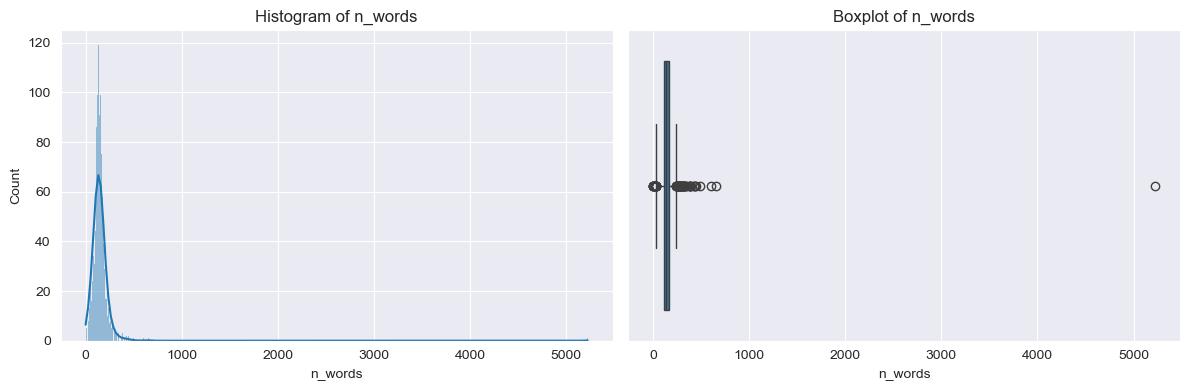

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/n_words_distribution.png
outliers in 'n_words': 
      Subject_ID  n_words
13            86      339
35           122      383
41           130      263
43           133      273
48           138        0
...          ...      ...
950         1304      401
959         1315       30
960         1316      252
962         1318       33
1001        1370     5222

[69 rows x 2 columns]



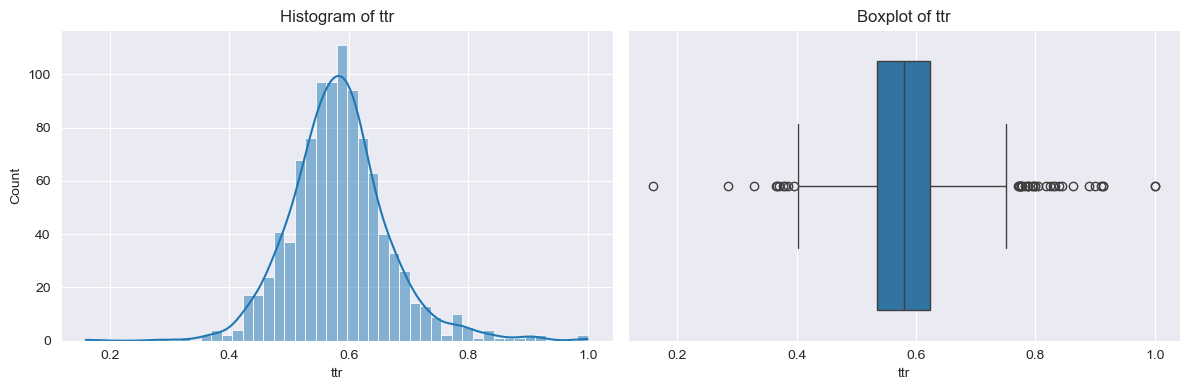

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/ttr_distribution.png
outliers in 'ttr': 
      Subject_ID       ttr
13            86  0.365782
43           133  0.285714
51           141  1.000000
63           157  0.772727
83           189  0.396135
84           190  0.804878
89           198  0.794118
230          381  0.772727
233          385  0.838710
237          389  0.863636
387          585  0.909091
420          623  0.913043
440          648  0.844444
457          667  0.384817
458          668  0.367647
501          721  0.379934
504          724  0.829787
535          764  0.329250
623          873  0.777778
637          893  0.787234
660          921  0.825000
673          938  0.833333
677          944  0.888889
687          957  0.913043
771         1059  0.370445
776         1065  1.000000
799         1098  0.770492
803         1102  0.775862
808         1112  0.787879
840         1155  0.782609
847         1167  0.78

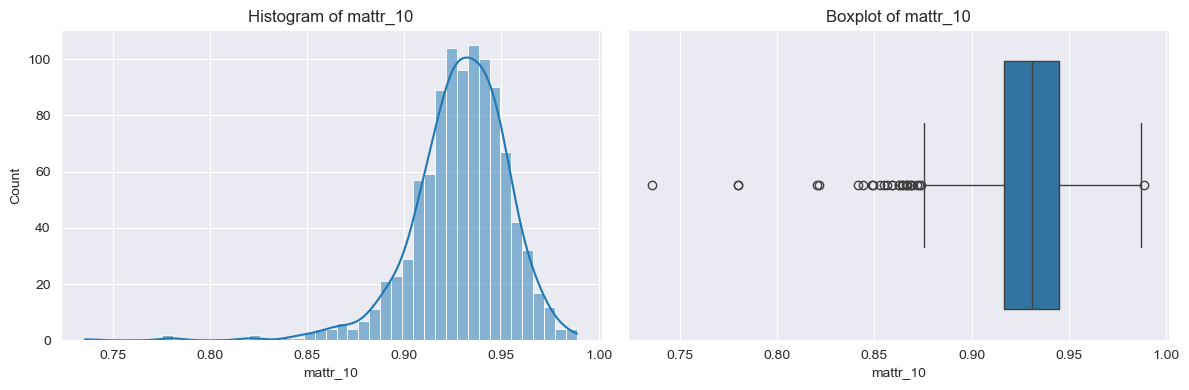

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/mattr_10_distribution.png
outliers in 'mattr_10': 
     Subject_ID  mattr_10
62          154  0.868657
67          163  0.841379
103         212  0.872174
121         234  0.862712
171         303  0.859184
197         342  0.869600
211         360  0.866964
230         381  0.848571
288         455  0.873203
317         492  0.820588
325         500  0.780000
351         536  0.866038
429         633  0.856633
613         858  0.864423
621         871  0.866667
638         894  0.868421
649         909  0.873913
661         922  0.735714
677         944  0.988889
682         951  0.849138
685         954  0.854930
745        1027  0.853061
821        1130  0.780000
882        1212  0.844231
891        1222  0.862500
947        1298  0.821429
949        1302  0.859091
984        1350  0.864865



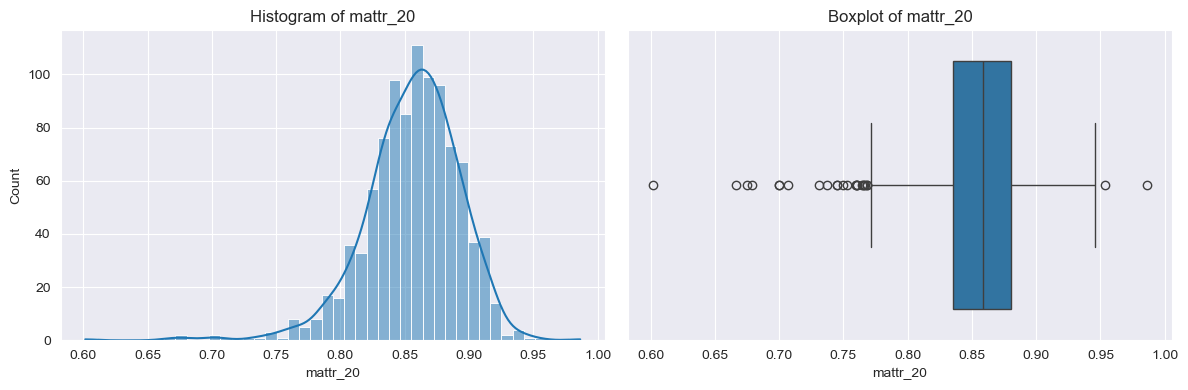

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/mattr_20_distribution.png
outliers in 'mattr_20': 
     Subject_ID  mattr_20
67          163  0.750000
103         212  0.764762
121         234  0.768367
171         303  0.730769
317         492  0.679167
325         500  0.666667
429         633  0.752688
440         648  0.986538
526         754  0.766875
613         858  0.759574
621         871  0.765385
638         894  0.737234
661         922  0.601563
677         944  0.953846
682         951  0.700000
685         954  0.745082
738        1020  0.759459
815        1119  0.760526
821        1130  0.700000
854        1176  0.745283
883        1213  0.768478
891        1222  0.707143
947        1298  0.675000
949        1302  0.760714
965        1322  0.766319



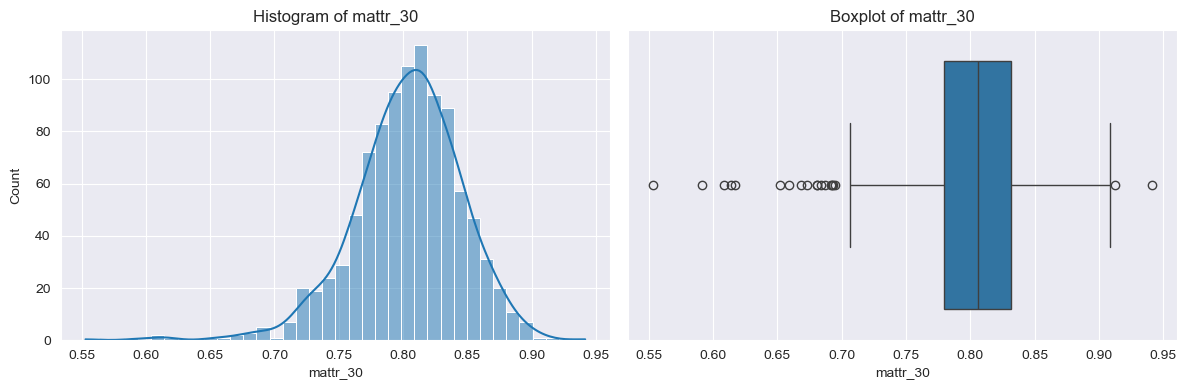

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/mattr_30_distribution.png
outliers in 'mattr_30': 
     Subject_ID  mattr_30
171         303  0.651724
317         492  0.616667
325         500  0.673333
429         633  0.691477
440         648  0.941667
526         754  0.680476
638         894  0.681081
661         922  0.553030
677         944  0.912500
682         951  0.613889
685         954  0.692810
738        1020  0.693229
815        1119  0.683529
854        1176  0.668217
883        1213  0.659259
891        1222  0.591667
947        1298  0.608333
949        1302  0.694928
965        1322  0.687313



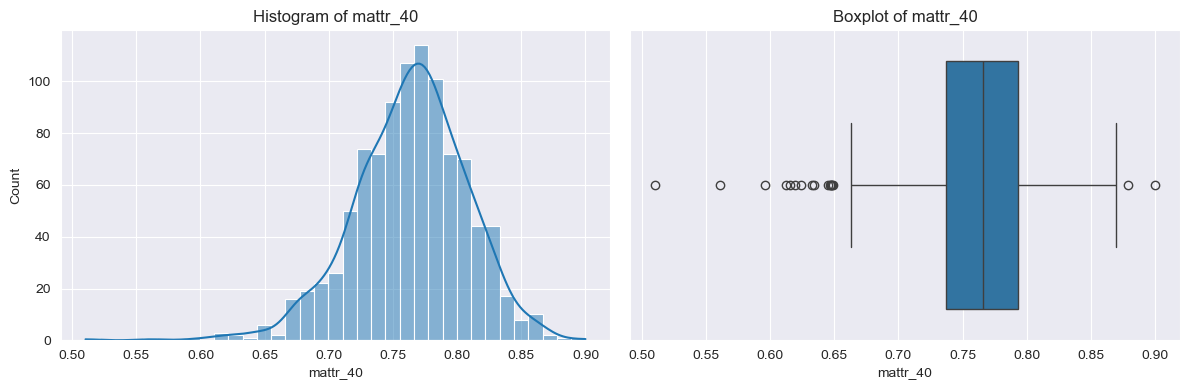

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/mattr_40_distribution.png
outliers in 'mattr_40': 
     Subject_ID  mattr_40
171         303  0.596053
317         492  0.612500
329         504  0.646512
351         536  0.647826
429         633  0.645181
440         648  0.879167
526         754  0.634167
638         894  0.648148
661         922  0.510417
677         944  0.900000
682         951  0.561337
685         954  0.648780
815        1119  0.624333
854        1176  0.619697
883        1213  0.615385
949        1302  0.647222
965        1322  0.632460



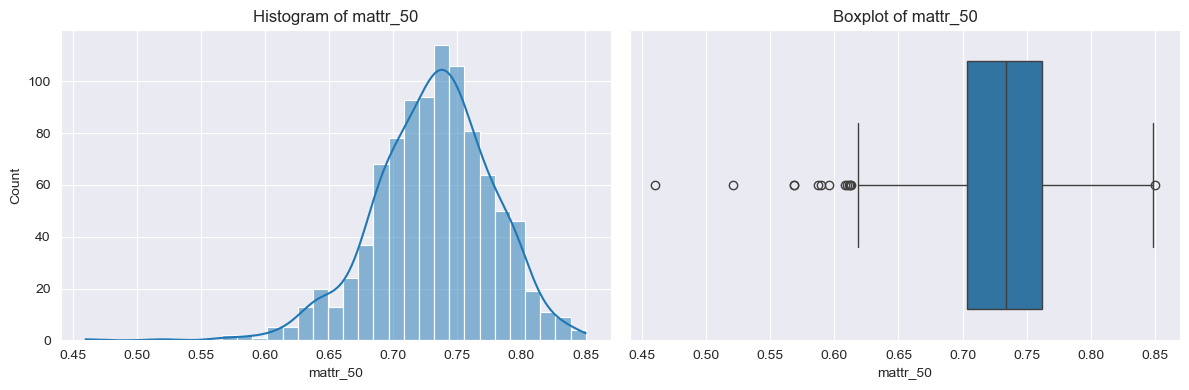

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/mattr_50_distribution.png
outliers in 'mattr_50': 
     Subject_ID  mattr_50
162         291  0.850127
171         303  0.568889
329         504  0.612121
428         632  0.611282
429         633  0.607949
526         754  0.587200
638         894  0.612941
661         922  0.460000
682         951  0.520789
815        1119  0.589846
854        1176  0.568696
883        1213  0.610000
965        1322  0.595965



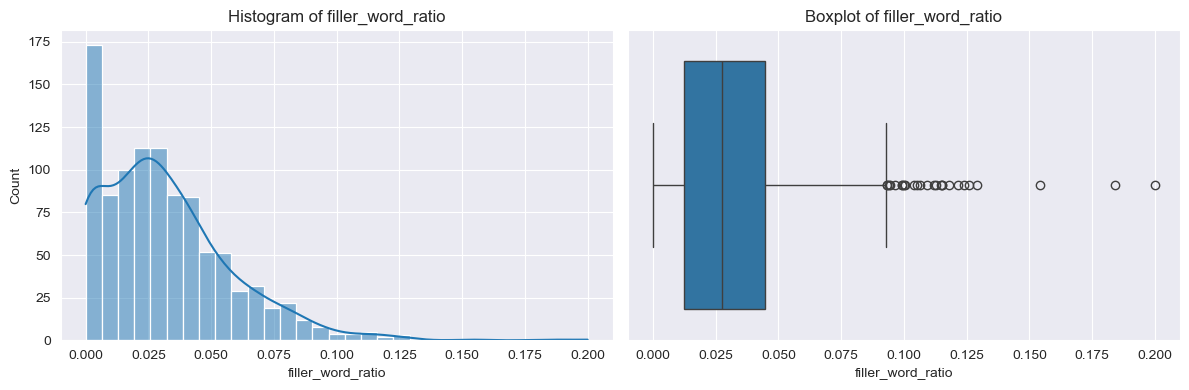

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/filler_word_ratio_distribution.png
outliers in 'filler_word_ratio': 
     Subject_ID  filler_word_ratio
41          130           0.117871
51          141           0.200000
134         253           0.109375
176         312           0.099237
220         369           0.124138
281         446           0.154362
295         466           0.100503
311         485           0.100000
331         506           0.103896
351         536           0.129032
414         617           0.093458
429         633           0.112195
468         678           0.183962
484         698           0.105263
555         784           0.094488
556         786           0.126050
564         796           0.114625
596         839           0.096591
666         929           0.094118
694         966           0.099138
706         983           0.121622
797        1096           0.106250
805        1105           

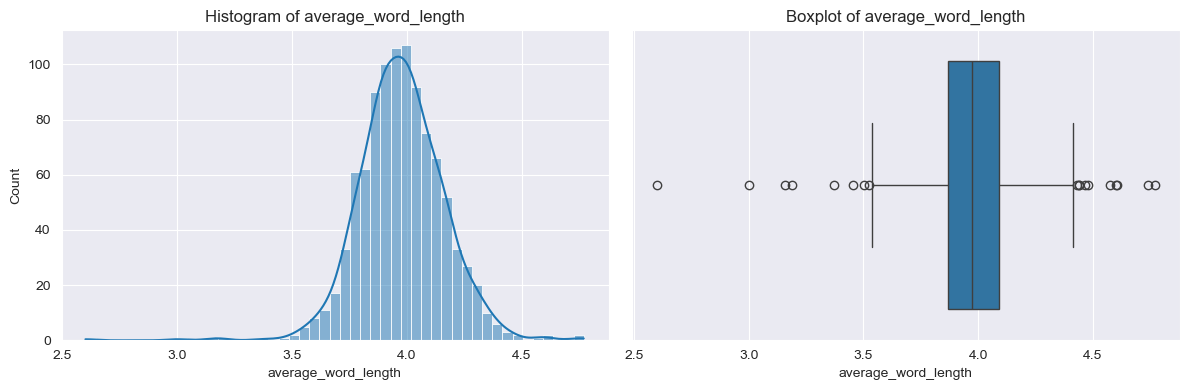

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/average_word_length_distribution.png
outliers in 'average_word_length': 
     Subject_ID  average_word_length
51          141             2.600000
95          204             4.429907
314         489             4.438272
387         585             4.575758
438         646             4.438776
518         743             4.476923
571         805             3.523013
660         921             4.600000
661         922             3.372549
677         944             4.466667
687         957             4.739130
737        1019             4.770492
776        1065             3.000000
799        1098             4.606557
823        1132             3.503311
891        1222             3.454545
947        1298             3.189189
975        1336             3.157303



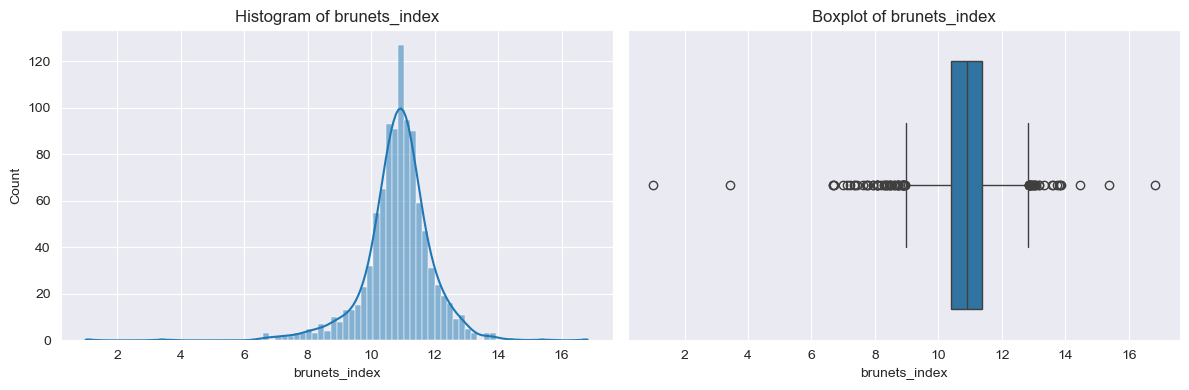

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/brunets_index_distribution.png
outliers in 'brunets_index': 
      Subject_ID  brunets_index
13            86      13.873783
30           111       8.731267
35           122      12.889066
43           133      15.387351
50           140      12.904472
...          ...            ...
959         1315       7.203007
962         1318       7.612784
994         1361       8.787584
998         1366       8.718150
1001        1370      16.824500

[75 rows x 2 columns]



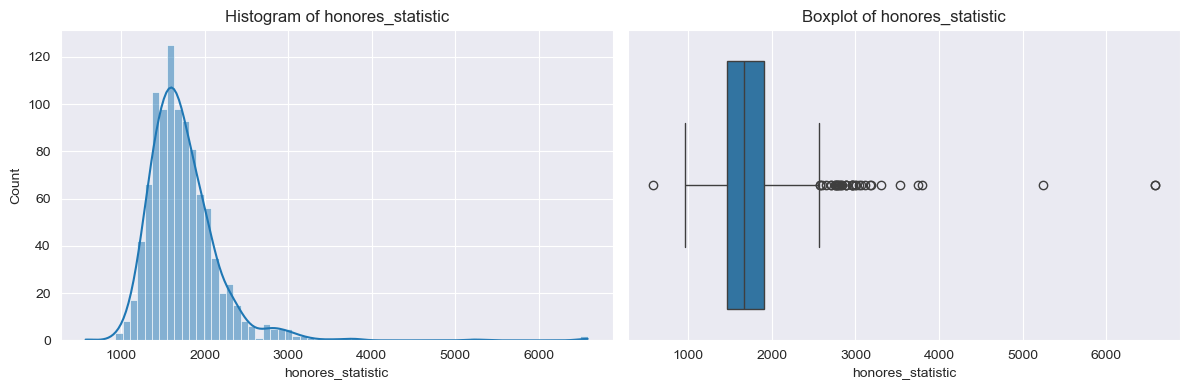

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/honores_statistic_distribution.png
outliers in 'honores_statistic': 
     Subject_ID  honores_statistic
43          133         575.708947
89          198        3173.724472
189         330        2953.511426
230         381        2573.248951
233         385        2976.122244
274         437        3000.185684
325         500        2821.088420
384         582        2886.749630
387         585        5244.761342
420         623        6584.537853
440         648        2893.063492
471         681        2577.509489
504         724        3753.893912
520         745        2651.304365
547         776        3305.039435
550         779        2780.837393
576         812        2888.697662
588         829        3186.019660
614         859        2779.832977
623         873        2792.288833
673         938        2834.331151
677         944        3045.329992
687         957        658

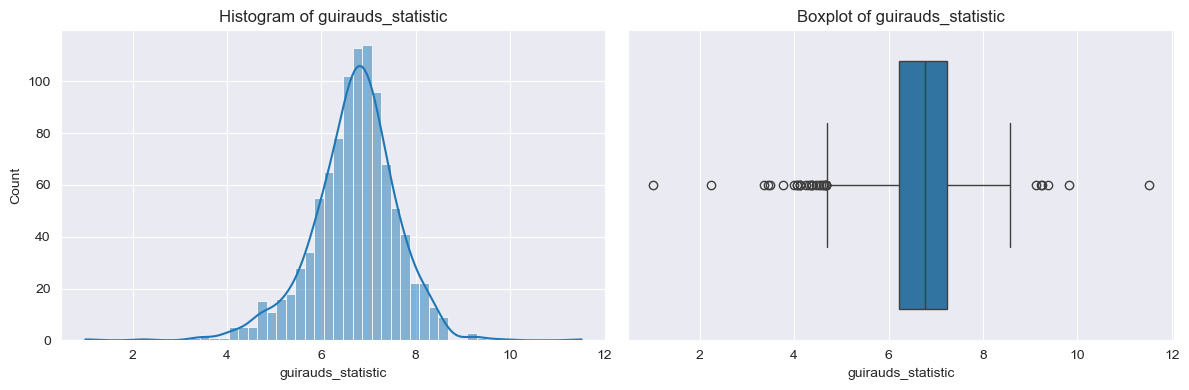

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/guirauds_statistic_distribution.png
outliers in 'guirauds_statistic': 
      Subject_ID  guirauds_statistic
1             43            9.249901
51           141            2.236068
67           163            4.055536
89           198            4.630462
171          303            4.464419
233          385            4.669738
237          389            4.050814
293          464            4.670592
317          492            4.117461
325          500            4.115966
410          612            9.227639
420          623            4.378803
501          721            9.368287
621          871            4.323065
638          894            4.677477
661          922            3.360672
673          938            4.564355
687          957            4.378803
699          971            9.827076
776         1065            1.000000
808         1112            4.526019
819         112

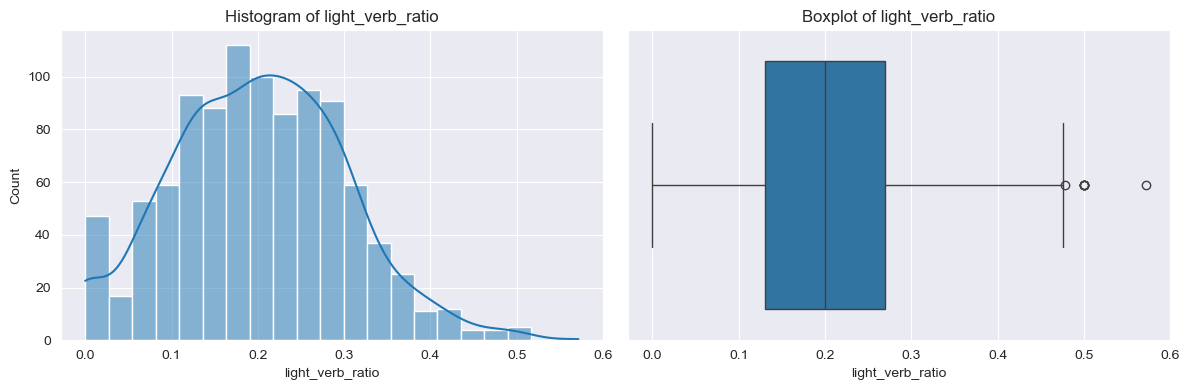

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/light_verb_ratio_distribution.png
outliers in 'light_verb_ratio': 
     Subject_ID  light_verb_ratio
237         389          0.500000
299         470          0.500000
644         902          0.478261
665         928          0.500000
703         979          0.500000
796        1095          0.571429
834        1146          0.500000



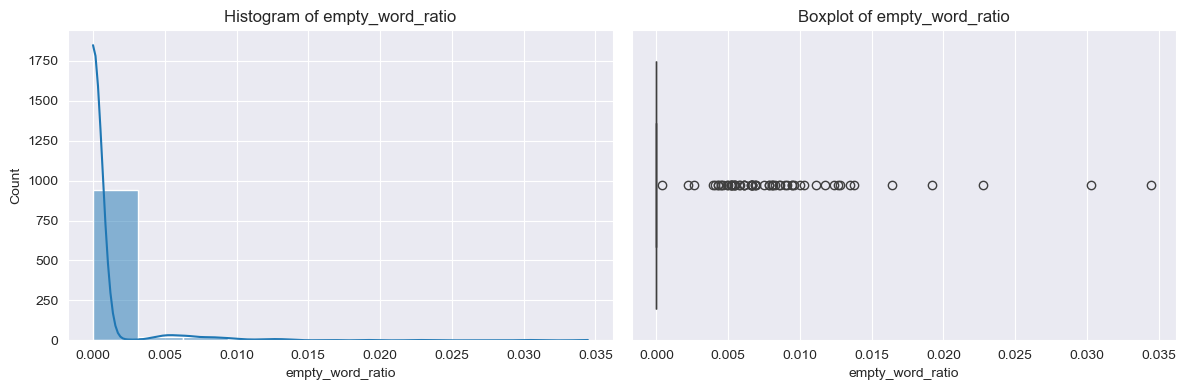

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/empty_word_ratio_distribution.png
outliers in 'empty_word_ratio': 
      Subject_ID  empty_word_ratio
49           139          0.009615
63           157          0.022727
64           158          0.011111
69           169          0.006098
80           185          0.008264
...          ...               ...
973         1332          0.007812
976         1339          0.013514
986         1353          0.006623
992         1359          0.007874
1001        1370          0.000383

[63 rows x 2 columns]



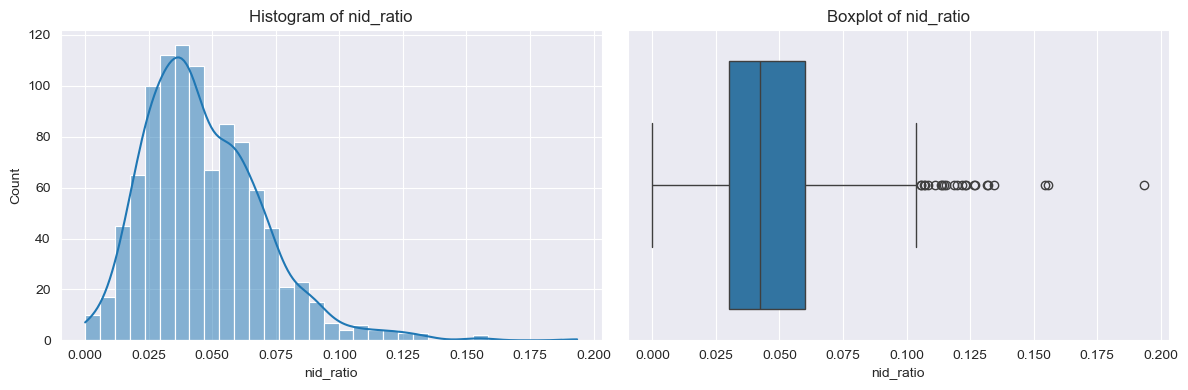

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/nid_ratio_distribution.png
outliers in 'nid_ratio': 
     Subject_ID  nid_ratio
156         282   0.115385
281         446   0.154362
327         502   0.105691
345         528   0.123288
429         633   0.131707
468         678   0.132075
556         786   0.134454
558         788   0.111111
564         796   0.126482
609         854   0.118557
677         944   0.155556
681         950   0.122807
725        1007   0.113402
778        1069   0.114754
796        1095   0.126761
805        1105   0.193548
832        1142   0.107438
844        1164   0.108333
900        1234   0.114035
919        1255   0.105634
929        1276   0.120000
949        1302   0.106667
976        1339   0.121622



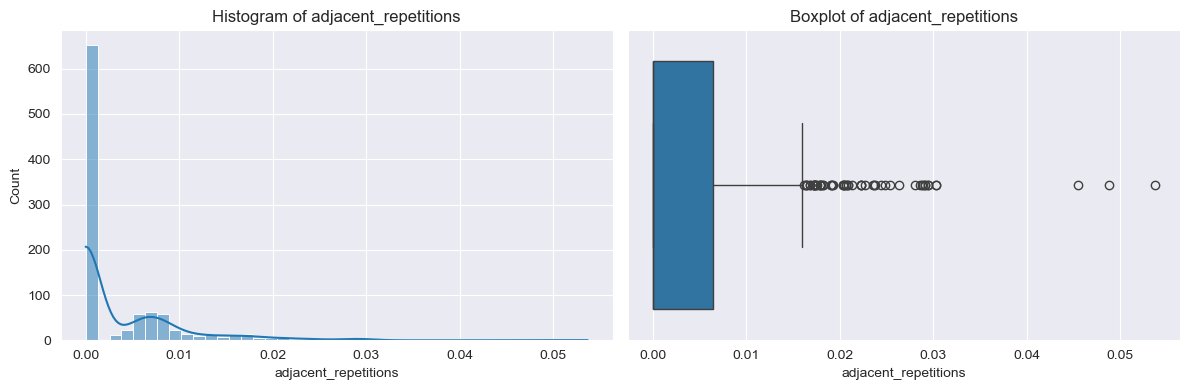

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/adjacent_repetitions_distribution.png
outliers in 'adjacent_repetitions': 
     Subject_ID  adjacent_repetitions
41          130              0.019011
52          142              0.028571
64          158              0.022222
99          208              0.053691
121         234              0.029412
138         260              0.020619
166         295              0.020833
171         303              0.017241
198         343              0.029126
211         360              0.024793
230         381              0.045455
236         388              0.029070
249         403              0.017544
281         446              0.023490
296         467              0.022222
315         490              0.025316
318         493              0.021277
329         504              0.048780
351         536              0.016129
369         560              0.019231
374         569            

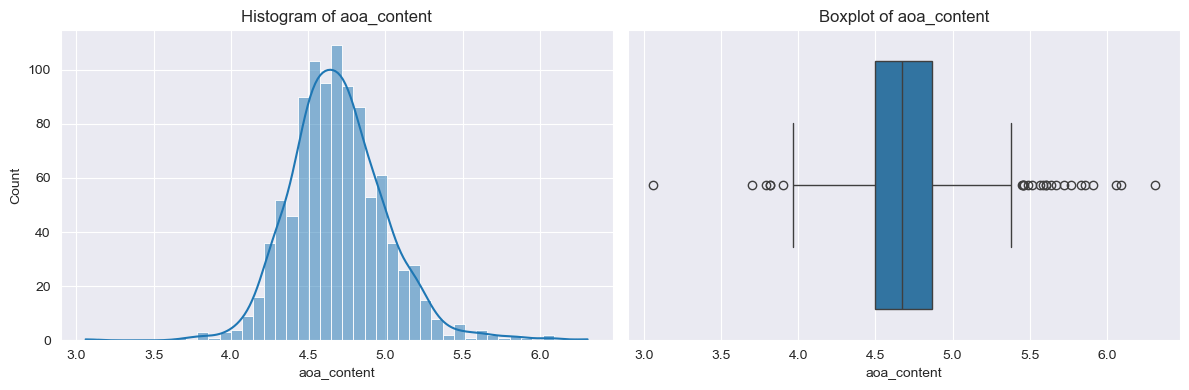

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/aoa_content_distribution.png
outliers in 'aoa_content': 
      Subject_ID  aoa_content
27           107     5.563897
29           110     5.605557
30           111     5.719538
51           141     3.060000
54           145     3.817223
78           183     5.447748
135          254     5.764825
274          437     6.060222
278          443     5.588201
326          501     3.817813
384          582     6.088310
504          724     6.309500
518          743     5.670431
524          750     3.791818
558          788     5.462017
628          883     5.907460
651          911     5.640231
678          945     5.603663
827         1136     5.486031
867         1194     5.853837
882         1212     3.701429
902         1237     5.512035
966         1324     5.457358
975         1336     3.899129
991         1358     5.453559
1001        1370     5.828081



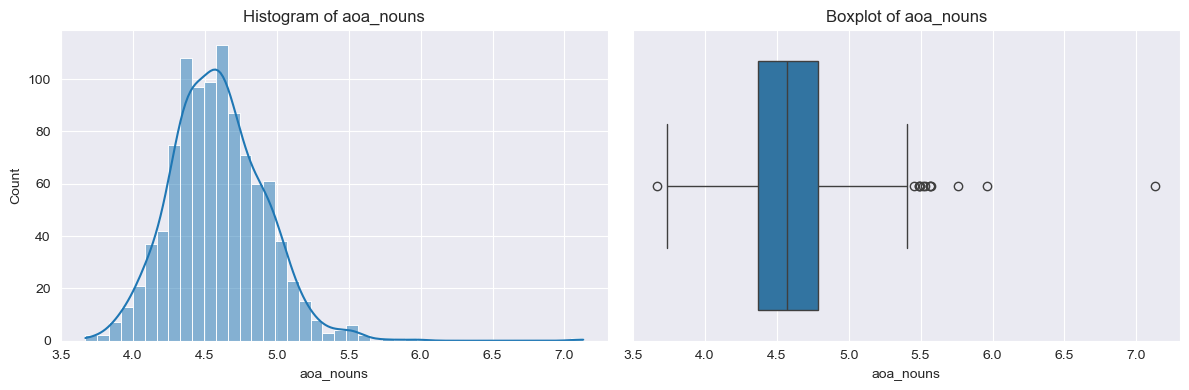

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/aoa_nouns_distribution.png
outliers in 'aoa_nouns': 
      Subject_ID  aoa_nouns
30           111   5.531818
67           163   3.669000
135          254   5.565810
278          443   5.457066
384          582   5.759509
408          610   5.568906
468          678   5.514117
504          724   5.960000
651          911   5.491310
819         1125   5.486250
867         1194   7.130630
939         1288   5.493978
1001        1370   5.563442



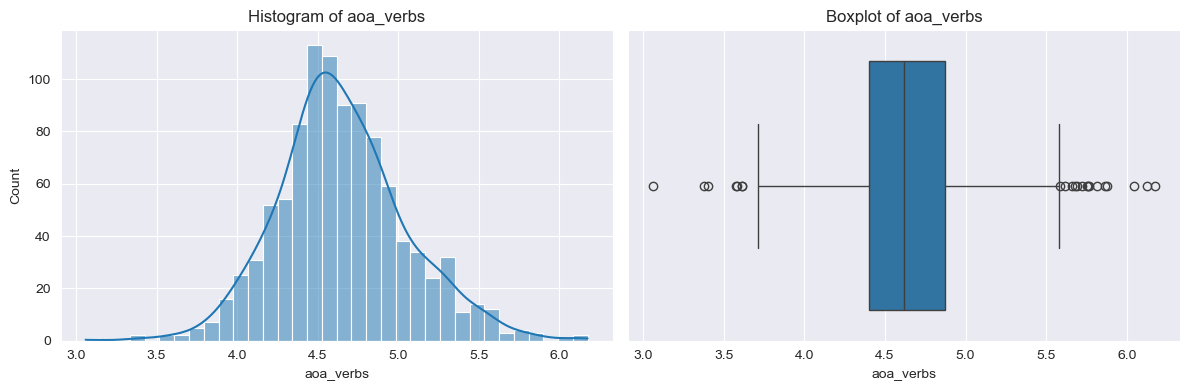

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/aoa_verbs_distribution.png
outliers in 'aoa_verbs': 
      Subject_ID  aoa_verbs
22           101   5.767647
23           102   5.588400
51           141   3.060000
54           145   3.575556
106          215   5.866522
109          218   5.658333
148          271   5.693529
171          303   5.762857
258          417   5.751667
274          437   5.817895
317          492   3.580000
420          623   6.046667
518          743   6.175000
522          748   5.678421
661          922   3.611333
678          945   5.876111
765         1053   3.399000
832         1142   3.611250
852         1174   5.620000
882         1212   3.377500
967         1325   5.721905
1001        1370   6.127792



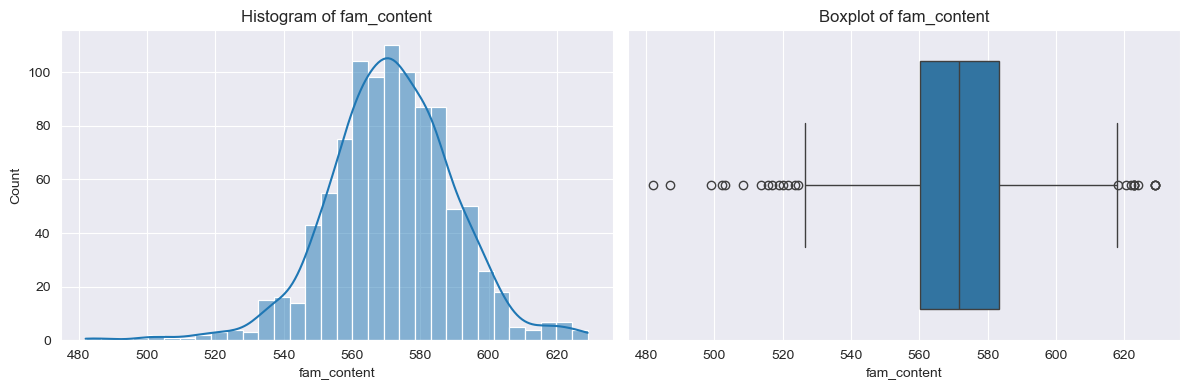

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/fam_content_distribution.png
outliers in 'fam_content': 
     Subject_ID  fam_content
30          111   487.000000
43          133   629.000000
64          158   508.500000
75          176   515.777778
94          203   513.600000
111         220   519.000000
200         345   521.500000
210         359   629.000000
243         396   624.000000
310         484   618.333333
324         499   520.000000
325         500   629.000000
382         580   623.000000
385         583   523.500000
450         660   524.400000
484         698   516.800000
502         722   503.000000
514         738   623.000000
518         743   622.000000
544         773   620.666667
545         774   502.250000
623         873   629.000000
854        1176   499.000000
892        1223   482.000000
918        1254   623.000000
998        1366   623.000000



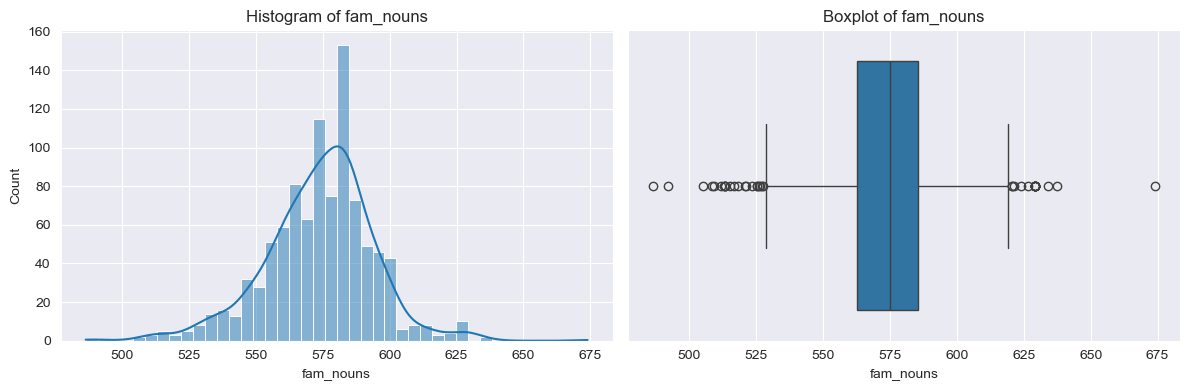

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/fam_nouns_distribution.png
outliers in 'fam_nouns': 
     Subject_ID   fam_nouns
25          104  515.000000
30          111  492.000000
43          133  629.000000
64          158  518.000000
67          163  629.000000
75          176  509.000000
94          203  511.750000
101         210  629.000000
102         211  520.750000
111         220  513.333333
121         234  513.000000
203         348  521.333333
210         359  629.000000
220         369  513.333333
223         373  505.000000
236         388  620.500000
243         396  624.000000
278         443  525.400000
325         500  629.000000
326         501  629.000000
385         583  523.500000
408         610  508.500000
429         633  526.545455
455         665  637.333333
482         696  525.400000
484         698  516.800000
514         738  674.000000
544         773  620.666667
545         774  486.333333
549    

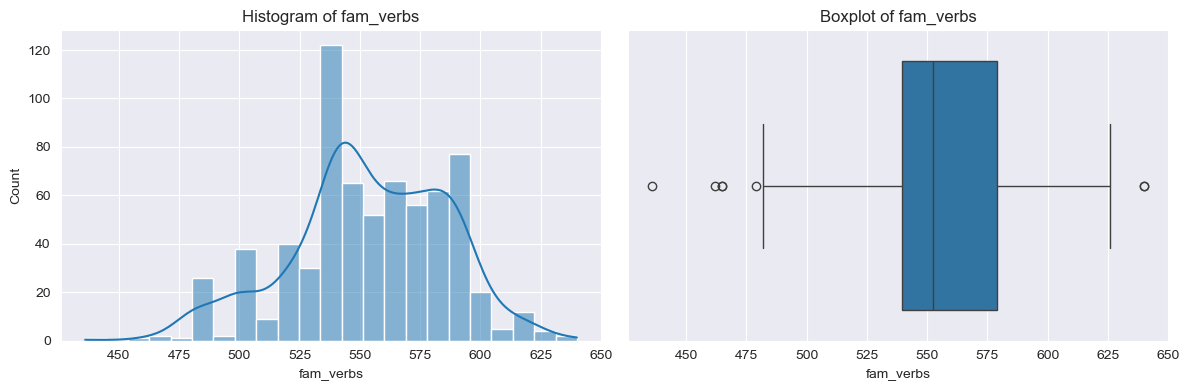

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/fam_verbs_distribution.png
outliers in 'fam_verbs': 
     Subject_ID  fam_verbs
161         290      436.0
228         378      465.0
286         451      479.0
295         466      640.0
342         523      640.0
632         888      465.0
703         979      462.0



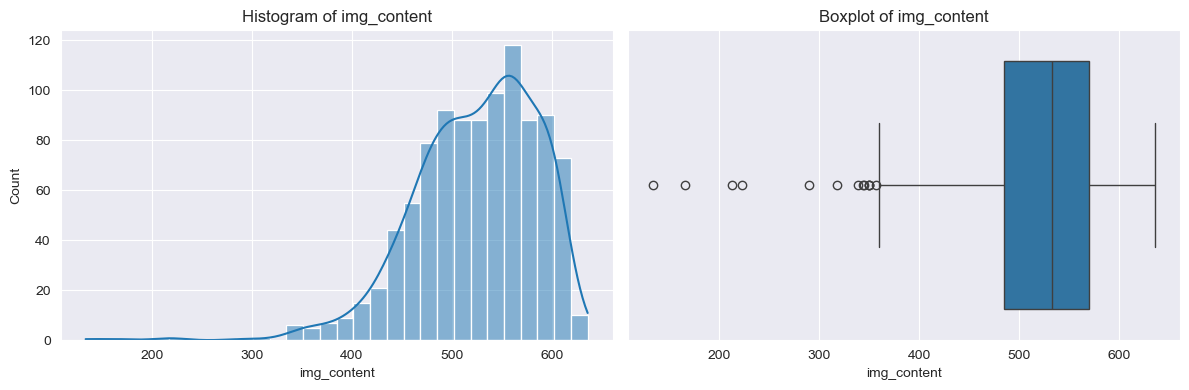

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/img_content_distribution.png
outliers in 'img_content': 
     Subject_ID  img_content
159         288   357.000000
234         386   289.200000
324         499   166.000000
351         536   213.000000
382         580   349.500000
518         743   133.333333
562         793   344.400000
688         958   343.285714
791        1088   317.333333
799        1098   338.285714
918        1254   349.500000
984        1350   223.000000
998        1366   349.500000



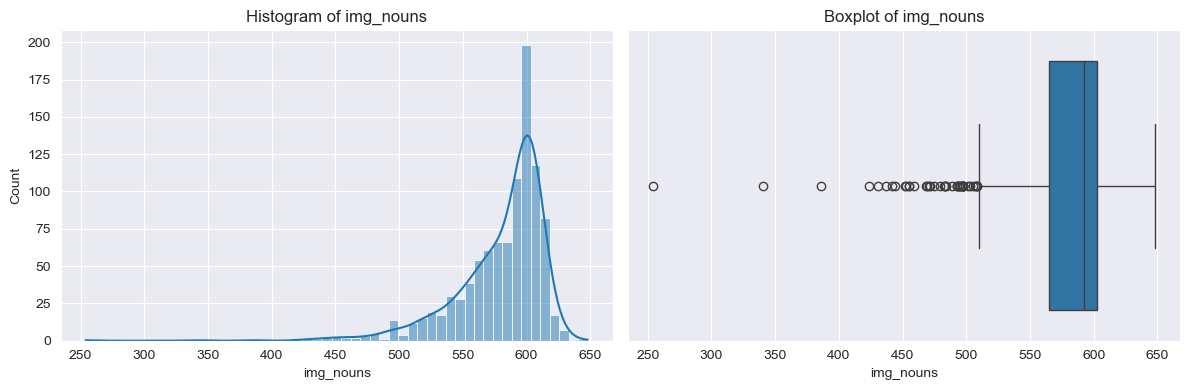

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/img_nouns_distribution.png
outliers in 'img_nouns': 
      Subject_ID   img_nouns
22           101  483.333333
29           110  468.000000
44           134  505.500000
61           153  497.000000
64           158  502.500000
76           177  444.166667
88           197  454.666667
91           200  475.000000
94           203  492.500000
105          214  506.750000
111          220  497.666667
125          242  507.750000
135          254  488.666667
162          291  437.000000
163          292  455.250000
209          358  340.500000
213          362  431.000000
220          369  497.666667
272          434  483.333333
328          503  469.333333
380          578  479.500000
408          610  452.250000
445          653  493.000000
496          713  494.250000
504          724  494.000000
514          738  453.000000
517          742  492.333333
545          774  471.666667
554   

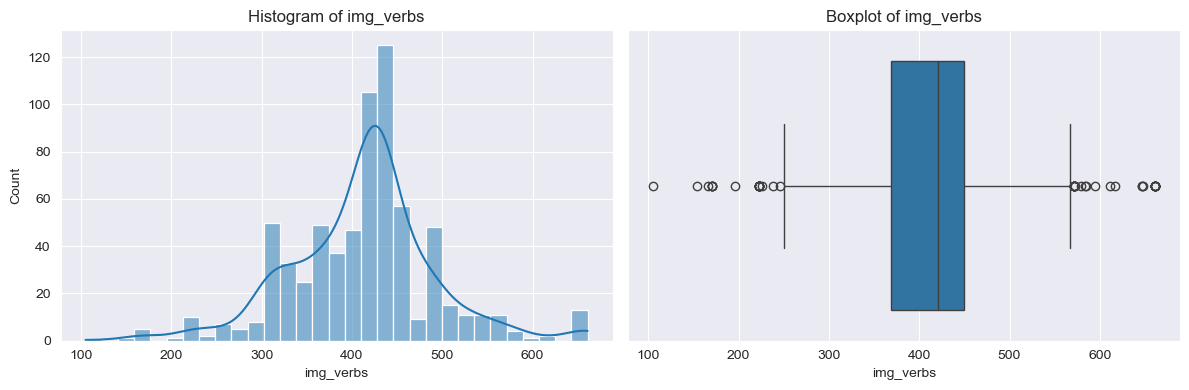

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/img_verbs_distribution.png
outliers in 'img_verbs': 
     Subject_ID   img_verbs
18           92  170.000000
87          196  170.000000
132         251  223.000000
141         263  105.000000
142         264  223.000000
159         288  238.500000
172         304  661.000000
177         314  154.000000
190         331  661.000000
196         341  583.666667
198         343  661.000000
241         394  661.000000
256         415  246.000000
295         466  647.000000
315         490  661.000000
322         497  571.000000
324         499  166.000000
328         503  223.000000
342         523  647.000000
355         540  585.000000
373         568  571.000000
391         589  571.000000
413         615  571.000000
414         617  223.000000
451         661  661.000000
475         688  595.000000
476         689  648.000000
502         722  571.000000
581         821  223.000000
618    

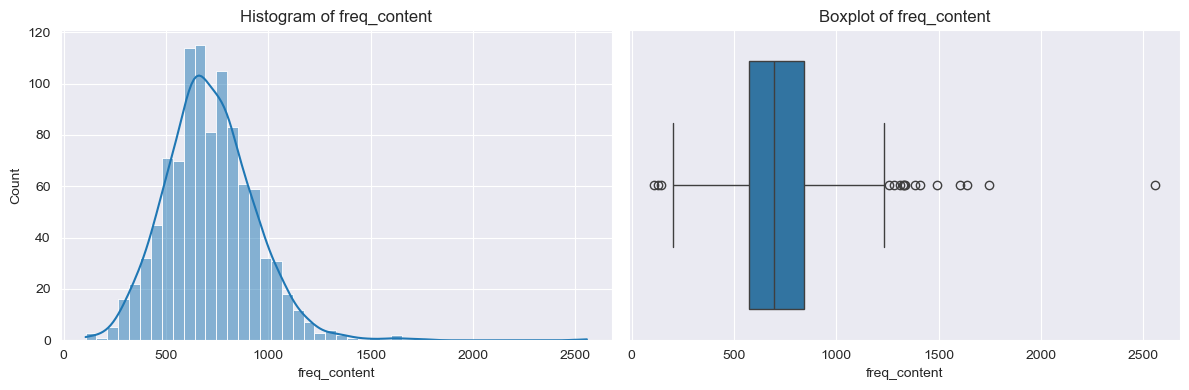

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/freq_content_distribution.png
outliers in 'freq_content': 
     Subject_ID  freq_content
44          134   1282.914395
51          141   2556.725490
54          145   1409.676044
174         306   1255.681473
183         324   1639.070495
192         336   1382.899816
209         358   1744.519092
420         623    127.490196
527         755   1494.384861
581         821   1333.989442
808        1112    145.972549
813        1117   1330.356289
821        1130    107.411765
834        1146   1310.250377
867        1194   1605.472371
904        1239   1327.069537



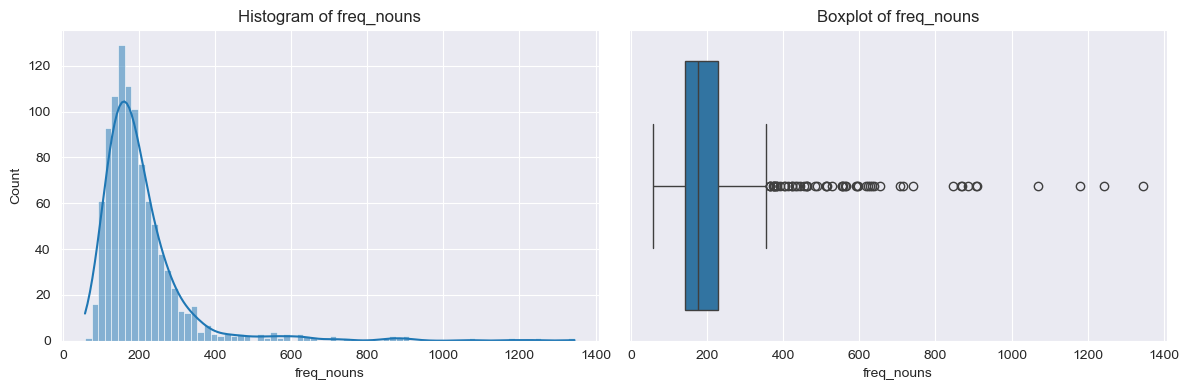

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/freq_nouns_distribution.png
outliers in 'freq_nouns': 
     Subject_ID   freq_nouns
5            50   413.475113
79          184   372.132280
94          203   374.514887
171         303   511.210784
178         315   553.444193
179         318   379.696732
181         321   593.424242
183         324  1344.800826
192         336   906.567038
198         343   845.322638
209         358   462.355120
211         360   634.358883
264         425   444.057598
271         433   654.452012
276         439   910.023654
277         441   639.548669
294         465   516.077767
295         466   513.250446
308         481   597.009804
325         500   381.972549
329         504   616.607843
330         505   402.571332
356         541   376.418149
362         550   423.764030
376         574   557.272754
383         581   867.599587
404         605   561.759259
407         609   374.763001
426 

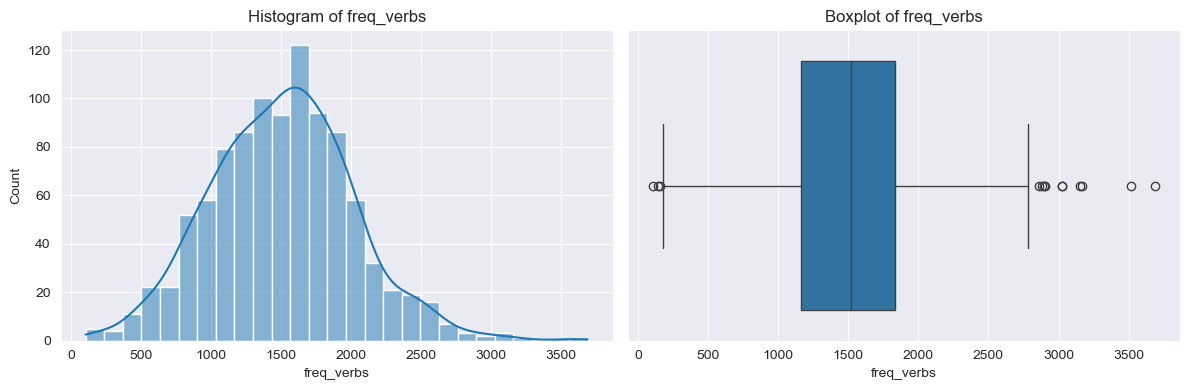

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/freq_verbs_distribution.png
outliers in 'freq_verbs': 
     Subject_ID   freq_verbs
54          145  2861.132898
71          172   154.536765
209         358  3687.920060
237         389  3027.377451
369         560   104.921569
468         678  3166.931839
504         724  2894.341176
527         755  3515.177871
644         902  2906.837170
665         928  3024.636275
817        1123  2884.593514
821        1130   140.470588
834        1146  3151.903922



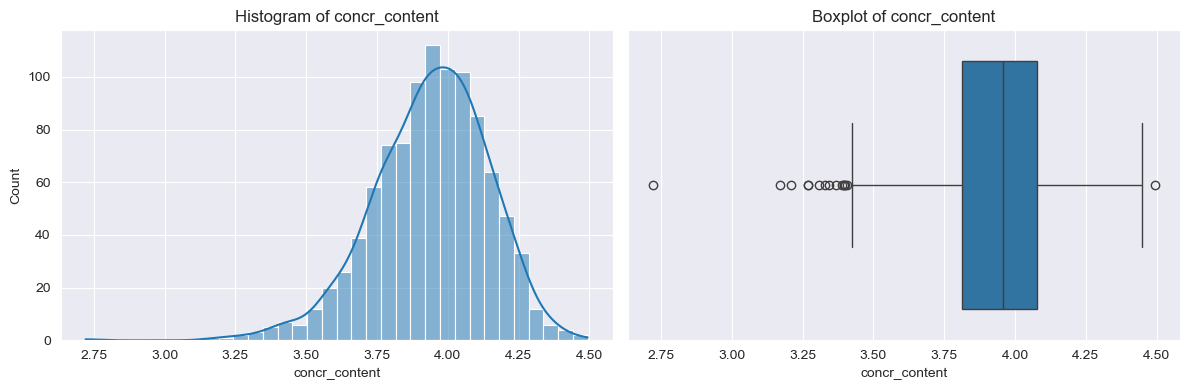

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/concr_content_distribution.png
outliers in 'concr_content': 
     Subject_ID  concr_content
29          110       3.170364
51          141       3.210000
121         234       4.493571
209         358       3.394595
274         437       3.269111
408         610       3.366909
468         678       3.390423
504         724       3.270000
527         755       3.308140
562         793       3.406327
651         911       3.398833
718        1000       3.327817
836        1148       3.341892
867        1194       2.721364
928        1275       3.396964



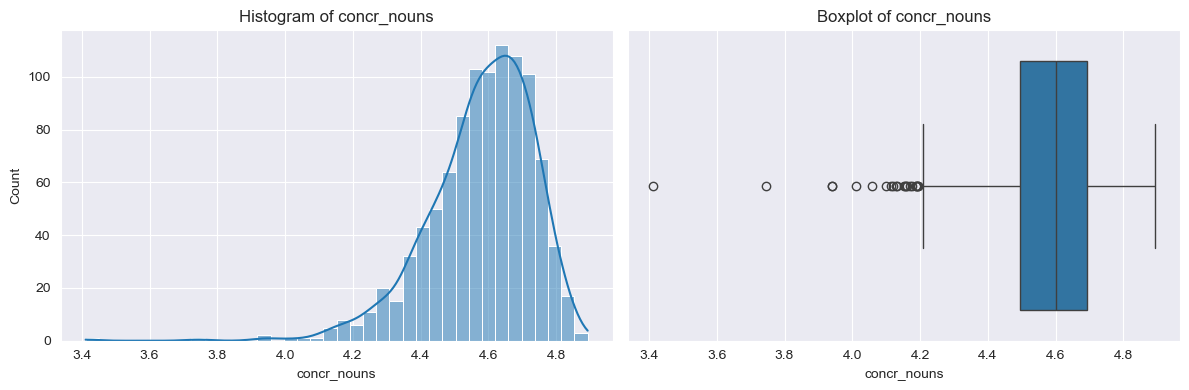

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/concr_nouns_distribution.png
outliers in 'concr_nouns': 
     Subject_ID  concr_nouns
29          110     4.158333
30          111     3.940909
32          115     4.115385
61          153     4.130000
118         230     4.119063
159         288     4.151200
200         345     4.189412
241         394     4.056765
274         437     4.100000
468         678     4.132941
502         722     4.187273
504         724     3.744167
518         743     4.175000
554         783     4.010000
639         895     4.193810
660         921     4.187143
736        1018     4.192609
799        1098     4.171667
836        1148     4.162667
867        1194     3.411429
885        1215     4.154839
928        1275     3.940385



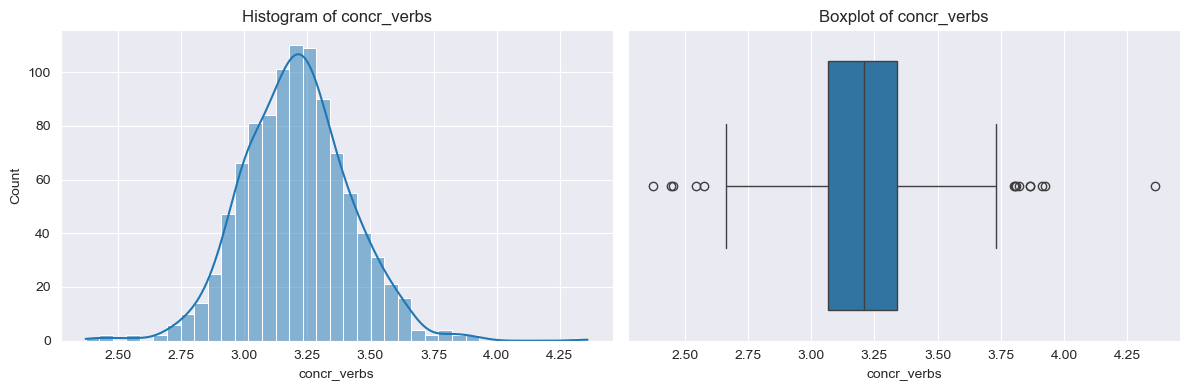

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/concr_verbs_distribution.png
outliers in 'concr_verbs': 
     Subject_ID  concr_verbs
89          198     3.812000
121         234     3.924444
209         358     2.373077
293         464     3.822857
317         492     2.446667
349         534     2.574167
369         560     4.360000
527         755     2.544286
542         771     3.865833
567         800     3.866429
610         855     3.805000
815        1119     3.914545
867        1194     2.452308
959        1315     3.804000



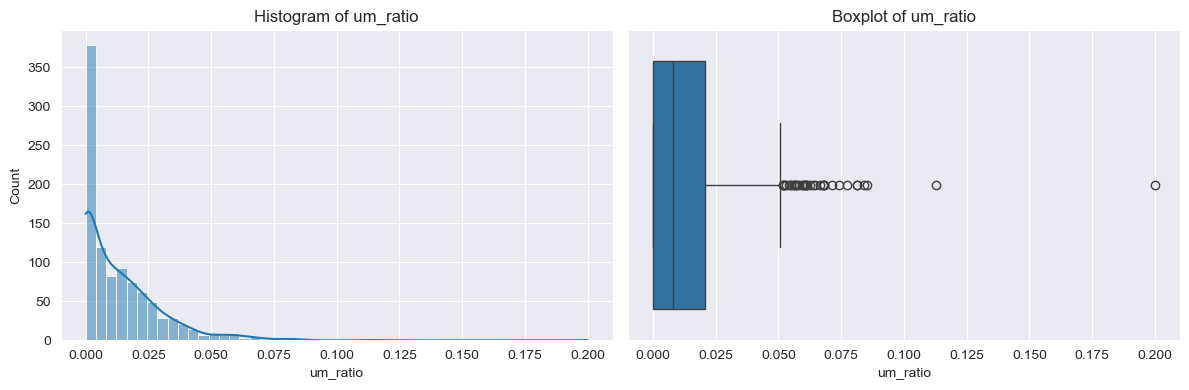

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/um_ratio_distribution.png
outliers in 'um_ratio': 
     Subject_ID  um_ratio
41          130  0.057034
51          141  0.200000
94          203  0.067669
123         239  0.060150
134         253  0.062500
228         378  0.052980
245         399  0.068182
248         402  0.058394
267         429  0.052326
296         467  0.059259
311         485  0.081250
331         506  0.071429
351         536  0.112903
374         569  0.057377
379         577  0.060811
414         617  0.084112
428         632  0.068182
451         661  0.052239
468         678  0.056604
504         724  0.063830
524         750  0.067797
570         803  0.077419
581         821  0.056075
582         822  0.060748
585         826  0.051887
589         830  0.055118
596         839  0.085227
619         867  0.061224
622         872  0.055046
648         908  0.061069
693         965  0.051724
694         966  

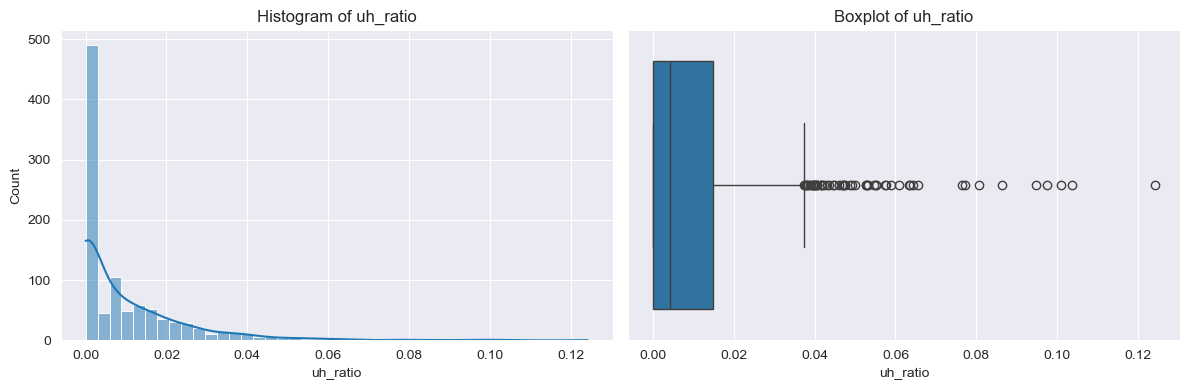

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/uh_ratio_distribution.png
outliers in 'uh_ratio': 
     Subject_ID  uh_ratio
30          111  0.039216
55          146  0.053030
71          172  0.040404
77          179  0.046875
83          189  0.053140
166         295  0.041667
170         301  0.063492
174         306  0.038462
176         312  0.076336
220         369  0.055172
278         443  0.041860
281         446  0.124161
295         466  0.040201
309         483  0.057554
327         502  0.040650
345         528  0.054795
354         539  0.049180
362         550  0.058824
366         557  0.047297
380         578  0.039773
429         633  0.097561
458         668  0.038235
468         678  0.103774
484         698  0.052632
499         719  0.037879
541         770  0.039604
556         786  0.100840
558         788  0.047619
560         790  0.065574
564         796  0.094862
566         799  0.039548
571         805  

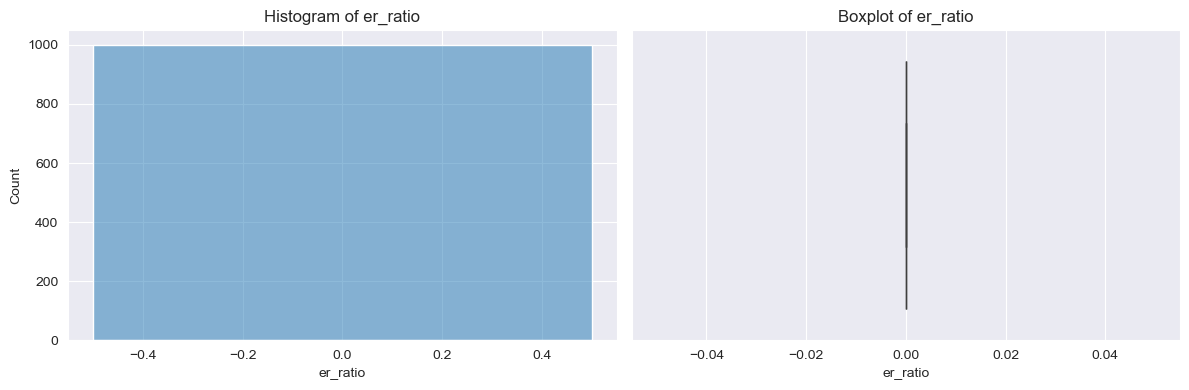

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/er_ratio_distribution.png


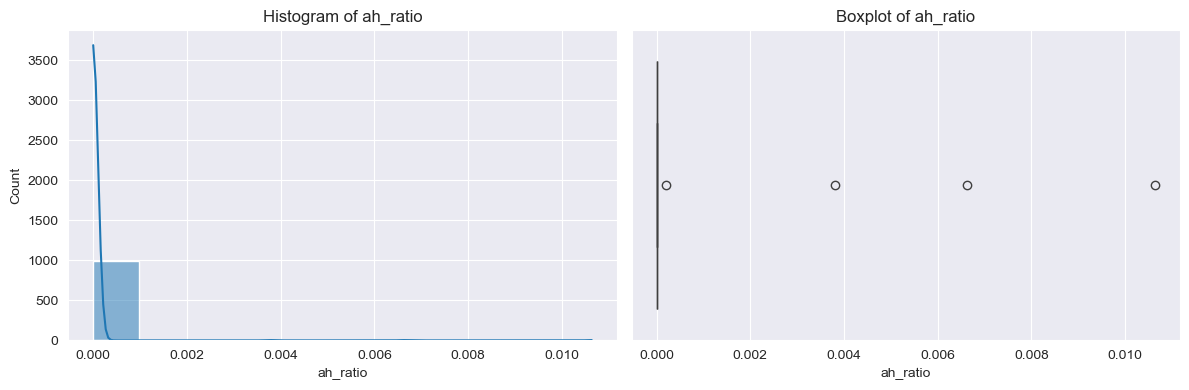

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/ah_ratio_distribution.png
outliers in 'ah_ratio': 
      Subject_ID  ah_ratio
41           130  0.003802
287          454  0.006623
953         1309  0.010638
1001        1370  0.000191



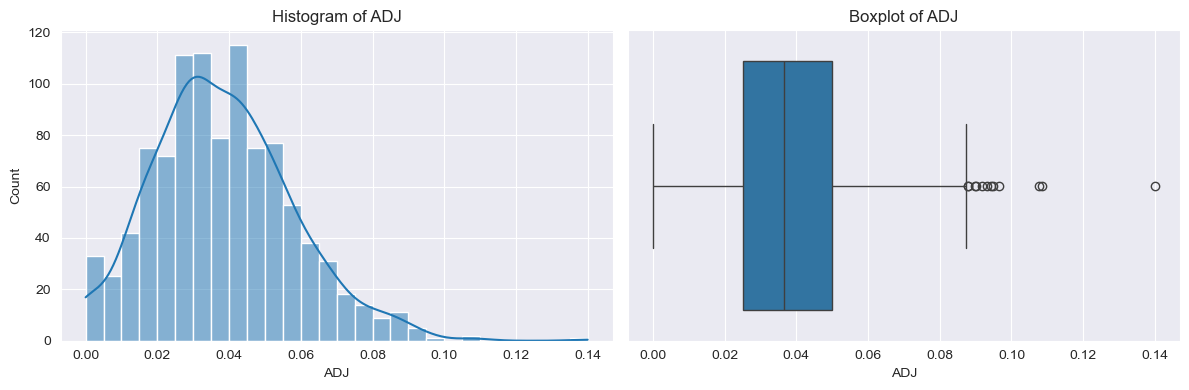

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/ADJ_distribution.png
outliers in 'ADJ': 
      Subject_ID       ADJ
71           172  0.091837
112          222  0.096491
149          272  0.107692
193          337  0.108527
346          530  0.089888
369          560  0.140000
633          889  0.093220
799         1098  0.090164
897         1230  0.094340
902         1237  0.087786
966         1324  0.094828
1001        1370  0.087940



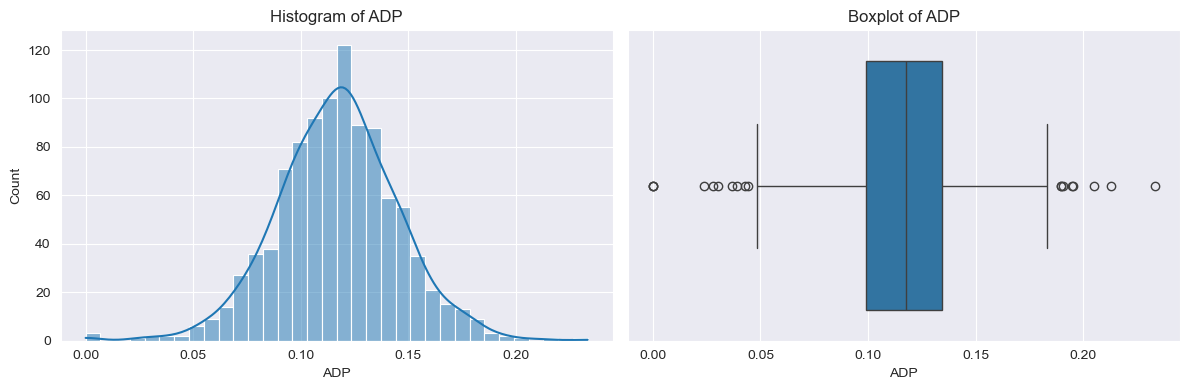

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/ADP_distribution.png
outliers in 'ADP': 
     Subject_ID       ADP
51          141  0.000000
84          190  0.195122
137         258  0.189655
164         293  0.194915
317         492  0.023810
329         504  0.036585
379         577  0.190476
661         922  0.039216
673         938  0.233333
677         944  0.044444
687         957  0.000000
737        1019  0.213115
742        1024  0.205128
776        1065  0.000000
803        1102  0.189655
836        1148  0.043011
867        1194  0.027778
891        1222  0.030303



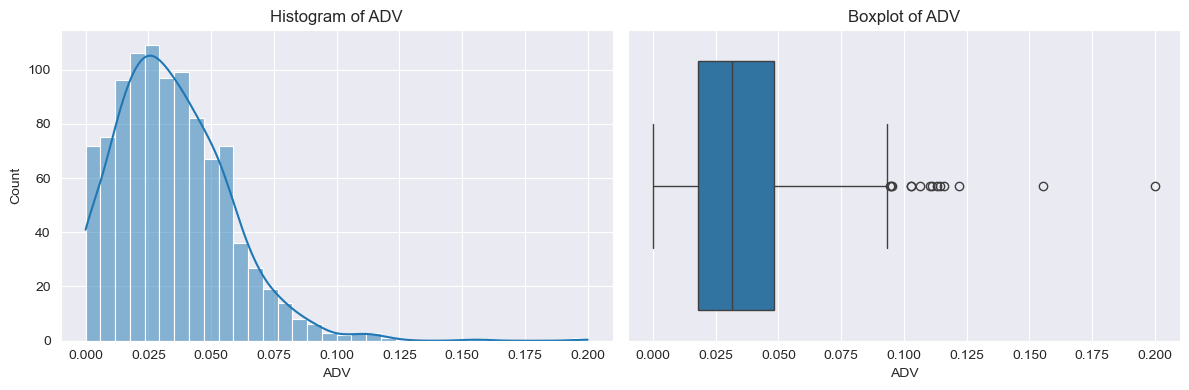

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/ADV_distribution.png
outliers in 'ADV': 
      Subject_ID       ADV
8             59  0.115942
19            93  0.094891
51           141  0.200000
52           142  0.114286
95           204  0.102804
176          312  0.122137
250          404  0.103030
353          538  0.094340
677          944  0.155556
743         1025  0.095238
770         1058  0.113208
866         1193  0.110429
867         1194  0.111111
1000        1369  0.106383



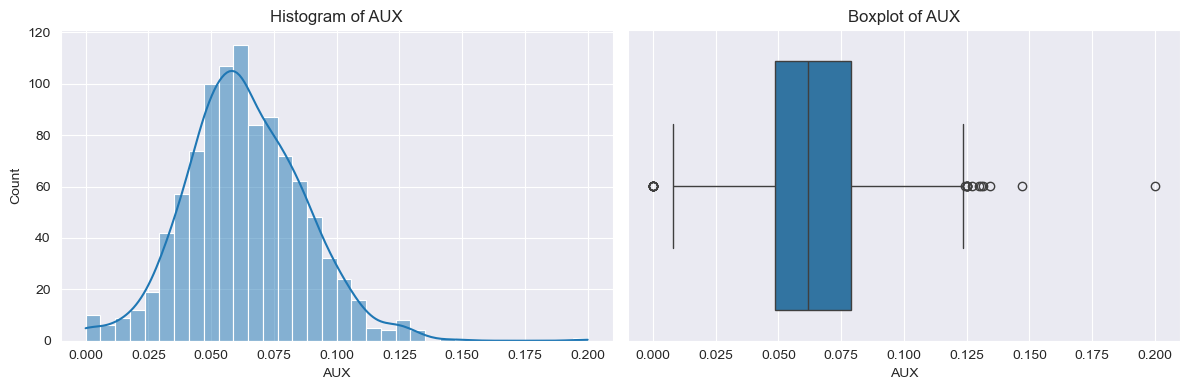

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/AUX_distribution.png
outliers in 'AUX': 
     Subject_ID       AUX
12           85  0.124183
51          141  0.200000
67          163  0.131579
89          198  0.147059
95          204  0.130841
221         371  0.127072
300         471  0.000000
325         500  0.000000
377         575  0.125000
439         647  0.000000
624         874  0.125000
658         919  0.000000
661         922  0.000000
685         954  0.125000
717         999  0.125000
733        1015  0.125000
737        1019  0.000000
776        1065  0.000000
821        1130  0.000000
840        1155  0.000000
855        1177  0.134328
861        1188  0.130081
929        1276  0.000000



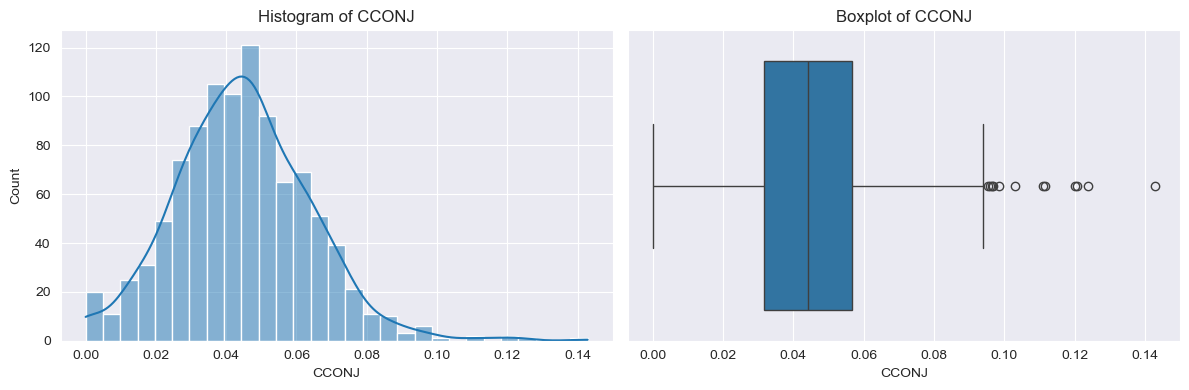

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/CCONJ_distribution.png
outliers in 'CCONJ': 
     Subject_ID     CCONJ
20           97  0.096491
38          127  0.111702
171         303  0.120690
178         315  0.103175
264         425  0.095890
293         464  0.123711
317         492  0.142857
369         560  0.120000
433         640  0.096774
581         821  0.111111
694         966  0.095238
781        1072  0.098361



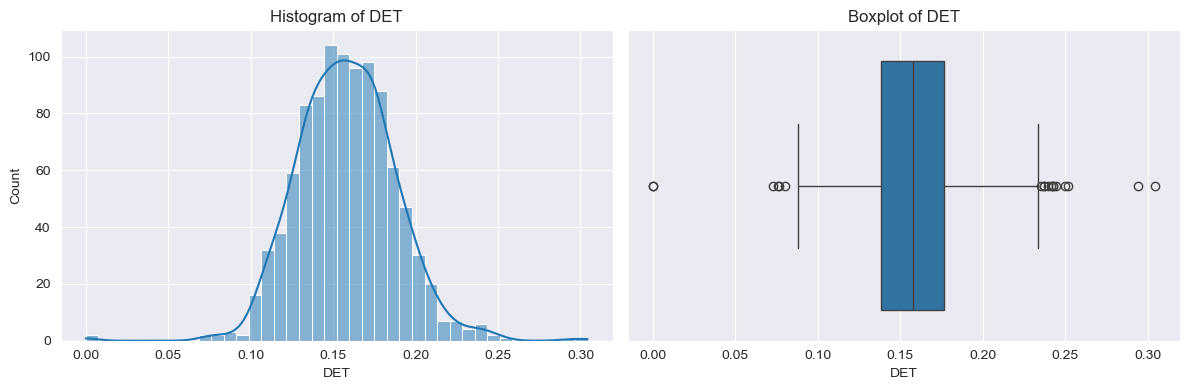

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/DET_distribution.png
outliers in 'DET': 
     Subject_ID       DET
51          141  0.000000
62          154  0.236842
67          163  0.236842
168         298  0.239437
171         303  0.241379
176         312  0.076336
197         342  0.251908
211         360  0.250000
325         500  0.294118
327         502  0.072581
621         871  0.244444
638         894  0.242424
718        1000  0.076010
776        1065  0.000000
821        1130  0.235294
840        1155  0.304348
891        1222  0.242424
928        1275  0.080000



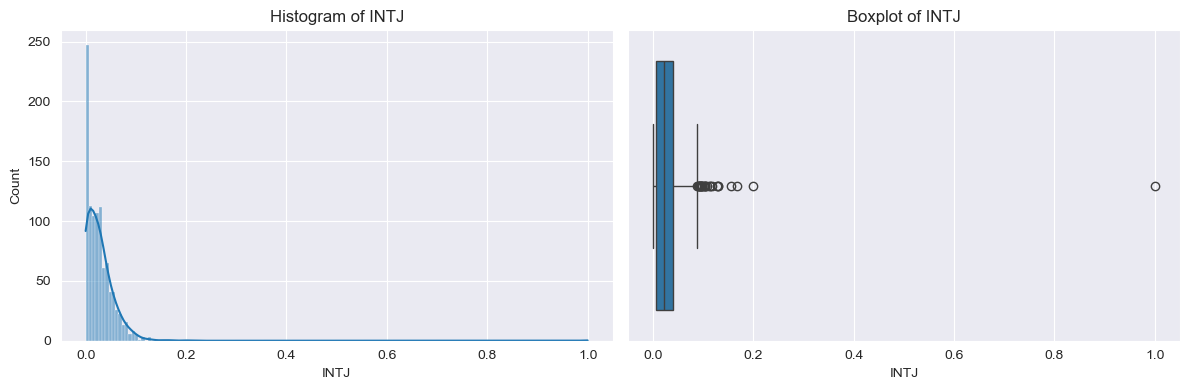

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/INTJ_distribution.png
outliers in 'INTJ': 
     Subject_ID      INTJ
41          130  0.106870
51          141  0.200000
209         358  0.092857
220         369  0.103448
248         402  0.101449
281         446  0.156463
295         466  0.095000
327         502  0.088710
331         506  0.097403
351         536  0.129032
391         589  0.095238
414         617  0.093458
428         632  0.113636
429         633  0.102941
468         678  0.166667
556         786  0.117647
560         790  0.089796
564         796  0.098425
581         821  0.092593
596         839  0.102857
609         854  0.098446
619         867  0.091837
666         929  0.094118
706         983  0.128378
776        1065  1.000000
805        1105  0.112903
889        1219  0.130435



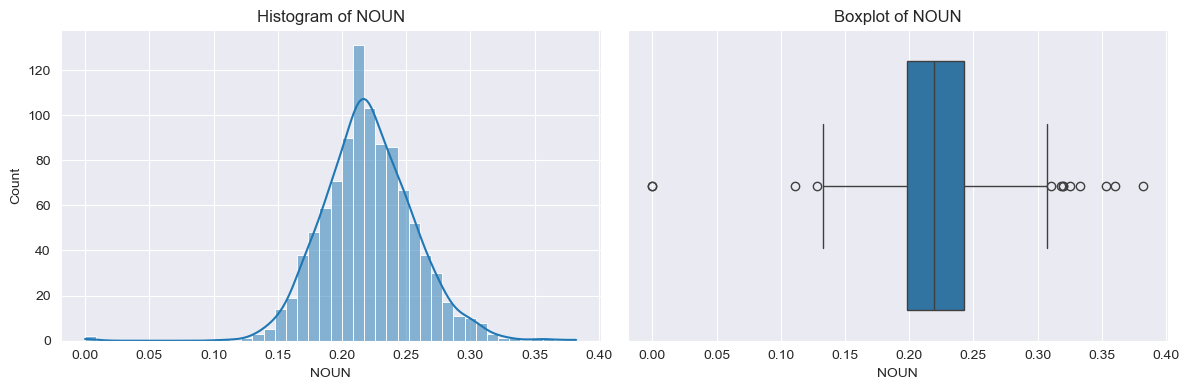

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/NOUN_distribution.png
outliers in 'NOUN': 
     Subject_ID      NOUN
51          141  0.000000
237         389  0.318182
325         500  0.352941
376         574  0.319635
622         872  0.128440
684         953  0.310345
737        1019  0.360656
776        1065  0.000000
808        1112  0.333333
821        1130  0.382353
822        1131  0.325301
867        1194  0.111111
929        1276  0.320000



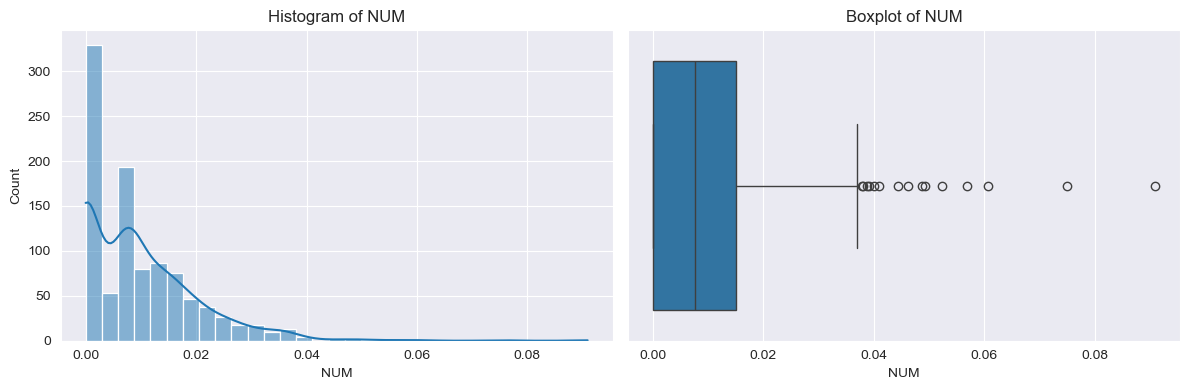

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/NUM_distribution.png
outliers in 'NUM': 
     Subject_ID       NUM
77          179  0.039062
114         225  0.037915
206         355  0.048780
237         389  0.090909
369         560  0.040000
440         648  0.044444
441         649  0.049296
452         662  0.052288
473         683  0.046154
528         756  0.075000
578         816  0.056872
695         967  0.040984
780        1071  0.037975
951        1305  0.060773
990        1357  0.038835



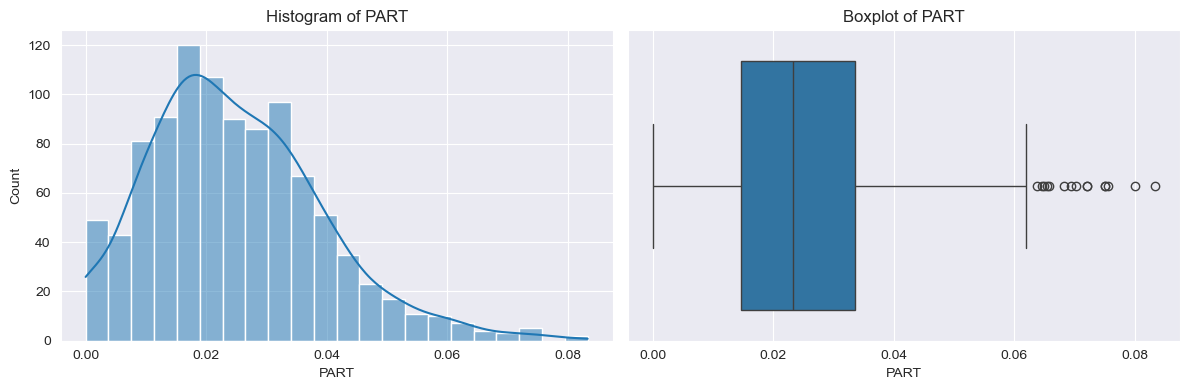

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PART_distribution.png
outliers in 'PART': 
     Subject_ID      PART
12           85  0.065359
135         254  0.072000
213         362  0.070175
233         385  0.064516
470         680  0.065693
506         727  0.075472
614         859  0.083333
637         893  0.063830
660         921  0.075000
668         932  0.068293
812        1116  0.064935
839        1152  0.072072
867        1194  0.069444
920        1257  0.075000
929        1276  0.080000



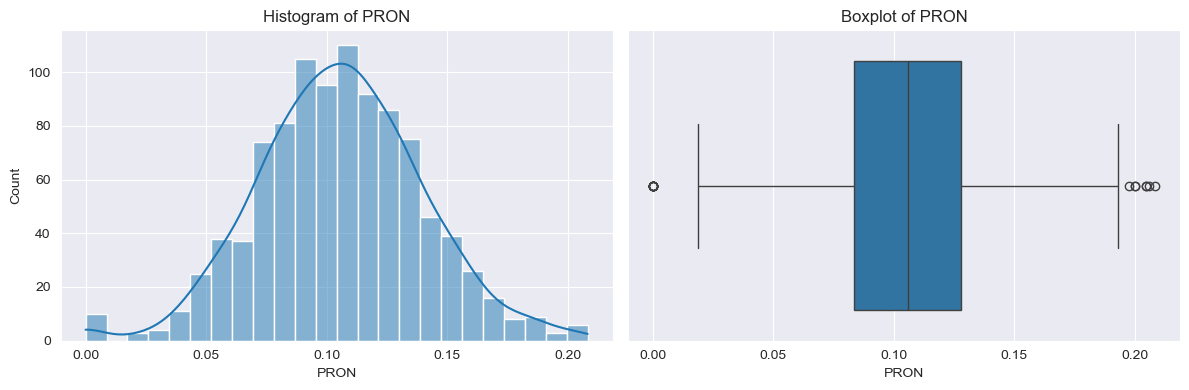

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PRON_distribution.png
outliers in 'PRON': 
     Subject_ID      PRON
51          141  0.200000
67          163  0.000000
233         385  0.000000
247         401  0.204724
369         560  0.000000
382         580  0.197674
423         626  0.000000
555         784  0.204724
621         871  0.000000
673         938  0.000000
776        1065  0.000000
796        1095  0.205882
821        1130  0.000000
840        1155  0.000000
867        1194  0.208333
928        1275  0.200000
929        1276  0.000000



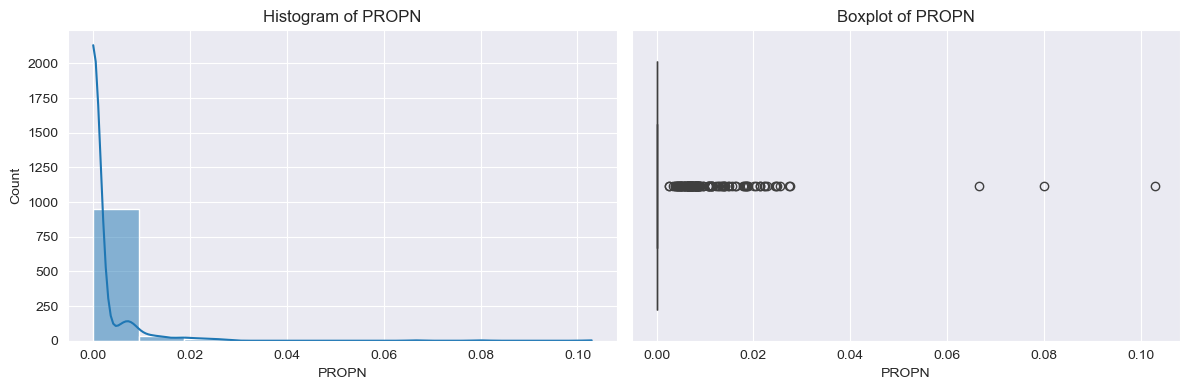

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PROPN_distribution.png
outliers in 'PROPN': 
      Subject_ID     PROPN
1             43  0.004219
2             44  0.005128
4             49  0.016260
5             50  0.005435
28           109  0.008264
...          ...       ...
972         1331  0.007519
974         1334  0.009524
991         1358  0.008333
994         1361  0.021277
1001        1370  0.002513

[131 rows x 2 columns]



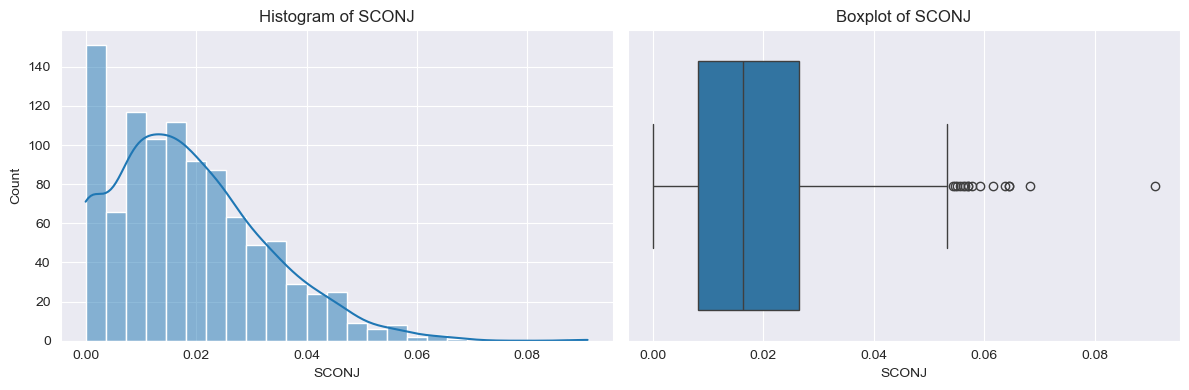

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/SCONJ_distribution.png
outliers in 'SCONJ': 
      Subject_ID     SCONJ
29           110  0.068323
80           185  0.057851
133          252  0.057143
233          385  0.064516
255          411  0.061644
600          843  0.054264
651          911  0.056250
712          991  0.054795
746         1028  0.059172
812         1116  0.090909
816         1120  0.055118
836         1148  0.064516
849         1169  0.057143
867         1194  0.055556
886         1216  0.056604
1000        1369  0.063830



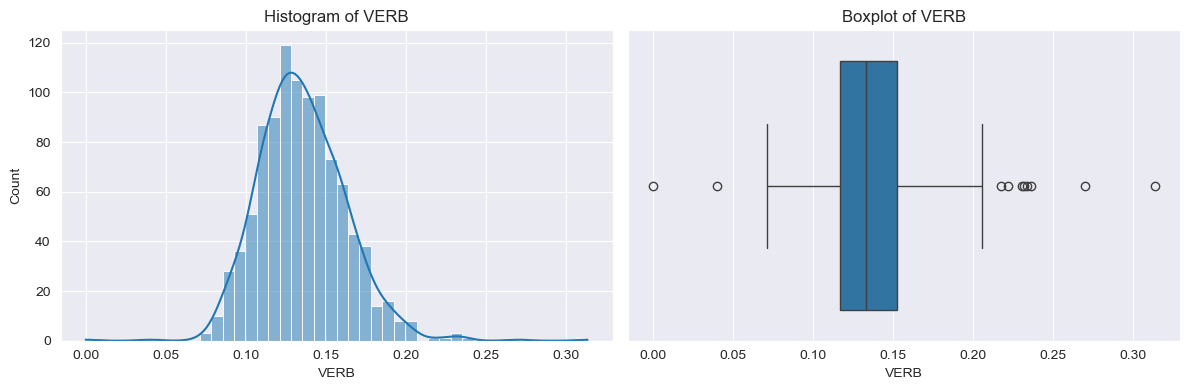

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/VERB_distribution.png
outliers in 'VERB': 
     Subject_ID      VERB
324         499  0.230769
329         504  0.231707
369         560  0.040000
614         859  0.222222
637         893  0.234043
661         922  0.313725
776        1065  0.000000
840        1155  0.217391
854        1176  0.236111
947        1298  0.270270



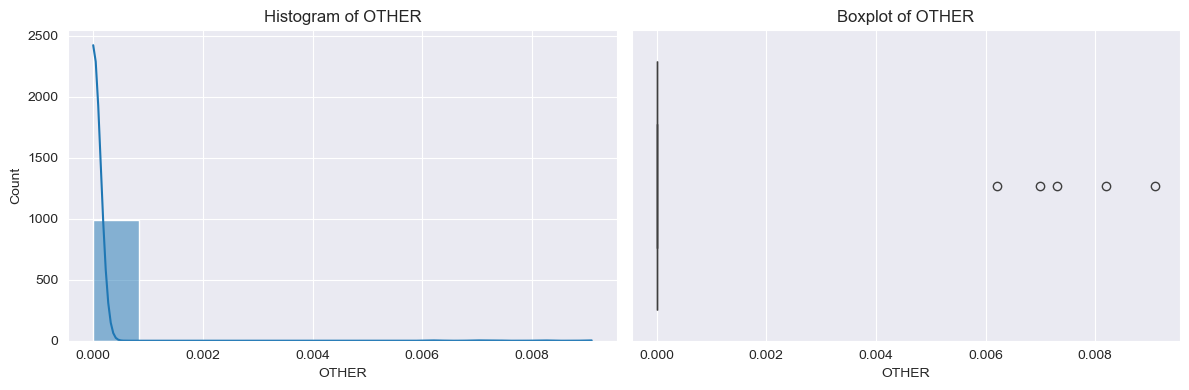

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/OTHER_distribution.png
outliers in 'OTHER': 
     Subject_ID     OTHER
151         275  0.009091
203         348  0.007299
288         455  0.006211
445         653  0.006993
887        1217  0.008197



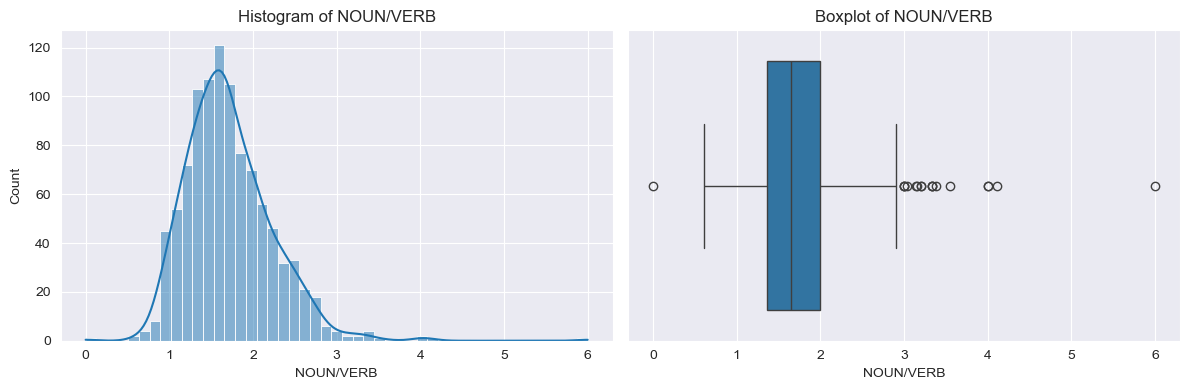

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/NOUN_VERB_distribution.png
outliers in 'NOUN/VERB': 
     Subject_ID  NOUN/VERB
51          141   0.000000
168         298   3.000000
197         342   3.333333
211         360   3.000000
315         490   3.142857
317         492   4.000000
325         500   4.000000
369         560   6.000000
376         574   4.117647
412         614   3.153846
526         754   3.333333
601         844   3.333333
636         892   3.200000
669         933   3.200000
711         989   3.000000
757        1045   3.038462
875        1203   3.555556
965        1322   3.384615



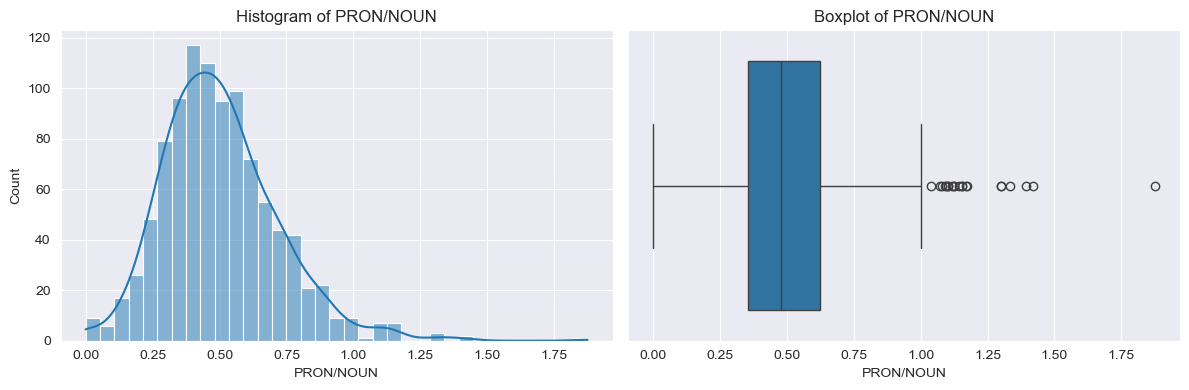

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PRON_NOUN_distribution.png
outliers in 'PRON/NOUN': 
     Subject_ID  PRON/NOUN
41          130   1.102564
44          134   1.117647
133         252   1.080000
141         263   1.090909
176         312   1.333333
209         358   1.421053
250         404   1.040000
328         503   1.095238
482         696   1.074074
555         784   1.300000
562         793   1.300000
602         845   1.125000
697         969   1.142857
718        1000   1.392857
727        1009   1.102041
867        1194   1.875000
904        1239   1.170732
928        1275   1.153846
934        1282   1.172414
938        1286   1.125000
975        1336   1.153846



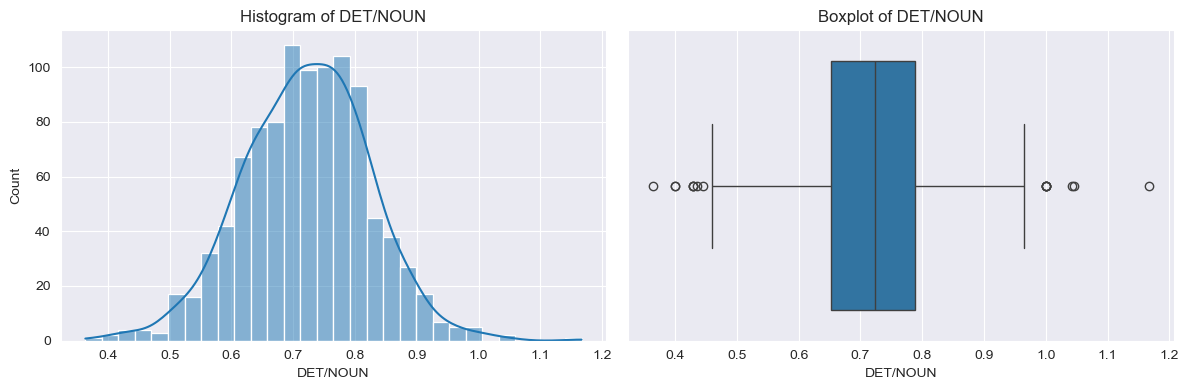

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/DET_NOUN_distribution.png
outliers in 'DET/NOUN': 
     Subject_ID  DET/NOUN
171         303  1.166667
198         343  1.045455
237         389  0.428571
327         502  0.428571
387         585  0.400000
621         871  1.000000
638         894  1.000000
677         944  0.400000
737        1019  0.363636
774        1062  0.434783
805        1105  0.444444
840        1155  1.000000
867        1194  1.000000
889        1219  1.000000
918        1254  1.041667
959        1315  0.428571



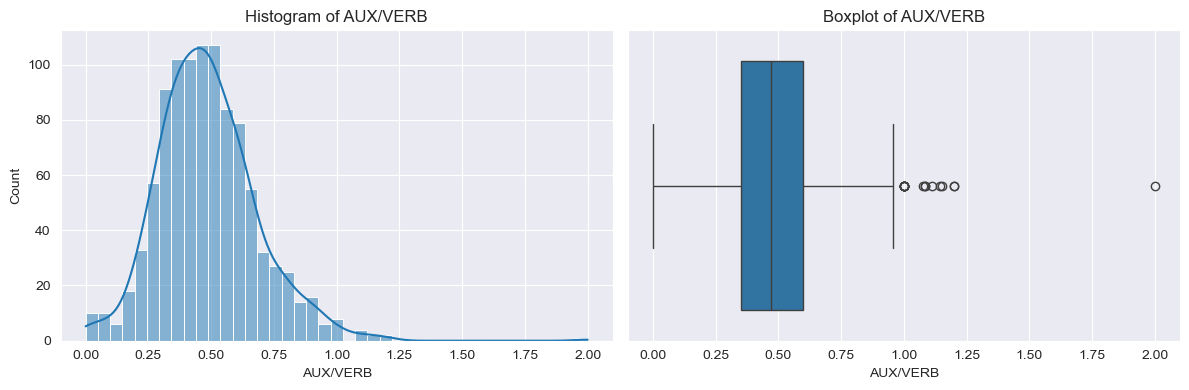

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/AUX_VERB_distribution.png
outliers in 'AUX/VERB': 
     Subject_ID  AUX/VERB
51          141  1.000000
89          198  1.000000
352         537  1.000000
369         560  2.000000
526         754  1.000000
558         788  1.200000
621         871  1.000000
628         883  1.083333
639         895  1.200000
657         918  1.150000
685         954  1.111111
711         989  1.000000
717         999  1.083333
861        1188  1.142857
913        1249  1.000000
965        1322  1.076923
994        1361  1.000000



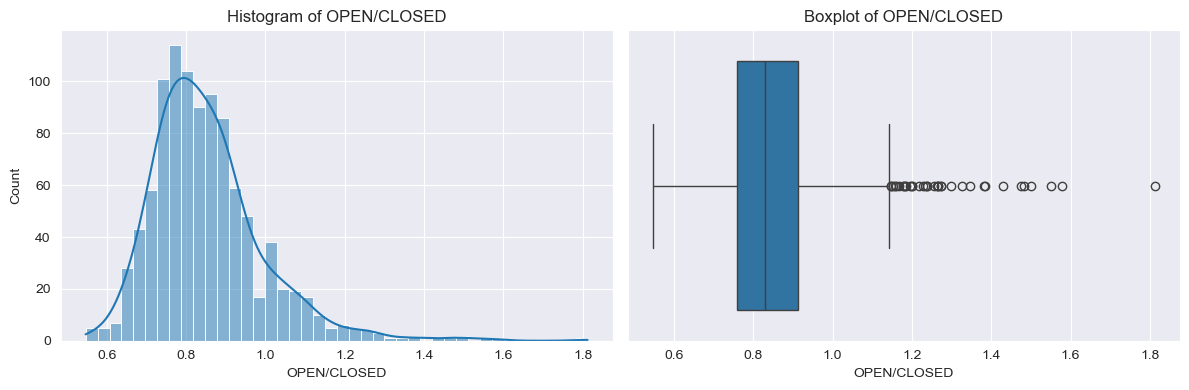

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/OPEN_CLOSED_distribution.png
outliers in 'OPEN/CLOSED': 
     Subject_ID  OPEN/CLOSED
51          141     1.500000
121         234     1.266667
156         282     1.217391
202         347     1.183099
281         446     1.194030
308         481     1.229167
324         499     1.166667
325         500     1.266667
327         502     1.254545
369         560     1.272727
428         632     1.146341
439         647     1.382353
462         672     1.200000
468         678     1.234043
504         724     1.238095
661         922     1.550000
666         929     1.297297
677         944     1.812500
684         953     1.148148
687         957     1.200000
737        1019     1.346154
802        1101     1.160000
805        1105     1.384615
821        1130     1.428571
822        1131     1.184211
850        1170     1.577778
854        1176     1.482759
860        1186     1.152174
86

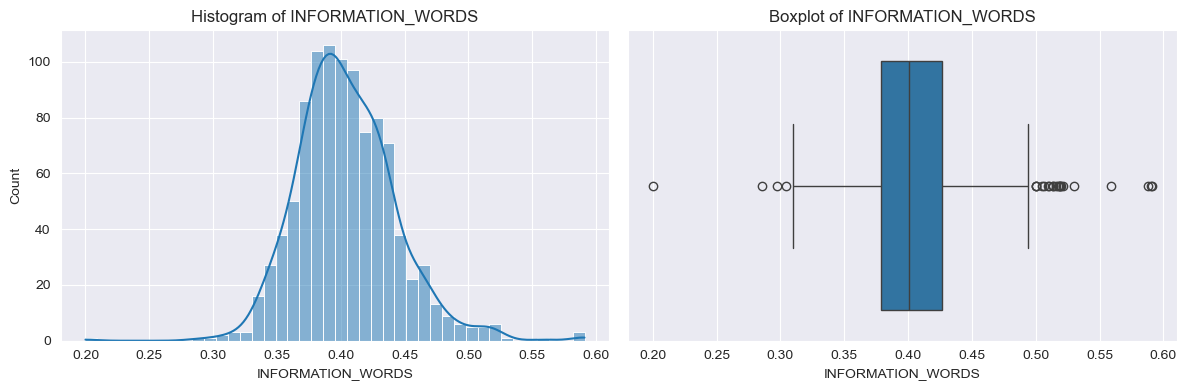

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/INFORMATION_WORDS_distribution.png
outliers in 'INFORMATION_WORDS': 
     Subject_ID  INFORMATION_WORDS
51          141           0.200000
67          163           0.500000
176         312           0.297710
209         358           0.285714
233         385           0.516129
237         389           0.590909
308         481           0.504673
324         499           0.519231
423         626           0.500000
637         893           0.510638
661         922           0.588235
684         953           0.517241
687         957           0.500000
706         983           0.304054
737        1019           0.590164
802        1101           0.518519
821        1130           0.558824
822        1131           0.530120
840        1155           0.521739
852        1174           0.519231
874        1202           0.509615
929        1276           0.520000
947        1298           

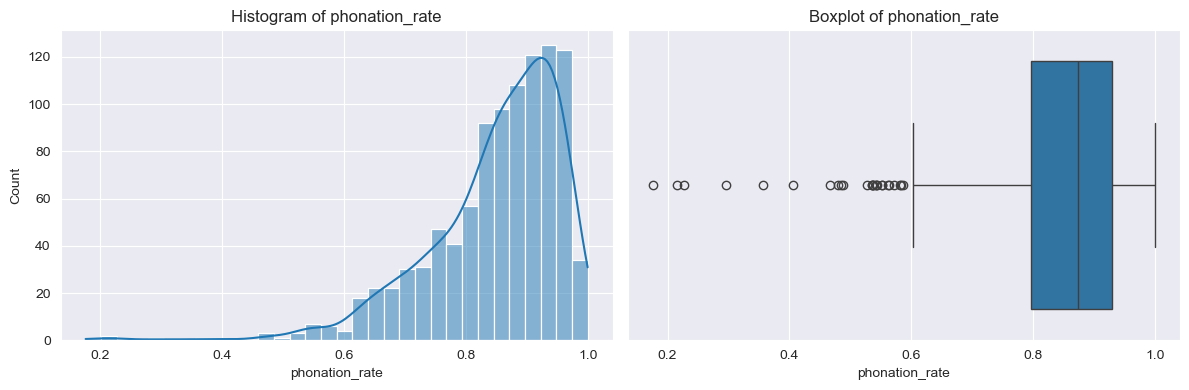

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/phonation_rate_distribution.png
outliers in 'phonation_rate': 
     Subject_ID  phonation_rate
51          141        0.215877
63          157        0.537718
67          163        0.487828
298         469        0.175926
315         490        0.542033
326         501        0.484166
329         504        0.551567
332         507        0.480075
338         516        0.357143
346         530        0.536946
349         534        0.534682
403         604        0.583455
617         864        0.563694
637         893        0.527197
661         922        0.405056
734        1016        0.544067
774        1062        0.542599
819        1125        0.581305
840        1155        0.562500
854        1176        0.534852
886        1216        0.585576
891        1222        0.295746
947        1298        0.227207
949        1302        0.570936
952        1308        0.466181
959  

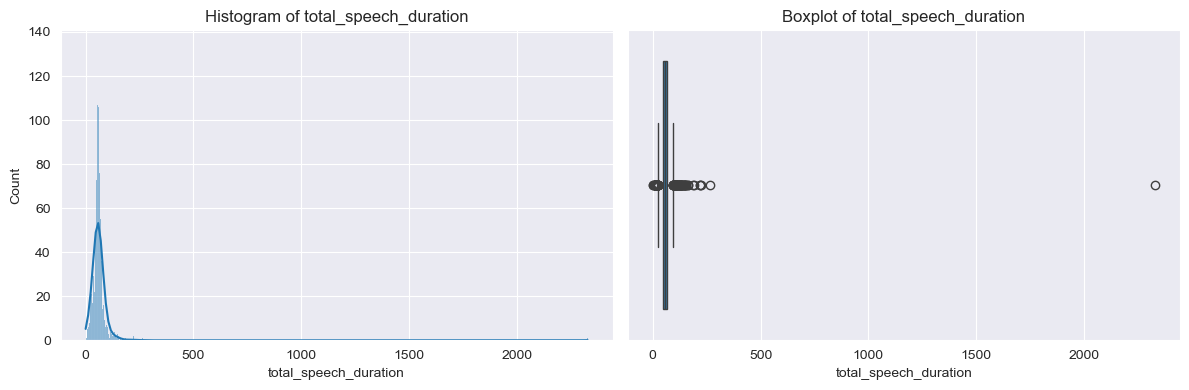

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/total_speech_duration_distribution.png
outliers in 'total_speech_duration': 
      Subject_ID  total_speech_duration
1             43                 104.79
13            86                 144.48
30           111                  16.38
35           122                 161.67
41           130                 108.78
...          ...                    ...
959         1315                  19.38
960         1316                 120.15
962         1318                  18.63
994         1361                  20.22
1001        1370                2328.39

[105 rows x 2 columns]



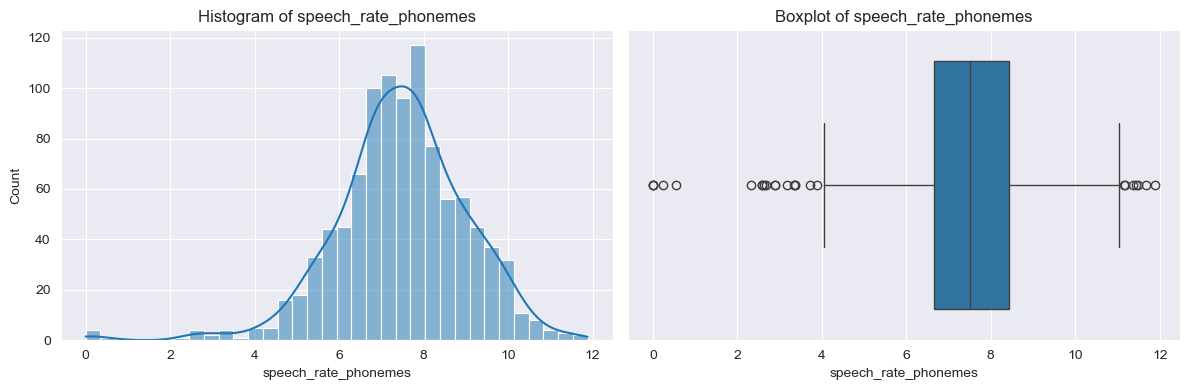

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/speech_rate_phonemes_distribution.png
outliers in 'speech_rate_phonemes': 
     Subject_ID  speech_rate_phonemes
48          138              0.000000
51          141              0.557103
63          157              2.675693
133         252             11.155418
237         389              2.580071
294         465             11.182869
298         469              0.000000
325         500              3.369173
338         516              0.000000
353         538             11.354349
369         560              2.893722
385         583              3.352219
537         766             11.438196
594         836             11.882716
644         902             11.492631
661         922              2.585133
684         953              2.621581
702         975             11.660617
776        1065              0.242718
796        1095              3.713607
854        1176            

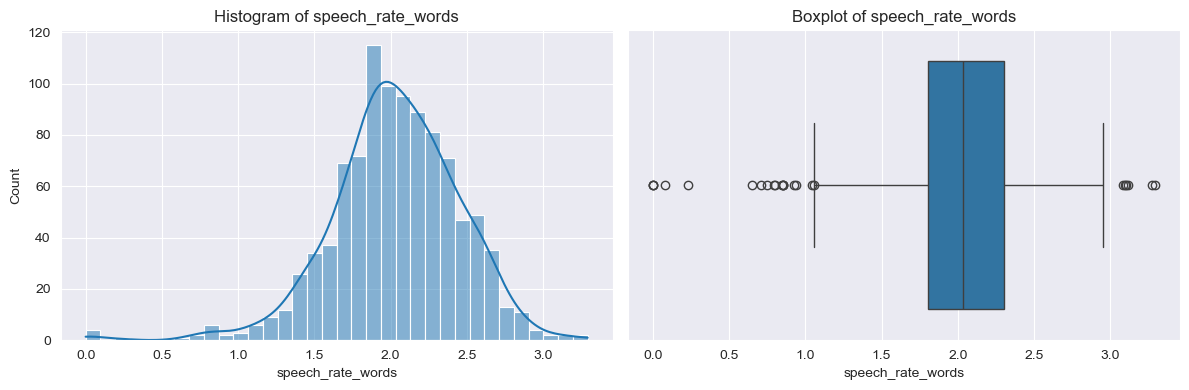

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/speech_rate_words_distribution.png
outliers in 'speech_rate_words': 
     Subject_ID  speech_rate_words
48          138           0.000000
51          141           0.232126
63          157           0.709220
89          198           1.045510
237         389           0.652432
298         469           0.000000
325         500           0.938950
338         516           0.000000
353         538           3.093987
369         560           0.854963
385         583           0.928549
537         766           3.104862
594         836           3.271605
644         902           3.292568
661         922           0.794228
684         953           0.747214
702         975           3.115547
776        1065           0.080906
796        1095           1.054664
853        1175           3.080391
891        1222           0.853860
947        1298           0.800635
952        1308           

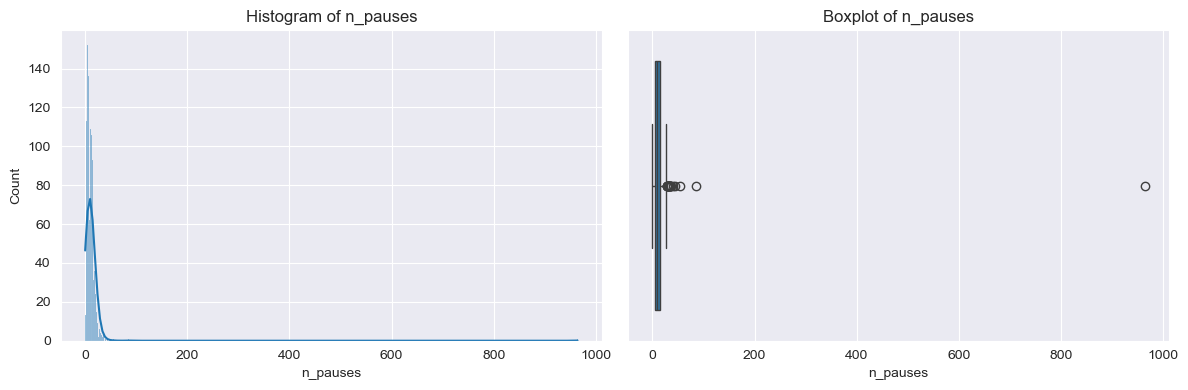

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/n_pauses_distribution.png
outliers in 'n_pauses': 
      Subject_ID  n_pauses
35           122      32.0
41           130      29.0
43           133      36.0
99           208      30.0
307          480      30.0
323          498      31.0
410          612      34.0
458          668      35.0
476          689      41.0
535          764      85.0
578          816      34.0
696          968      35.0
744         1026      30.0
757         1045      28.0
771         1059      55.0
868         1195      28.0
902         1237      28.0
906         1241      32.0
912         1248      44.0
926         1271      35.0
1001        1370     964.0



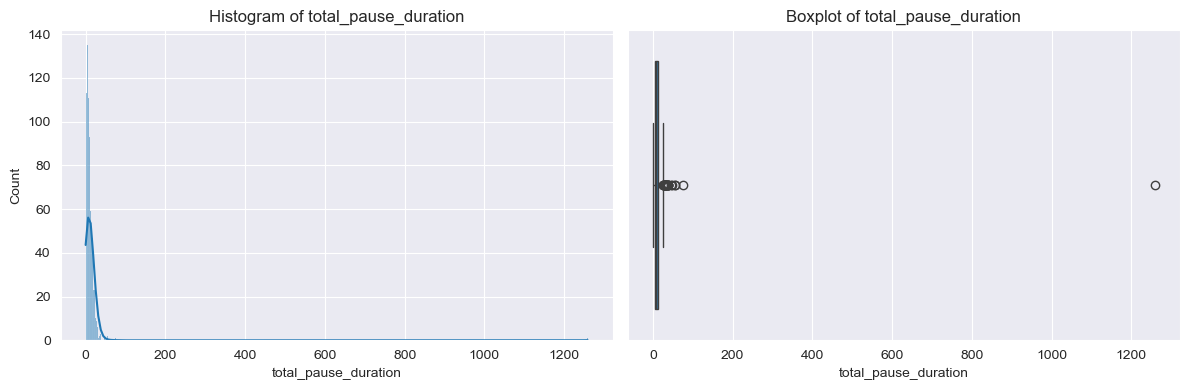

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/total_pause_duration_distribution.png
outliers in 'total_pause_duration': 
      Subject_ID  total_pause_duration
43           133                 45.33
63           157                 28.65
99           208                 28.20
117          229                 26.79
166          295                 29.01
307          480                 38.79
315          490                 28.08
323          498                 30.63
326          501                 30.84
329          504                 26.58
330          505                 28.62
340          520                 28.92
346          530                 28.17
349          534                 28.95
394          592                 26.58
403          604                 34.11
535          764                 74.79
578          816                 46.74
617          864                 28.74
636          892                 28.65
661   

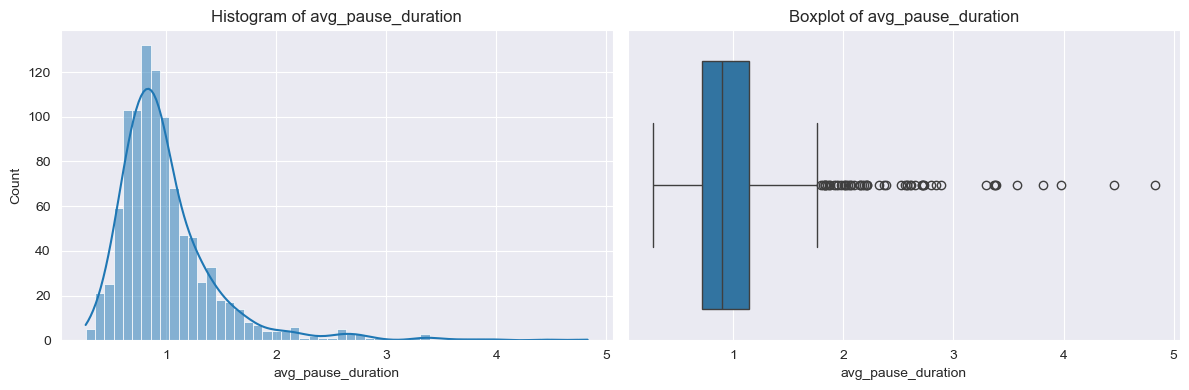

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/avg_pause_duration_distribution.png
outliers in 'avg_pause_duration': 
     Subject_ID  avg_pause_duration
3            46            2.152500
51          141            3.372000
63          157            2.604545
67          163            2.730000
136         257            1.872000
165         294            1.915714
167         297            2.370000
177         314            2.190000
195         339            2.100000
326         501            2.202857
329         504            2.215000
332         507            3.574286
335         510            2.800000
341         522            2.715000
346         530            2.012143
349         534            1.930000
361         549            2.046000
375         570            2.840000
387         585            3.810000
432         638            2.150000
482         696            1.830000
500         720            1.800000
5

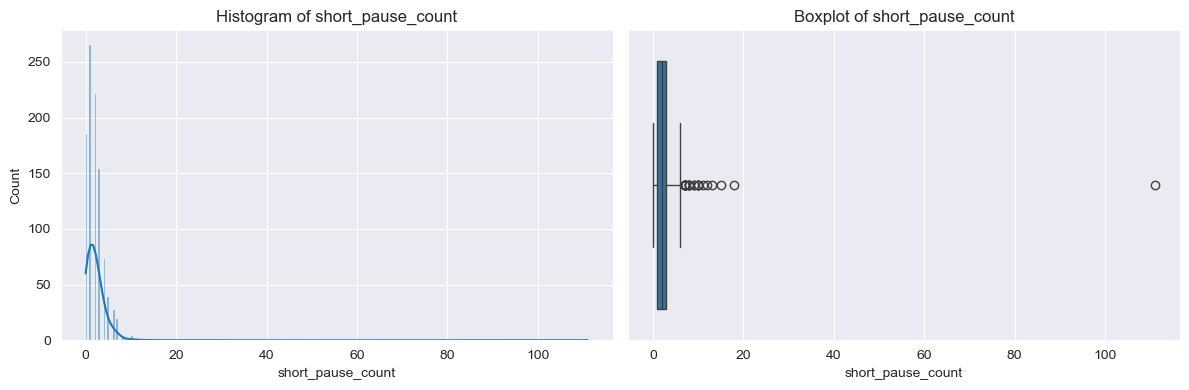

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/short_pause_count_distribution.png
outliers in 'short_pause_count': 
      Subject_ID  short_pause_count
1             43                7.0
35           122               11.0
37           124                7.0
41           130               18.0
44           134                7.0
50           140                7.0
97           206                9.0
99           208                7.0
117          229                7.0
160          289                7.0
173          305               13.0
269          431               10.0
276          439                7.0
290          461               10.0
323          498                7.0
376          574                7.0
410          612               10.0
458          668                7.0
476          689               15.0
528          756                7.0
535          764                7.0
546          775                8.0
549

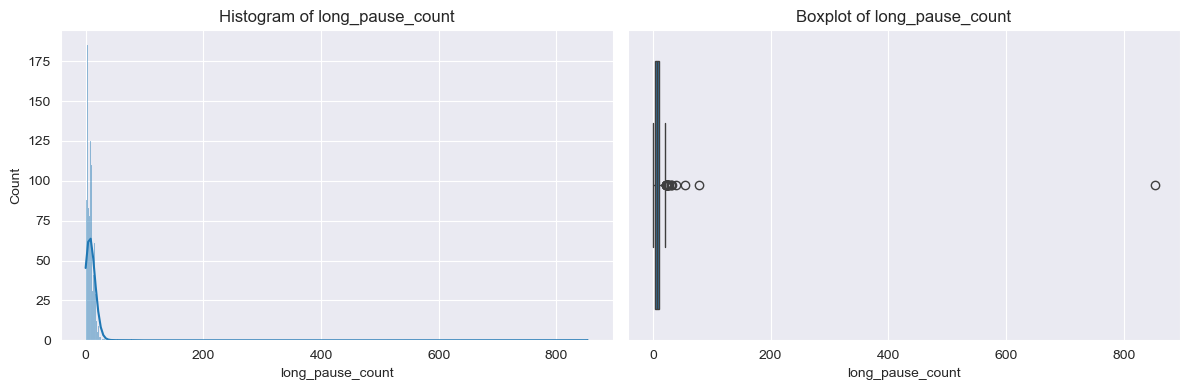

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/long_pause_count_distribution.png
outliers in 'long_pause_count': 
      Subject_ID  long_pause_count
43           133              33.0
99           208              23.0
166          295              22.0
307          480              26.0
323          498              24.0
410          612              24.0
458          668              28.0
476          689              26.0
535          764              78.0
567          800              22.0
578          816              31.0
696          968              25.0
722         1004              25.0
744         1026              24.0
771         1059              54.0
774         1062              24.0
854         1176              24.0
868         1195              22.0
906         1241              30.0
912         1248              40.0
926         1271              23.0
1001        1370             853.0



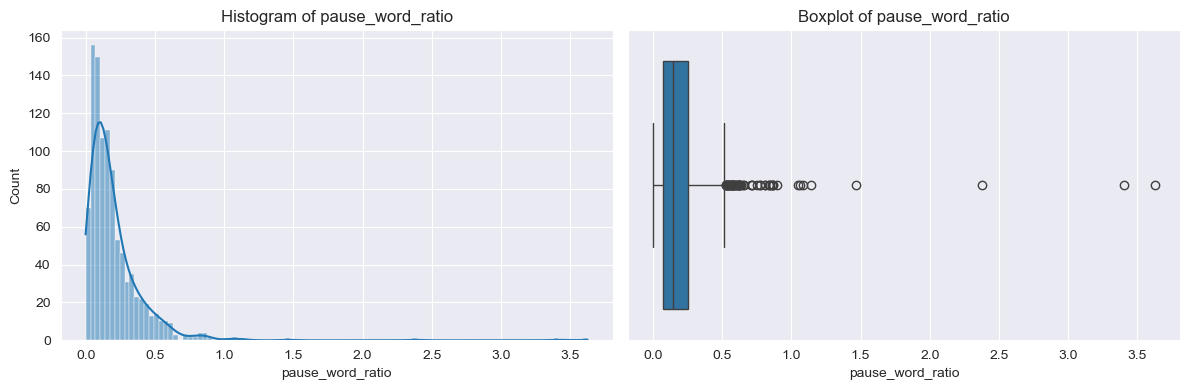

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/pause_word_ratio_distribution.png
outliers in 'pause_word_ratio': 
      Subject_ID  pause_word_ratio
51           141          3.625806
63           157          0.858813
64           158          0.571850
67           163          1.047985
72           173          0.651456
112          222          0.543255
121          234          0.586387
166          295          0.623067
171          303          0.530120
212          361          0.633655
315          490          0.844004
324          499          0.564399
326          501          1.065285
329          504          0.812099
332          507          1.081712
340          520          0.621534
346          530          0.861468
349          534          0.869369
394          592          0.556183
403          604          0.713300
423          626          0.607350
497          714          0.632263
514          738          0.

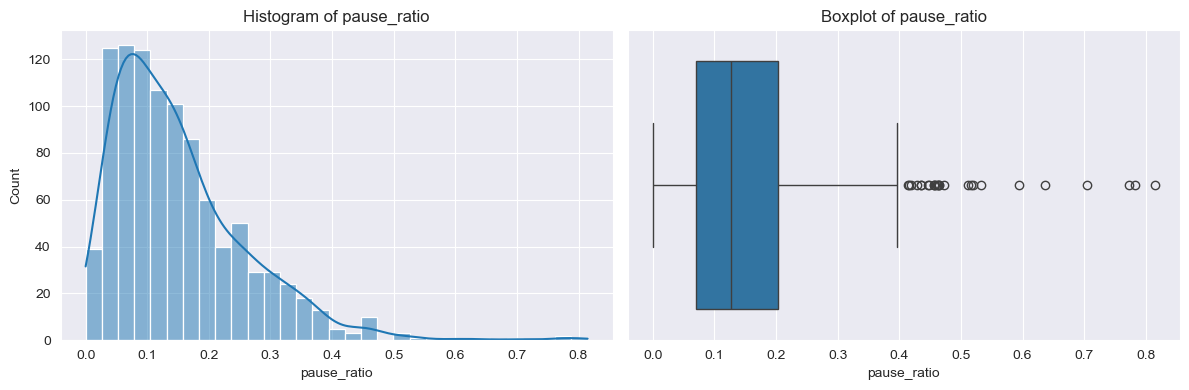

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/pause_ratio_distribution.png
outliers in 'pause_ratio': 
     Subject_ID  pause_ratio
51          141     0.782730
63          157     0.461799
67          163     0.511236
298         469     0.814815
315         490     0.457478
326         501     0.515775
329         504     0.447927
332         507     0.519303
338         516     0.636364
346         530     0.462562
349         534     0.464836
403         604     0.416179
617         864     0.435851
637         893     0.472106
661         922     0.594736
734        1016     0.455550
774        1062     0.457040
819        1125     0.418227
840        1155     0.435855
854        1176     0.465069
886        1216     0.414099
891        1222     0.704047
947        1298     0.772504
949        1302     0.428571
952        1308     0.533299
959        1315     0.447009



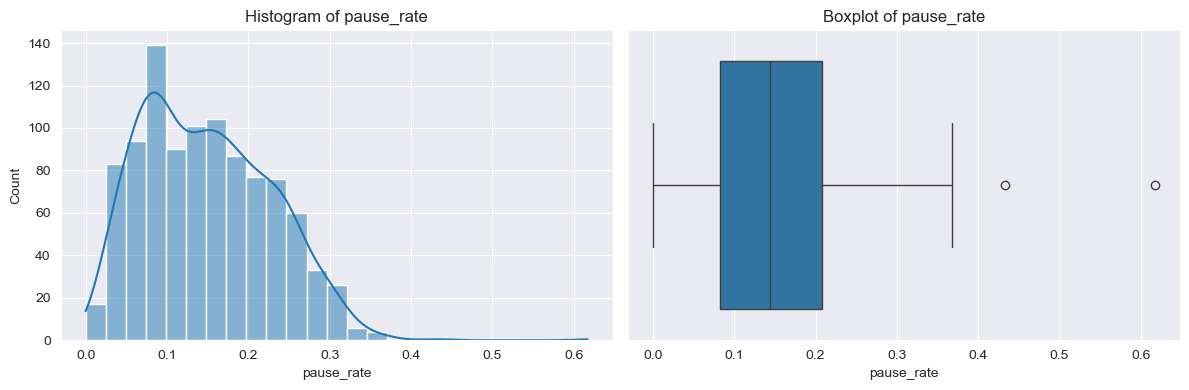

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/pause_rate_distribution.png
outliers in 'pause_rate': 
     Subject_ID  pause_rate
298         469    0.617284
338         516    0.432900



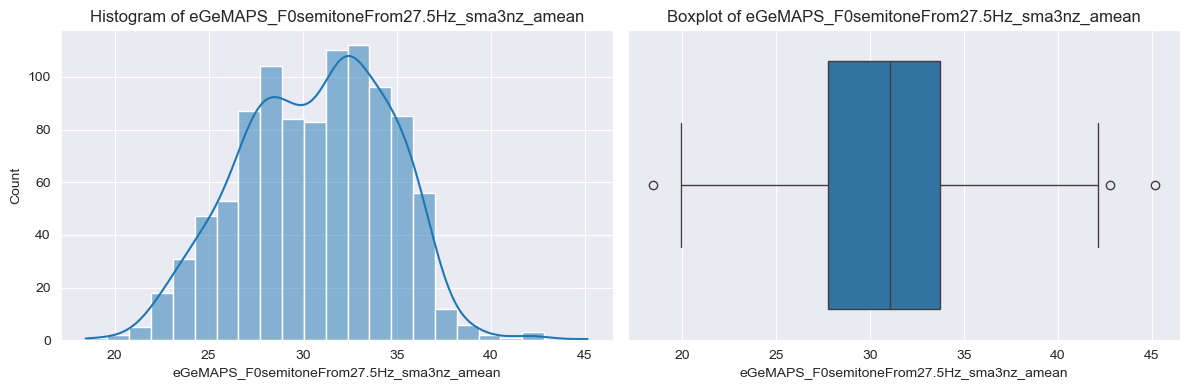

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean
293         464                                  42.780781
703         979                                  45.153229
742        1024                                  18.452993



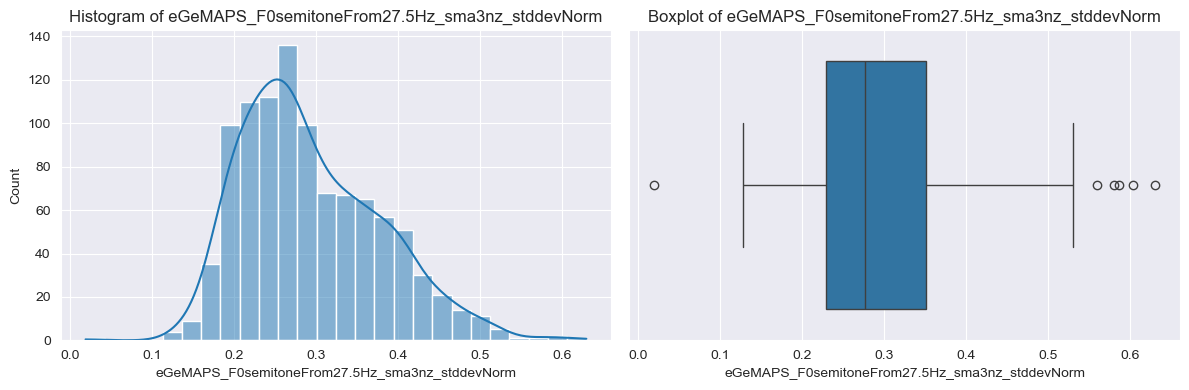

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm
226         376                                        0.559050
338         516                                        0.019474
379         577                                        0.585957
430         636                                        0.580067
787        1082                                        0.629856
850        1170                                        0.603491



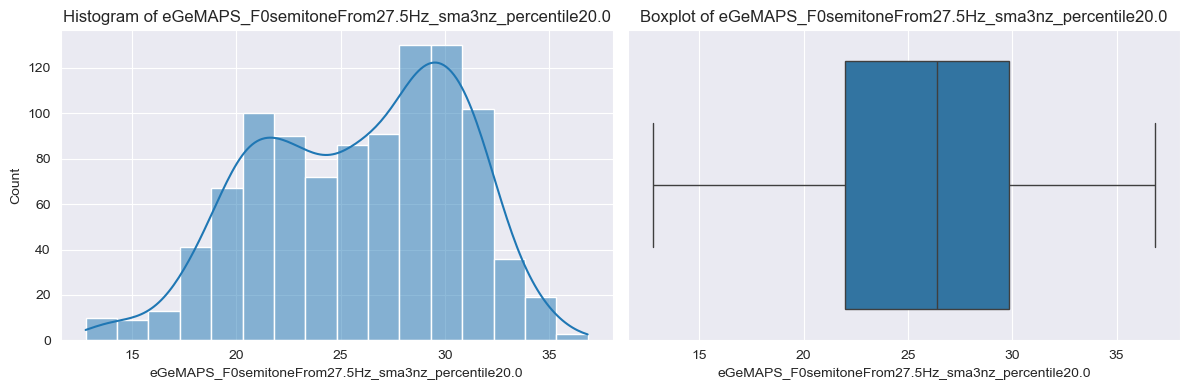

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile20.0_distribution.png


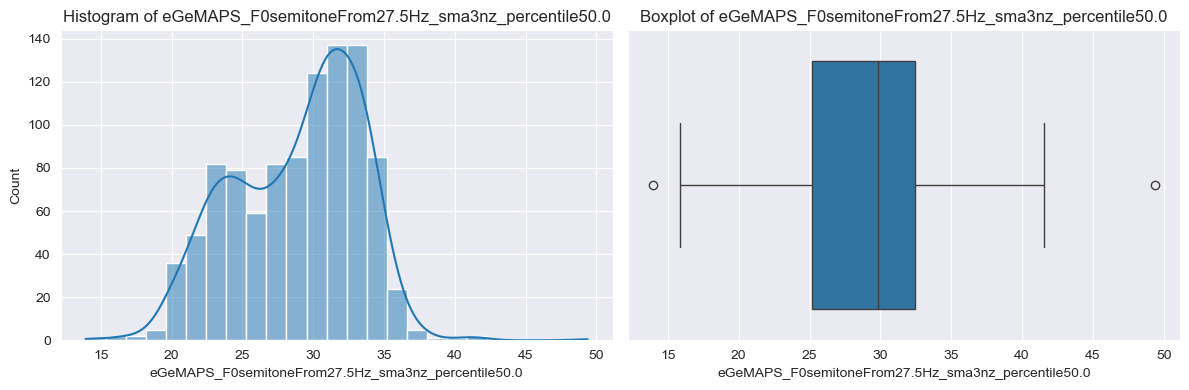

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0
703         979                                          49.378487 
742        1024                                          13.933430 



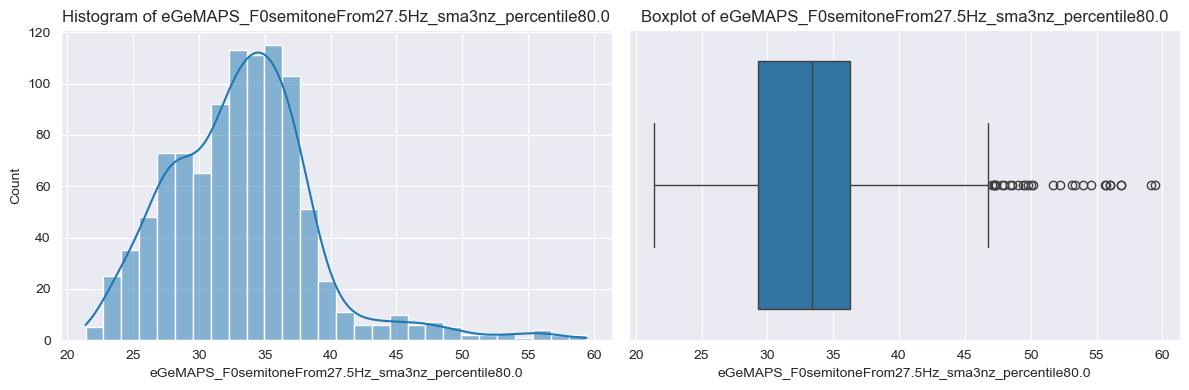

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0
12           85                                          49.540466 
26          105                                          56.882339 
28          109                                          56.860779 
48          138                                          48.999115 
77          179                                          54.593468 
89          198                                          59.107746 
186         327                                          49.438679 
191         335                                          51.723694 
293         464                                          53.987526 
416         619                                          48.607361 
430         636  

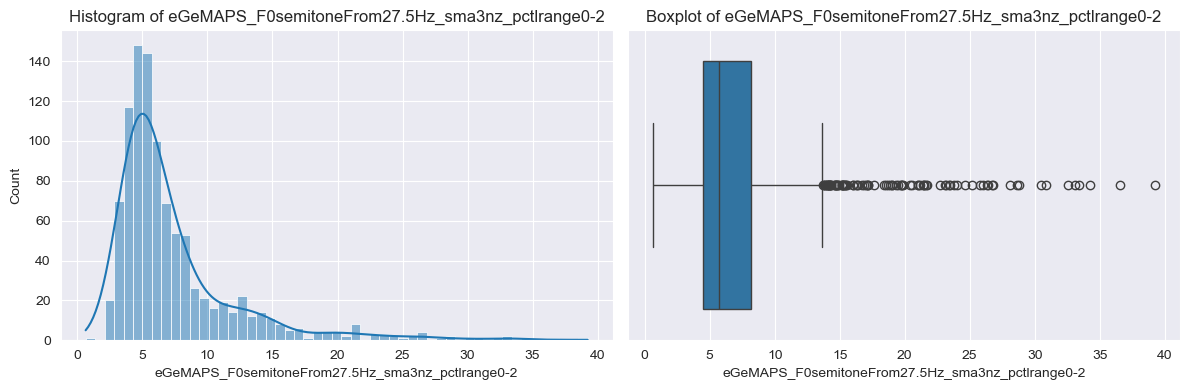

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': 
      Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
5             50                                         20.590710
12            85                                         19.495365
24           103                                         23.774361
26           105                                         36.532921
28           109                                         34.232750
...          ...                                               ...
973         1332                                         30.835918
976         1339                                         15.337614
986         1353                                         14.069244
996         1363                                         19.688921
1000        1369                

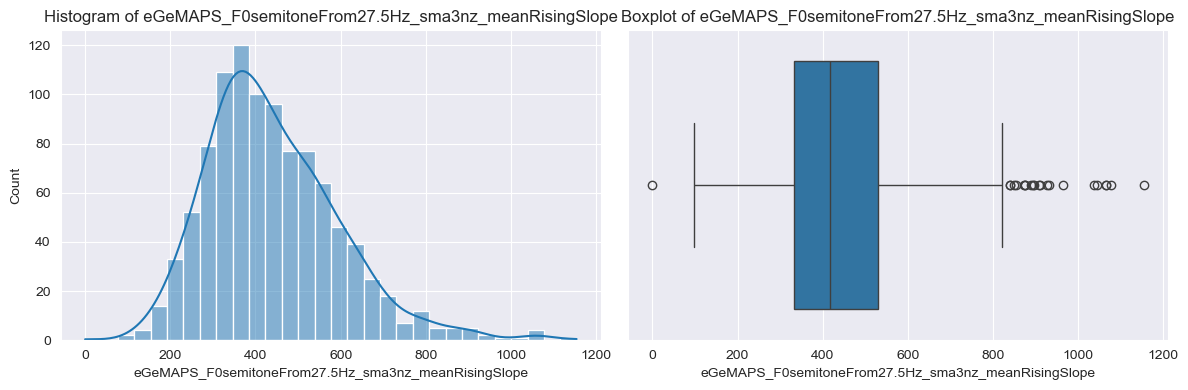

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope
26          105                                        1066.390869  
105         214                                         874.279114  
158         284                                         840.093933  
338         516                                           0.000000  
371         566                                         853.935852  
387         585                                         927.200439  
398         597                                         910.847229  
422         625                                         895.085632  
484         698                                        1154.244019  
499         719                                         871.935974  
516 

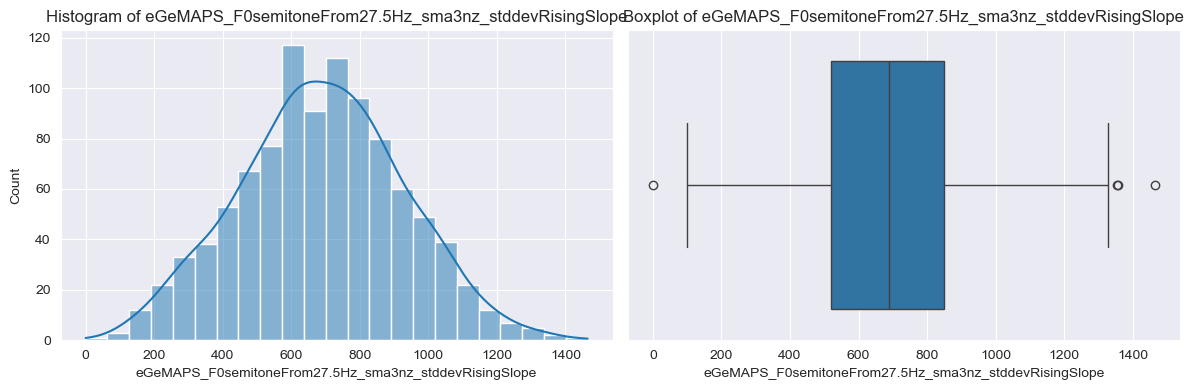

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
338         516                                           0.000000    
611         856                                        1355.929077    
822        1131                                        1353.342163    
886        1216                                        1464.762207    



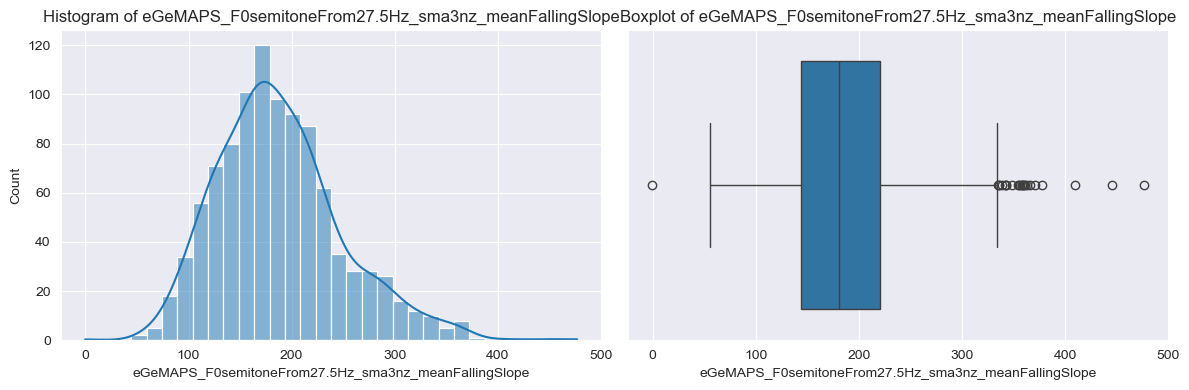

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
19           93                                         360.216248   
28          109                                         358.136414   
105         214                                         338.327759   
183         324                                         361.161255   
190         331                                         359.067505   
237         389                                         335.627319   
277         441                                         378.023468   
338         516                                          -0.250567   
340         520                                         363.002594   
430         636                                         371.1

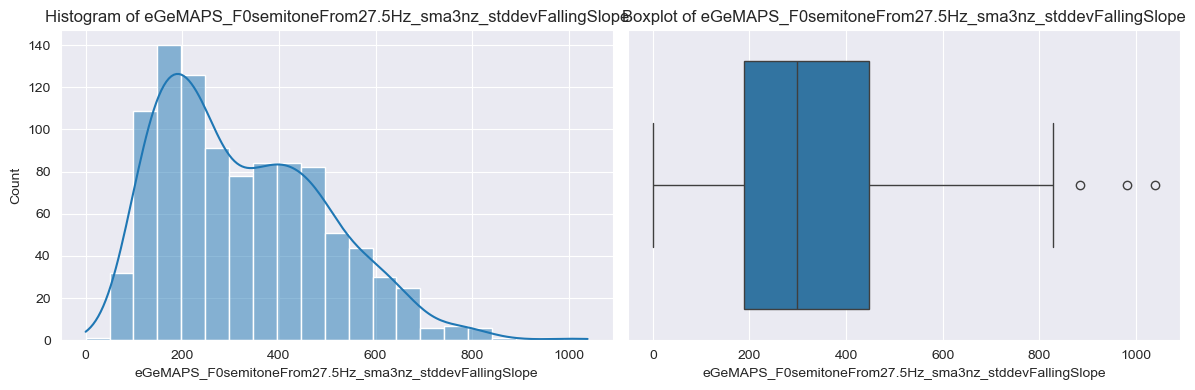

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
67          163                                         884.791382     
669         933                                         981.045471     
673         938                                        1039.122314     



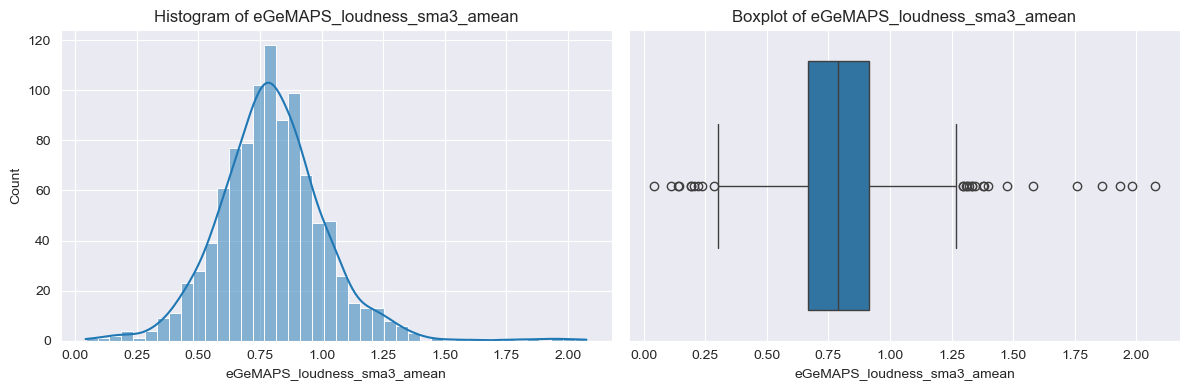

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_amean_distribution.png
outliers in 'eGeMAPS_loudness_sma3_amean': 
     Subject_ID  eGeMAPS_loudness_sma3_amean
16           90                     1.397424
32          115                     1.933018
48          138                     0.238734
113         224                     1.858821
142         264                     1.342902
252         407                     1.307241
260         420                     1.579919
275         438                     0.192725
286         451                     1.334660
298         469                     0.143771
304         477                     1.314458
338         516                     0.042498
346         530                     0.286641
357         543                     1.758065
459         669                     1.296607
540         769                     1.981725
637         893                     0.191855
6

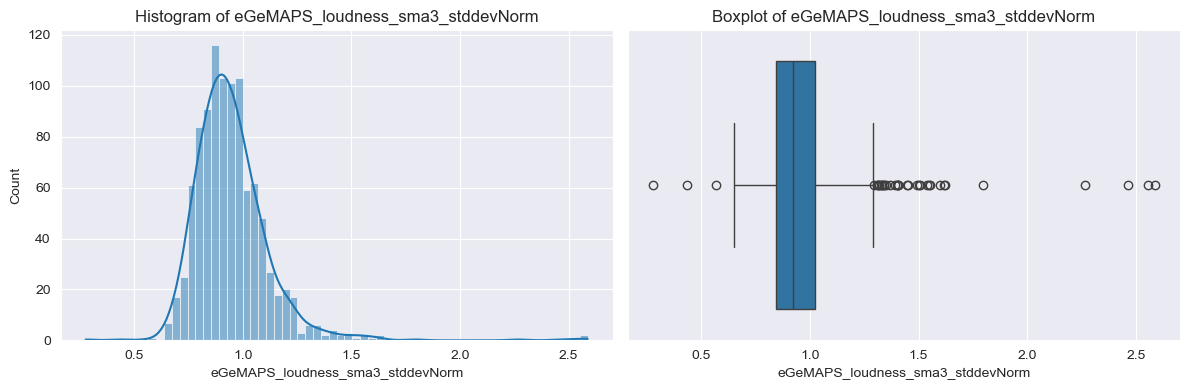

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevNorm
64          158                          1.492024
67          163                          1.399622
73          174                          1.316813
99          208                          1.308338
212         361                          1.445686
237         389                          2.587249
298         469                          0.277190
317         492                          1.312339
324         499                          1.367508
325         500                          1.539072
329         504                          1.615326
332         507                          1.620880
338         516                          1.348678
369         560                          1.329831
385         583                          1.295425
5

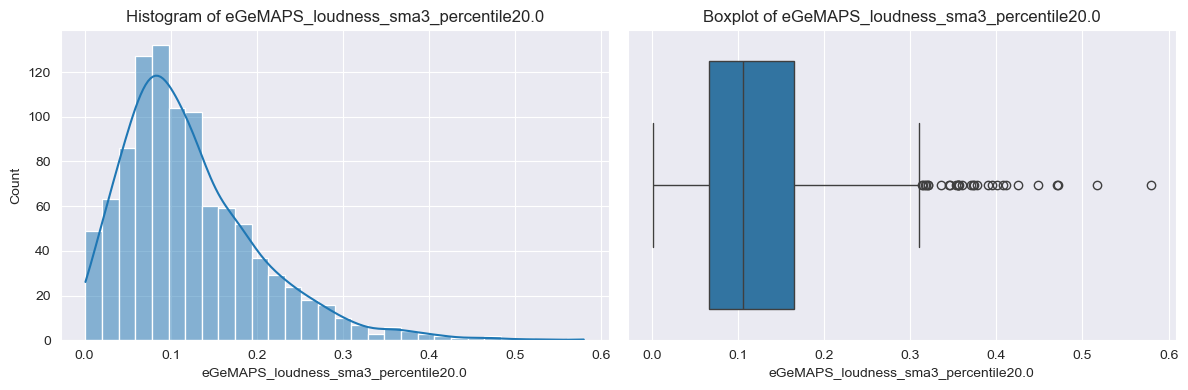

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_percentile20.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile20.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile20.0
106         215                              0.373283
177         314                              0.360536
293         464                              0.579608
304         477                              0.352692
357         543                              0.335982
398         597                              0.377573
456         666                              0.400799
469         679                              0.345062
490         706                              0.394999
520         745                              0.355606
535         764                              0.318139
540         769                              0.425466
554         783                              0.313418
563         794                      

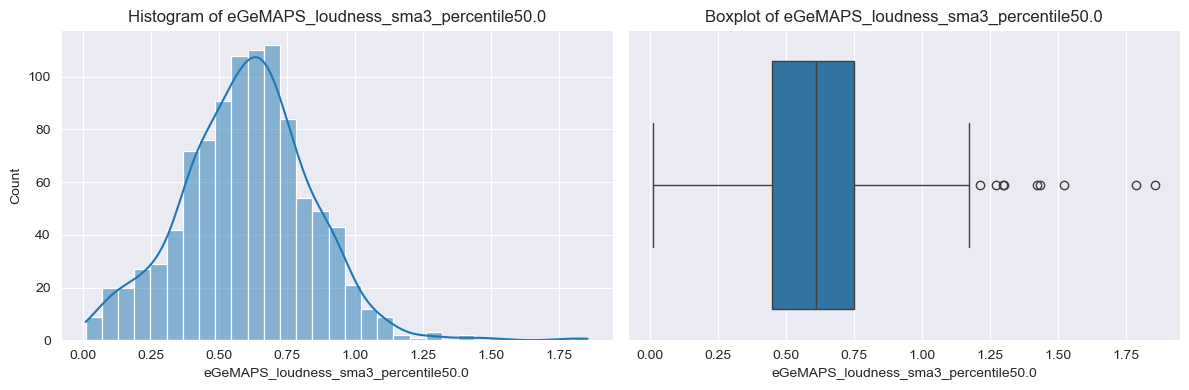

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_percentile50.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile50.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile50.0
16           90                              1.295877
32          115                              1.422655
113         224                              1.299842
260         420                              1.433922
357         543                              1.521361
540         769                              1.784383
699         971                              1.270958
702         975                              1.855637
903        1238                              1.214760



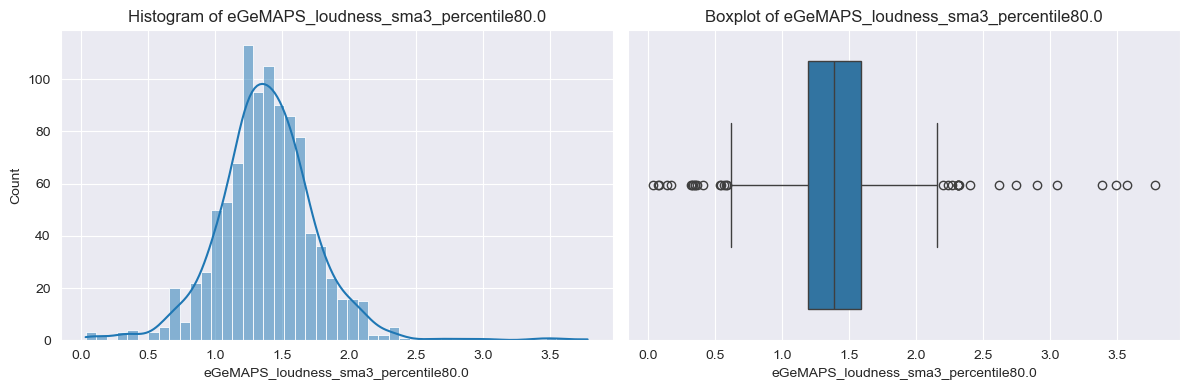

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_percentile80.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile80.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile80.0
16           90                              2.316471
32          115                              3.779090
38          127                              2.237206
48          138                              0.330338
51          141                              0.351400
64          158                              0.581904
113         224                              3.386560
142         264                              2.310780
237         389                              0.359665
252         407                              2.309460
260         420                              2.617987
275         438                              0.325990
277         441                              2.195559
286         451                      

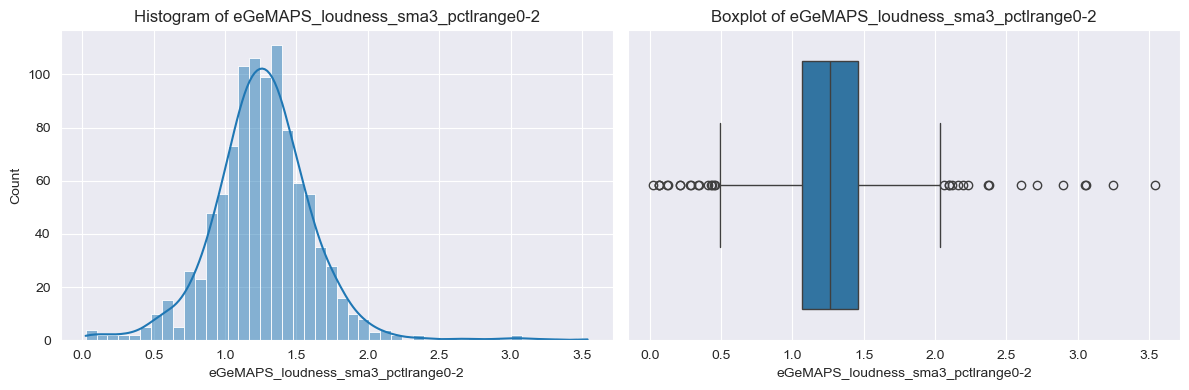

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_pctlrange0-2_distribution.png
outliers in 'eGeMAPS_loudness_sma3_pctlrange0-2': 
     Subject_ID  eGeMAPS_loudness_sma3_pctlrange0-2
16           90                            2.197047
32          115                            3.540408
38          127                            2.098828
48          138                            0.213403
51          141                            0.121557
88          197                            0.410860
113         224                            3.248858
142         264                            2.159348
237         389                            0.347788
252         407                            2.099240
260         420                            2.380038
275         438                            0.283736
277         441                            2.059817
286         451                            2.118480
298         469  

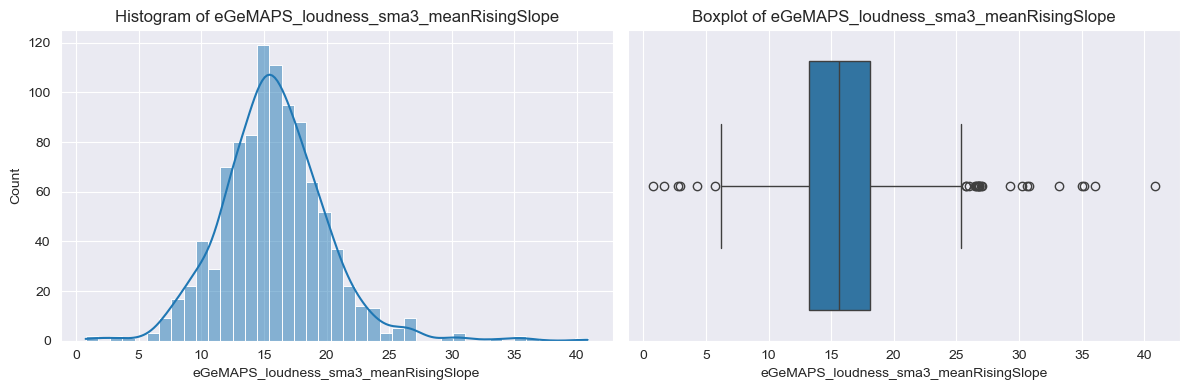

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_meanRisingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_meanRisingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_meanRisingSlope
28          109                              30.636555
32          115                              33.204212
38          127                              26.978802
48          138                               2.810483
78          183                              26.719660
113         224                              36.095467
126         243                              26.510014
220         369                              30.209671
260         420                              30.795988
275         438                               2.949759
277         441                              25.751822
298         469                               0.767735
304         477                              26.626759
338         516      

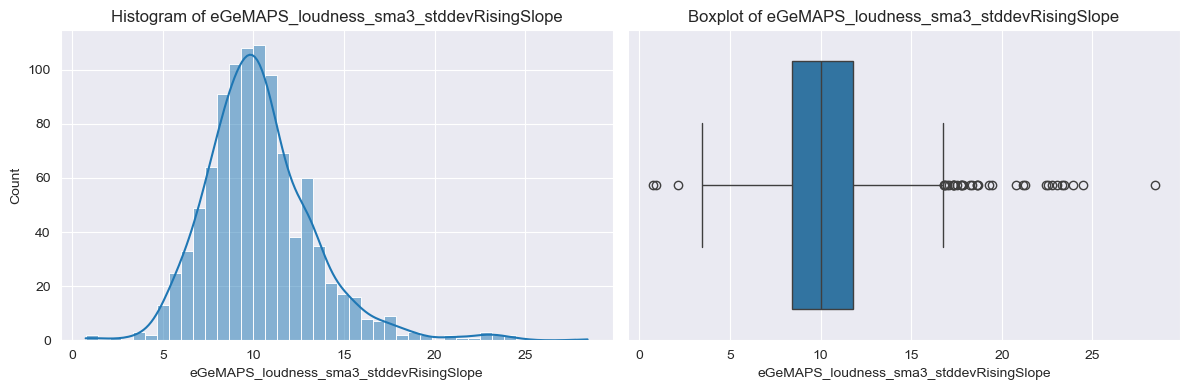

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_stddevRisingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevRisingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevRisingSlope
28          109                                24.472885
32          115                                18.263544
78          183                                17.846399
113         224                                22.419352
115         226                                16.946764
126         243                                16.793264
136         257                                17.076262
220         369                                23.939783
237         389                                28.445217
260         420                                17.820133
275         438                                 2.116431
278         443                                17.312300
298         469                               

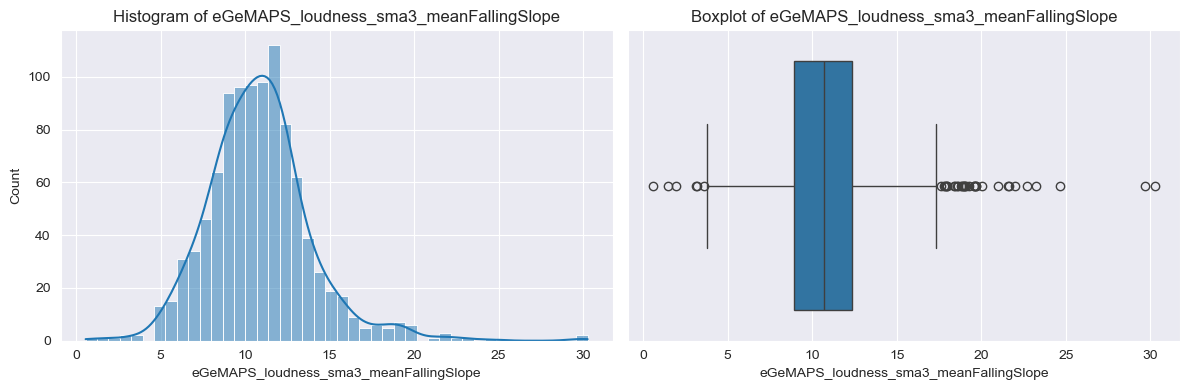

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_meanFallingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_meanFallingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_meanFallingSlope
6            54                               19.625383
12           85                               18.382078
28          109                               19.663595
32          115                               21.651926
38          127                               20.022463
48          138                                3.174012
78          183                               19.089411
105         214                               17.943300
113         224                               30.265390
142         264                               19.678490
237         389                               18.919479
260         420                               21.551746
275         438                                1.964355
277  

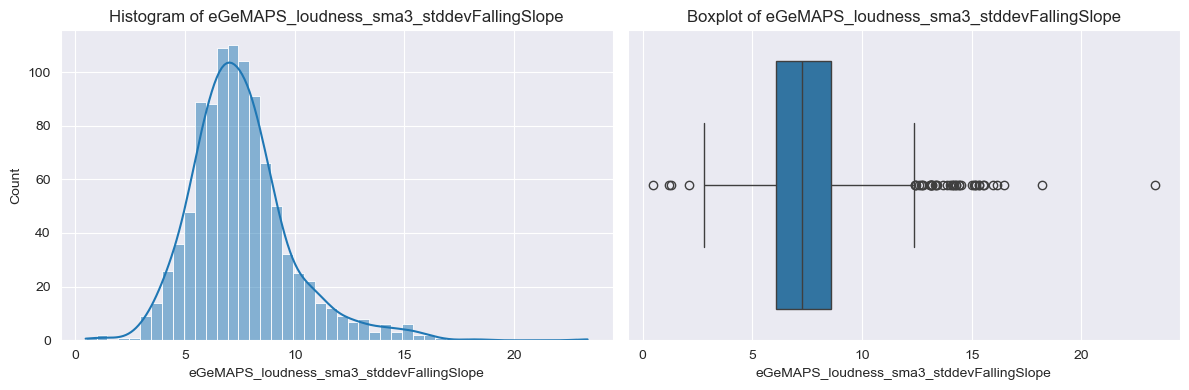

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudness_sma3_stddevFallingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevFallingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevFallingSlope
6            54                                 14.120662
28          109                                 13.887465
32          115                                 12.754430
38          127                                 12.409966
78          183                                 14.432686
88          197                                 13.342286
113         224                                 18.226358
130         249                                 12.672638
220         369                                 13.194267
237         389                                 23.350899
260         420                                 14.421929
275         438                                  1.285420
277         441                

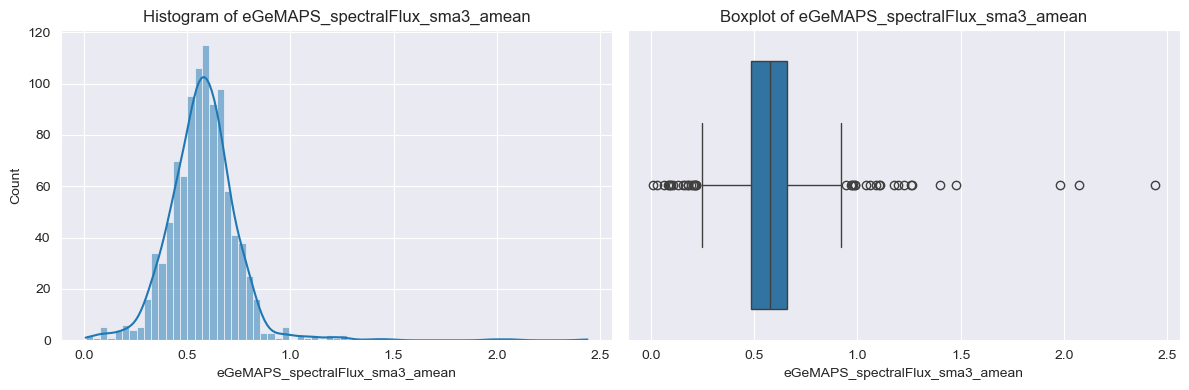

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_spectralFlux_sma3_amean_distribution.png
outliers in 'eGeMAPS_spectralFlux_sma3_amean': 
     Subject_ID  eGeMAPS_spectralFlux_sma3_amean
16           90                         1.225004
32          115                         1.475678
48          138                         0.089224
51          141                         0.157143
113         224                         1.979658
142         264                         1.102116
252         407                         0.988377
260         420                         1.090425
275         438                         0.065027
278         443                         0.976841
298         469                         0.032025
338         516                         0.009641
354         539                         0.974114
410         612                         1.263597
432         638                         0.206075
441         649    

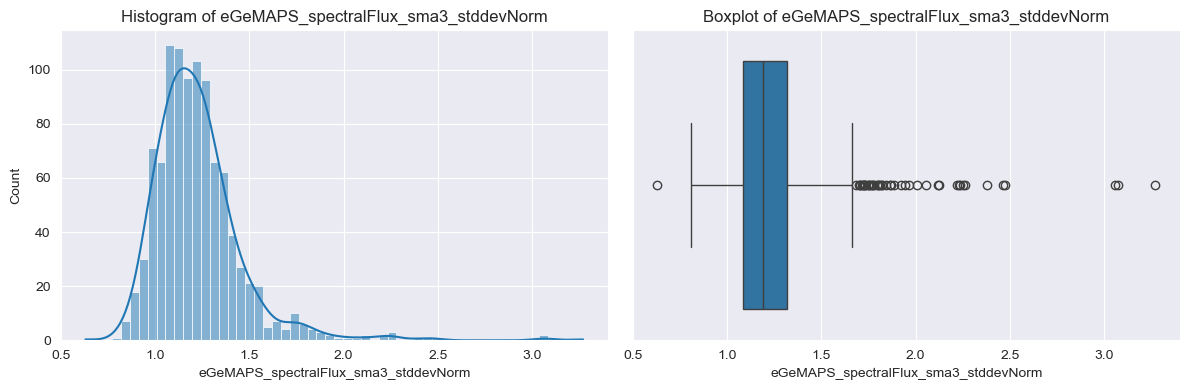

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_spectralFlux_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_spectralFlux_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_spectralFlux_sma3_stddevNorm
64          158                              2.126858
67          163                              1.811204
73          174                              1.793686
88          197                              1.774963
99          208                              1.755837
112         222                              1.777784
115         226                              1.824244
121         234                              1.719426
212         361                              1.963580
213         362                              1.684981
237         389                              3.270432
278         443                              1.824732
298         469                              0.631363
299         470                      

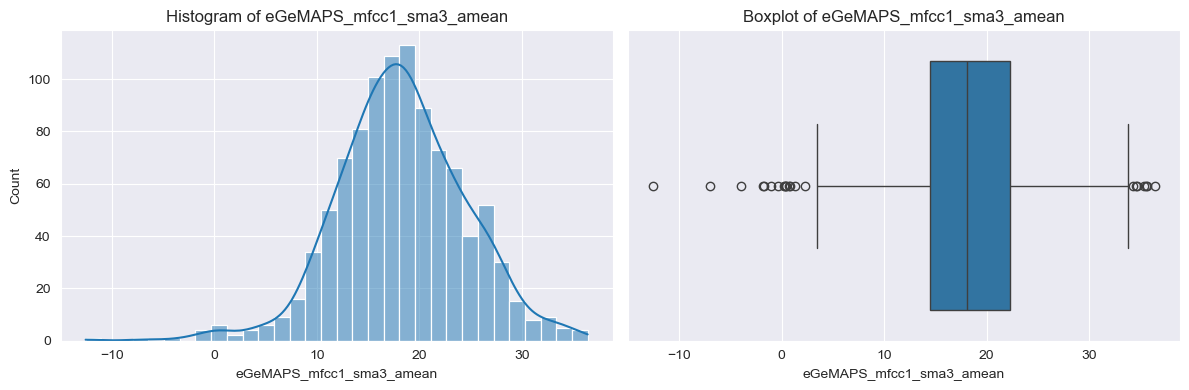

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc1_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc1_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc1_sma3_amean
6            54                  0.296394
26          105                  0.471447
27          107                  2.234528
28          109                 -1.815548
30          111                 35.579647
64          158                 35.399887
78          183                  0.439644
160         289                 34.292805
277         441                  0.744618
293         464                  0.270143
327         502                 34.623360
338         516                 -1.686731
346         530                 36.436878
357         543                 -7.001212
366         557                 34.648659
699         971                  0.805518
703         979                -12.571771
718        1000                 -3.980128
783        1074    

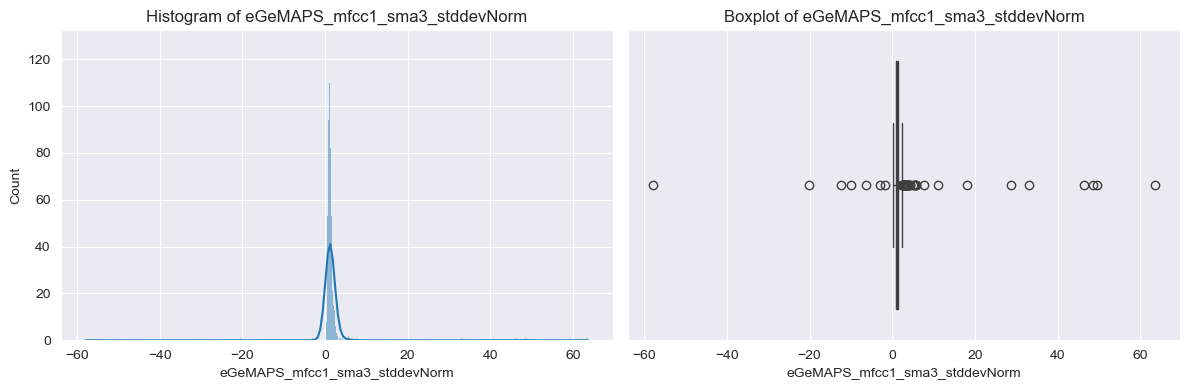

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc1_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc1_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc1_sma3_stddevNorm
6            54                      63.548008
12           85                       5.629888
19           93                       3.004898
26          105                      46.380608
27          107                      11.133861
28          109                     -12.365348
32          115                       2.781403
73          174                       2.564363
78          183                      49.579315
79          184                       4.931318
126         243                       7.602392
196         341                       3.890117
214         363                       2.690614
220         369                       5.463289
221         371                       2.574507
225         375                       2.477185
226     

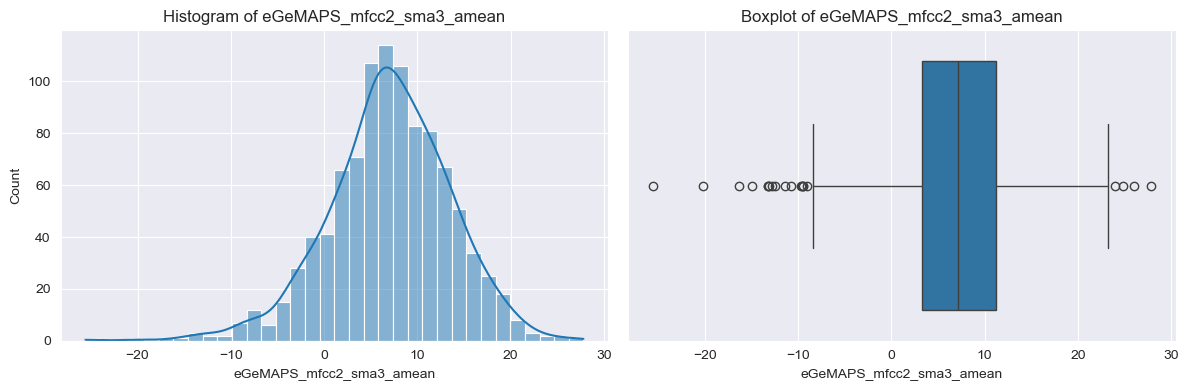

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc2_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc2_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc2_sma3_amean
24          103                -13.253355
191         335                 -9.682059
290         461                 23.926708
293         464                -12.429227
331         506                 -9.530048
366         557                -20.236130
467         677                -16.281055
492         708                 -9.470501
533         762                -10.726024
544         773                -13.096326
623         873                 -9.074645
625         875                -12.742715
634         890                 27.794102
659         920                -11.346389
744        1026                 26.054783
770        1058                -13.225383
785        1079                 -9.427633
801        1100                 24.877495
963        1319    

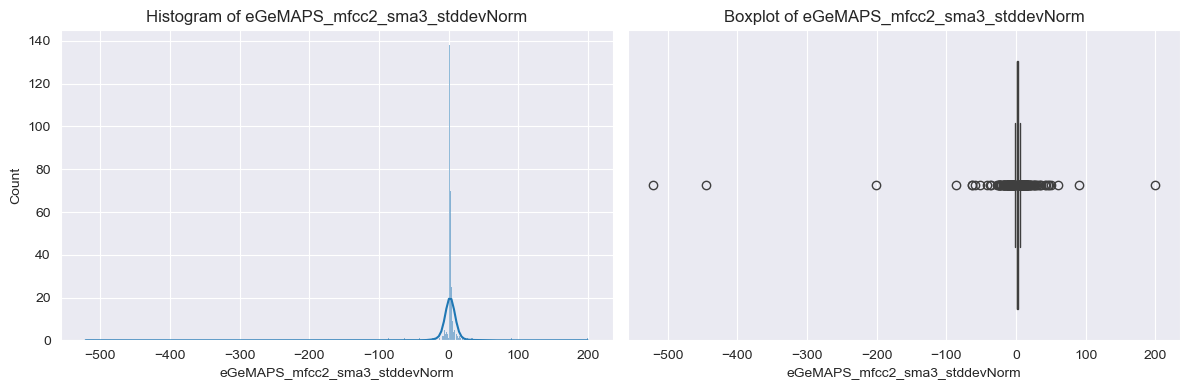

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc2_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc2_sma3_stddevNorm': 
      Subject_ID  eGeMAPS_mfcc2_sma3_stddevNorm
2             44                      -4.350368
5             50                      27.081842
6             54                     -58.426144
28           109                      -5.909558
32           115                      18.062250
...          ...                            ...
960         1316                       8.390603
985         1351                       6.373491
987         1354                      -3.639510
996         1363                      -2.049880
1001        1370                      -4.177766

[226 rows x 2 columns]



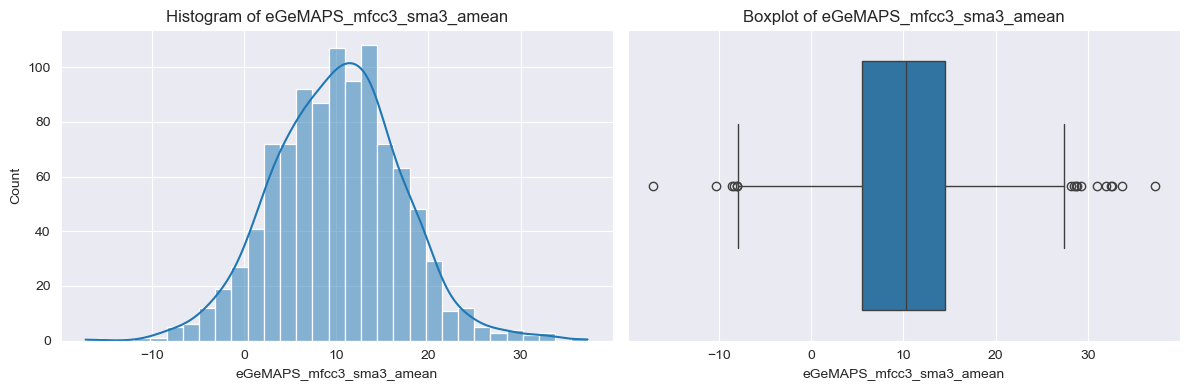

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc3_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc3_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc3_sma3_amean
8            59                 28.870384
24          103                 29.247902
26          105                 31.960871
136         257                 32.634838
212         361                 -8.316359
331         506                 33.691929
347         532                 28.756029
441         649                -17.166439
453         663                 32.470783
568         801                 -8.025456
612         857                 28.522514
624         874                 37.274780
668         932                -10.310634
685         954                 28.187550
836        1148                 -8.003994
965        1322                 31.027615
982        1348                 -8.597703



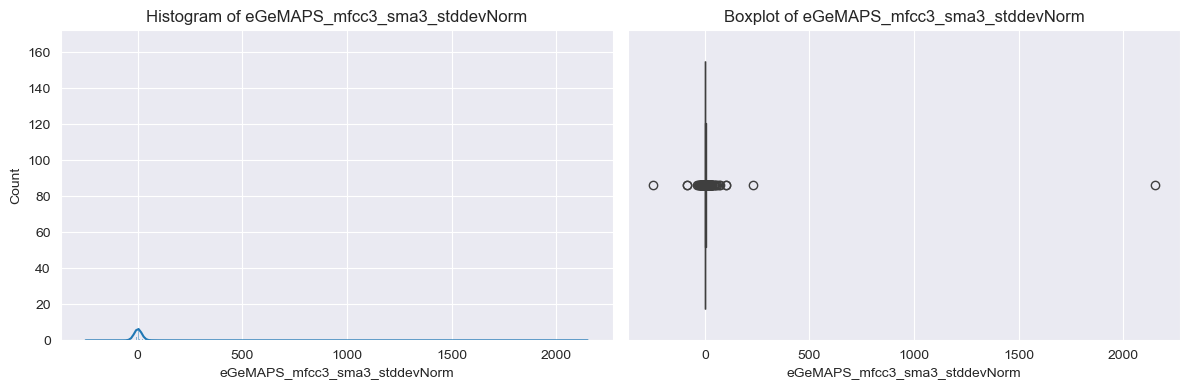

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc3_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc3_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc3_sma3_stddevNorm
16           90                     -16.624538
25          104                       7.380119
32          115                       5.691036
34          120                      27.212368
36          123                      31.987661
..          ...                            ...
978        1341                      -6.302109
982        1348                      -2.525667
983        1349                      -9.091808
984        1350                      15.342614
996        1363                      -5.010046

[177 rows x 2 columns]



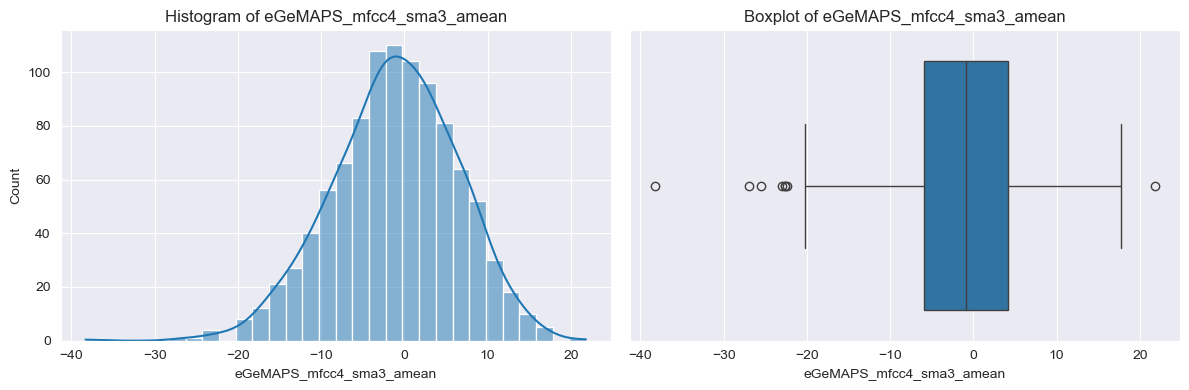

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc4_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc4_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc4_sma3_amean
185         326                -22.594395
240         393                 21.807888
245         399                -22.928514
293         464                -25.511847
595         838                -22.680859
657         918                -26.916023
824        1133                -38.294849
930        1277                -22.329863



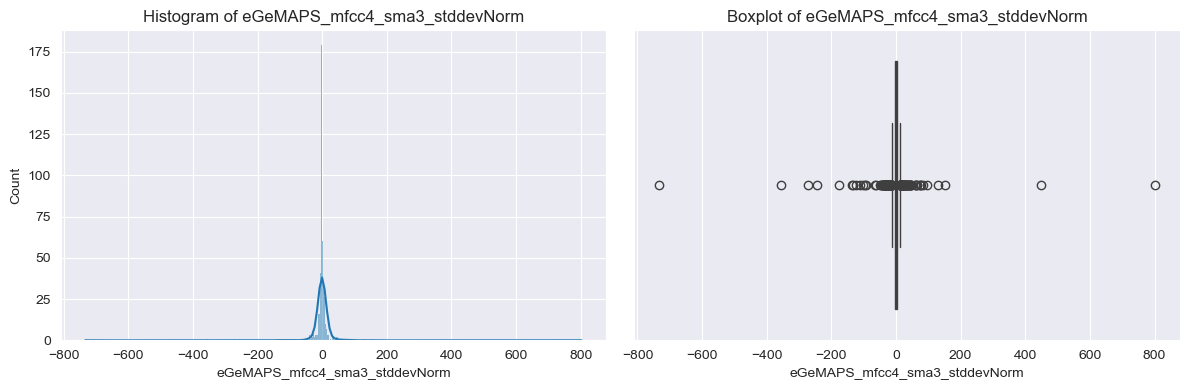

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc4_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc4_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc4_sma3_stddevNorm
4            49                      20.140690
5            50                      24.554193
13           86                      33.136909
28          109                     -24.595737
32          115                      32.586166
..          ...                            ...
952        1308                      45.291885
961        1317                     -49.102951
972        1331                     -31.194347
990        1357                     -13.769827
997        1365                      15.280156

[127 rows x 2 columns]



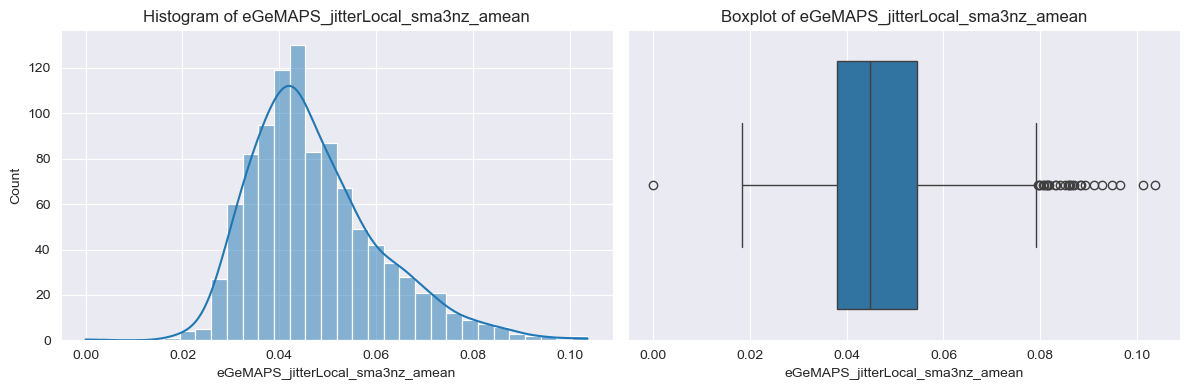

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_jitterLocal_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_jitterLocal_sma3nz_amean': 
     Subject_ID  eGeMAPS_jitterLocal_sma3nz_amean
24          103                          0.092659
41          130                          0.091173
52          142                          0.086863
77          179                          0.085649
92          201                          0.086144
157         283                          0.081837
160         289                          0.081483
250         404                          0.079726
325         500                          0.080647
327         502                          0.089155
338         516                          0.000000
367         558                          0.079569
430         636                          0.083109
433         640                          0.094848
449         659                          0.081545
5

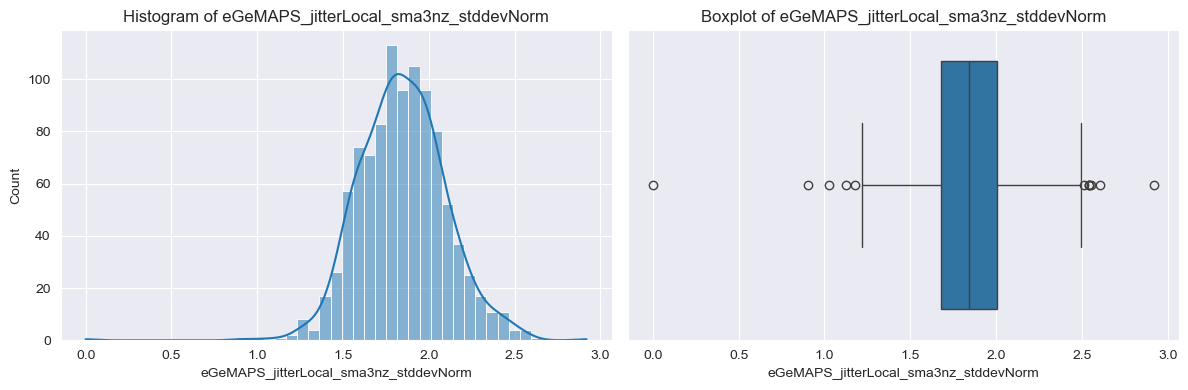

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_jitterLocal_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_jitterLocal_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_jitterLocal_sma3nz_stddevNorm
20           97                               2.539255
28          109                               1.123953
48          138                               1.029381
65          160                               2.511657
298         469                               0.903817
338         516                               0.000000
431         637                               2.539500
696         968                               2.919360
703         979                               1.180655
744        1026                               2.541039
854        1176                               2.555917
994        1361                               2.606722



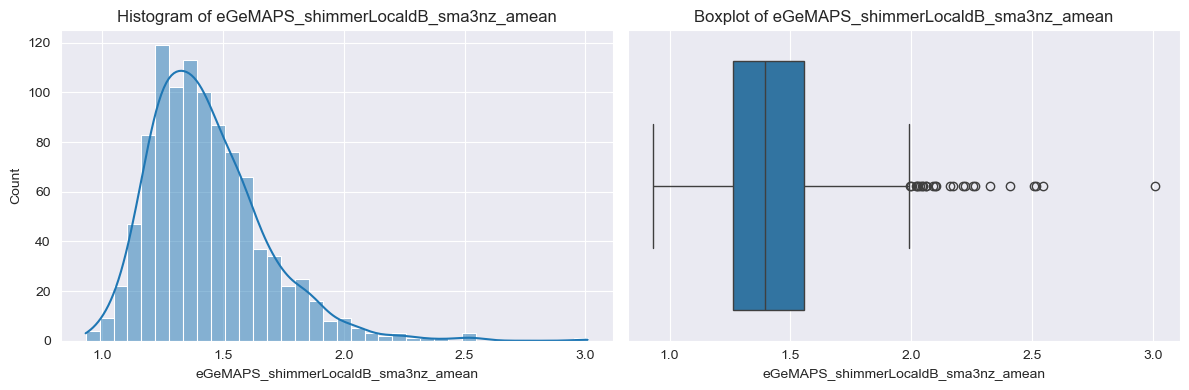

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_shimmerLocaldB_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_shimmerLocaldB_sma3nz_amean': 
     Subject_ID  eGeMAPS_shimmerLocaldB_sma3nz_amean
5            50                             2.101271
24          103                             2.099904
41          130                             2.326465
77          179                             2.266250
105         214                             2.027315
237         389                             2.216624
274         437                             2.090201
338         516                             3.009204
370         562                             2.060642
430         636                             2.411061
552         781                             2.061194
577         814                             2.257048
661         922                             2.025604
677         944                             2.160879


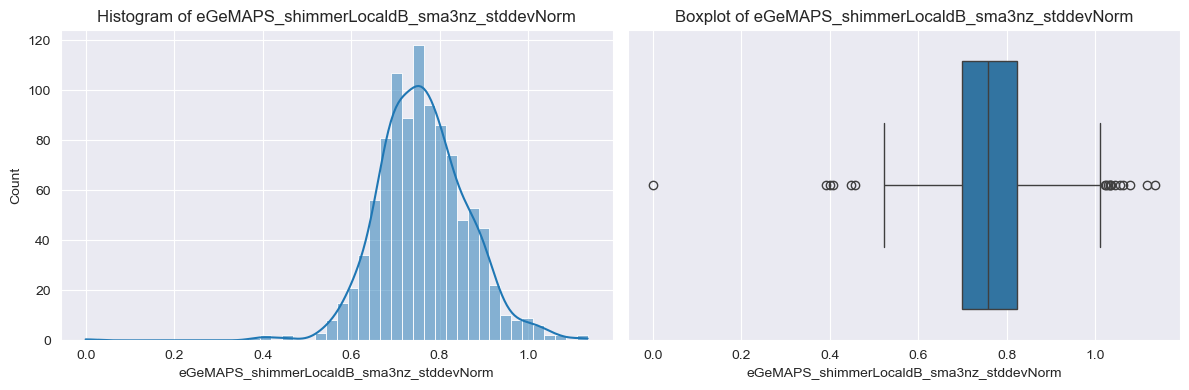

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm
21           99                                  1.044639
32          115                                  1.033898
48          138                                  0.390881
61          153                                  1.021881
77          179                                  0.456342
280         445                                  1.033003
293         464                                  0.447321
298         469                                  0.400792
329         504                                  1.025213
338         516                                  0.000000
497         714                                  1.063062
507         728                                  1.078463
569         802                

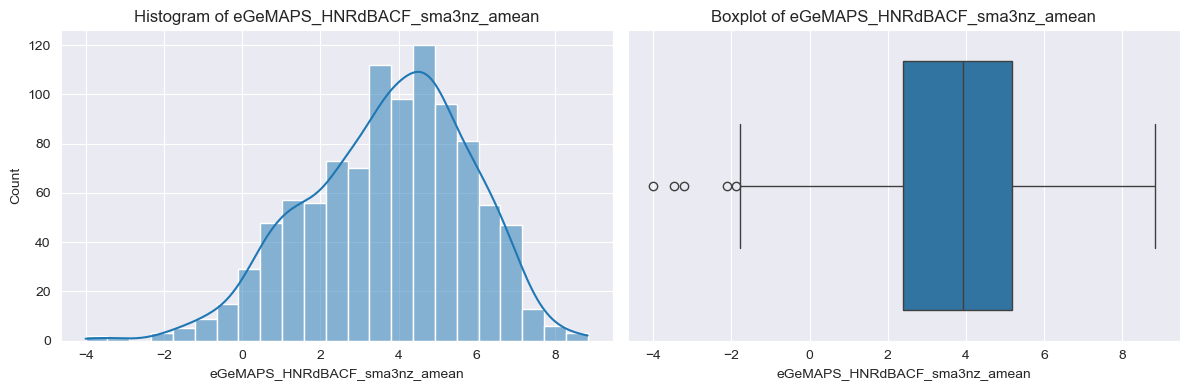

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_HNRdBACF_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_HNRdBACF_sma3nz_amean': 
     Subject_ID  eGeMAPS_HNRdBACF_sma3nz_amean
28          109                      -1.892277
430         636                      -3.480454
703         979                      -3.216541
787        1082                      -4.009131
850        1170                      -2.105268



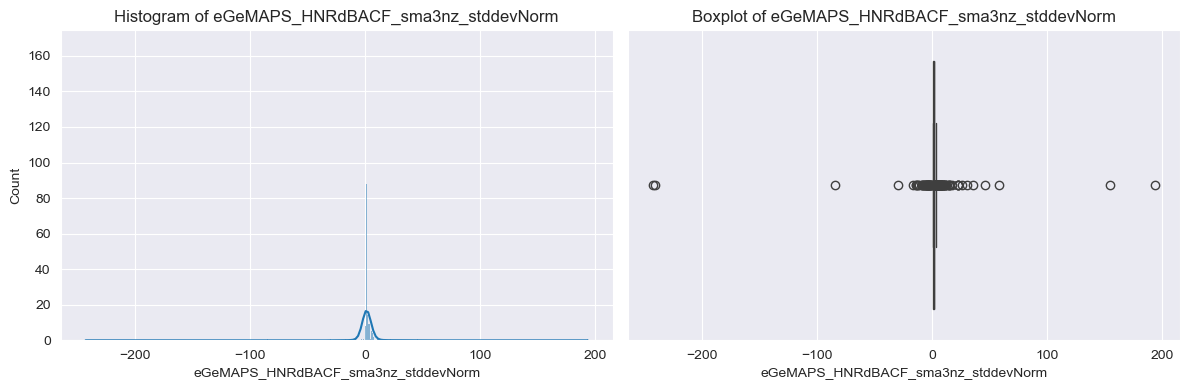

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_HNRdBACF_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_HNRdBACF_sma3nz_stddevNorm': 
      Subject_ID  eGeMAPS_HNRdBACF_sma3nz_stddevNorm
2             44                            5.435767
5             50                           -6.899863
8             59                            3.902462
17            91                            7.464857
19            93                            3.446228
...          ...                                 ...
961         1317                            3.857454
971         1330                            9.851886
973         1332                            7.472625
996         1363                          -29.816654
1001        1370                            6.666798

[166 rows x 2 columns]



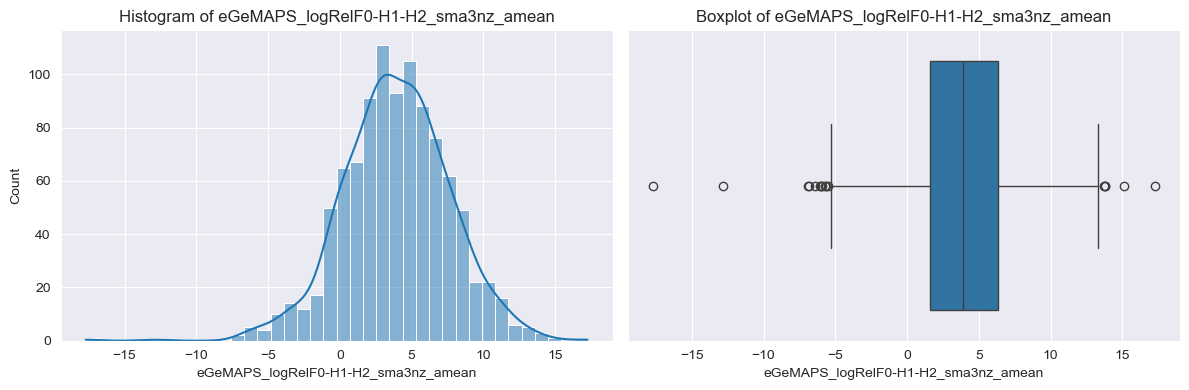

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_logRelF0-H1-H2_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-H2_sma3nz_amean': 
     Subject_ID  eGeMAPS_logRelF0-H1-H2_sma3nz_amean
31          112                            17.260689
65          160                            13.812266
66          162                            -6.800708
116         228                            -6.415468
266         428                            15.141929
311         485                            13.695570
370         562                            -6.078574
395         593                            -5.752693
545         774                            -5.484289
571         805                            -6.874056
584         824                            -5.645216
742        1024                           -17.707893
847        1167                            -5.955241
850        1170                           -12.830483


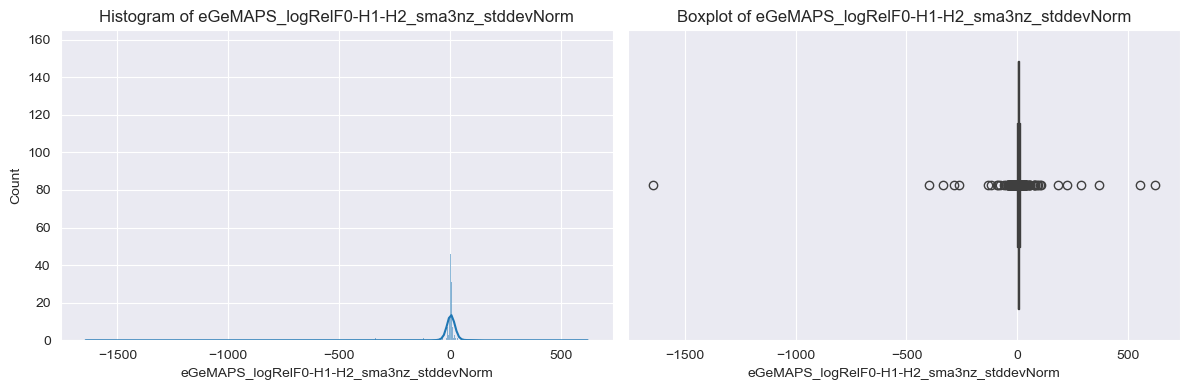

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm
0            41                                -10.412514
8            59                                -32.355011
18           92                                -15.710466
24          103                                 25.161184
25          104                                -43.084007
..          ...                                       ...
959        1315                                 -6.492393
972        1331                                -28.083899
983        1349                                 10.010789
984        1350                                 16.994511
996        1363                               -134.634811

[220 rows x 2 columns]



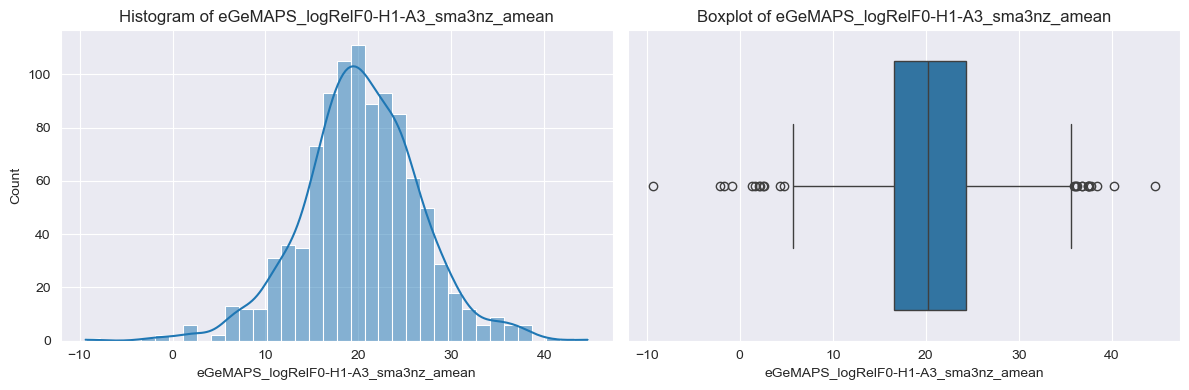

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_logRelF0-H1-A3_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-A3_sma3nz_amean': 
     Subject_ID  eGeMAPS_logRelF0-H1-A3_sma3nz_amean
26          105                            -1.643922
28          109                             2.116005
64          158                            44.649761
65          160                            36.122856
77          179                             4.795053
174         306                            36.044666
191         335                            -0.784608
227         377                            37.787945
274         437                            36.858646
293         464                             1.353354
357         543                             1.669978
396         594                            36.852718
403         604                            36.225201
412         614                            37.451385


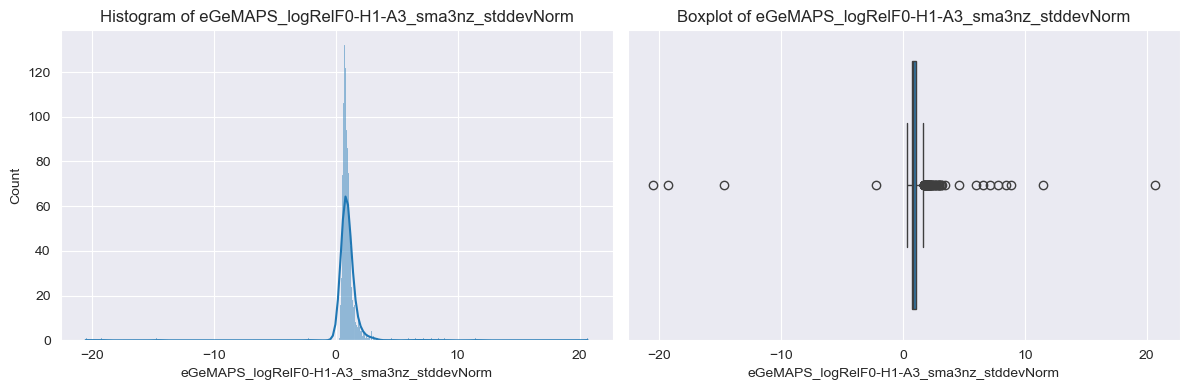

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm
5            50                                  1.884910
26          105                                -14.663637
28          109                                  8.888714
38          127                                  1.729700
77          179                                  5.996744
..          ...                                       ...
959        1315                                  2.847305
963        1319                                  1.894445
964        1320                                  1.818663
973        1332                                  2.675177
996        1363                                  6.528613

[76 rows x 2 columns]



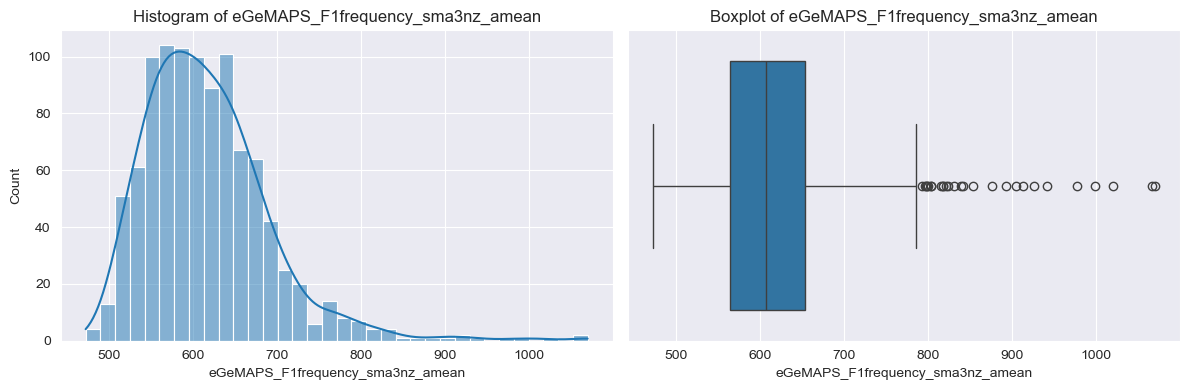

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1frequency_sma3nz_amean
26          105                       1066.689331
28          109                       1020.153137
32          115                        814.842529
43          133                        803.863647
77          179                        875.565063
191         335                        821.556763
208         357                        817.539734
277         441                        795.668579
293         464                        977.509216
338         516                        925.829712
357         543                        798.832092
420         623                        824.049500
425         628                        797.230408
430         636                        941.945129
467         677                        905.024109
5

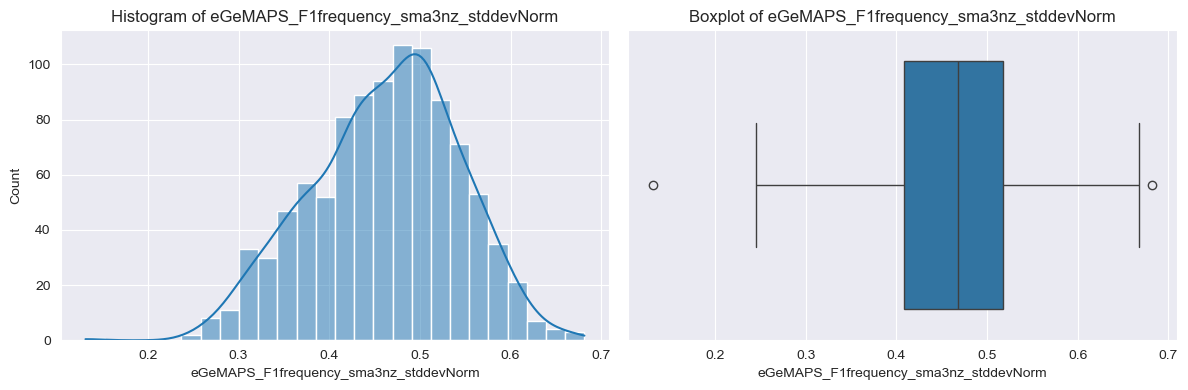

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1frequency_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F1frequency_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F1frequency_sma3nz_stddevNorm
338         516                               0.131236
923        1266                               0.681511



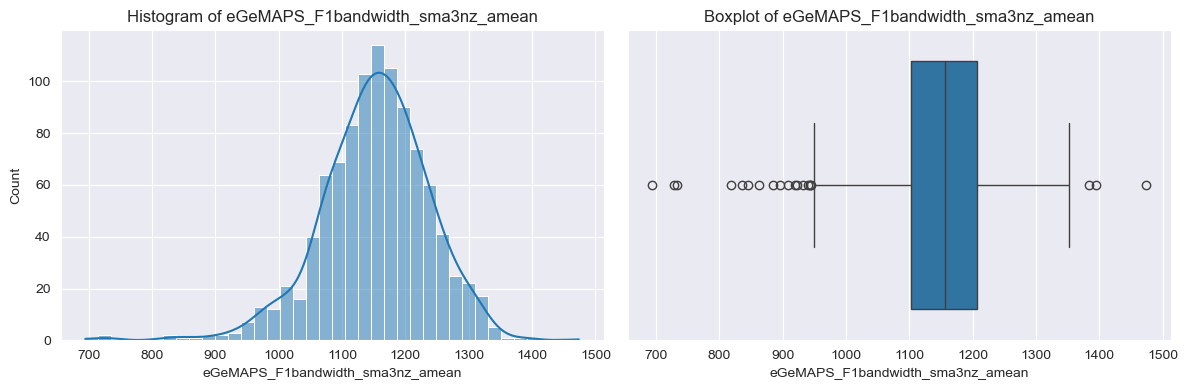

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1bandwidth_sma3nz_amean
6            54                        943.517822
12           85                        944.654175
26          105                        907.949219
27          107                        931.779541
28          109                        819.182556
199         344                       1473.808105
277         441                        896.567017
293         464                        728.417847
338         516                        732.713501
357         543                        835.573303
430         636                        885.018616
568         801                       1393.909180
703         979                        694.506287
718        1000                        919.966125
731        1013                        943.605408
8

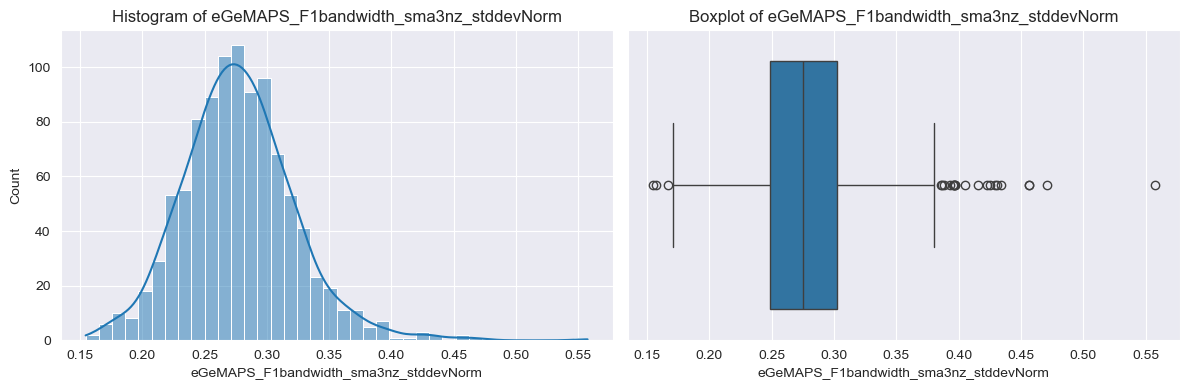

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F1bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F1bandwidth_sma3nz_stddevNorm
26          105                               0.396153
28          109                               0.431135
38          127                               0.433584
77          179                               0.395752
191         335                               0.422519
199         344                               0.157039
277         441                               0.393191
293         464                               0.456084
329         504                               0.166844
338         516                               0.415197
357         543                               0.429145
420         623                               0.405115
516         741                               0.397314
703         979      

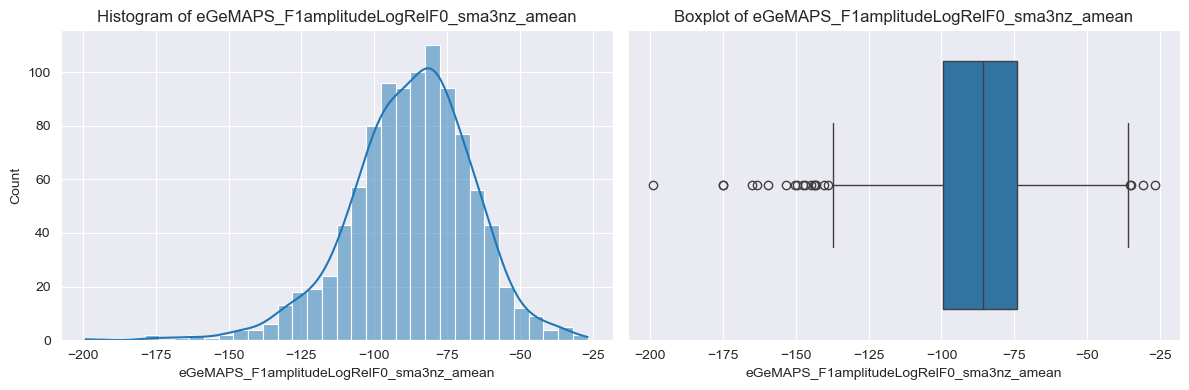

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean
48          138                               -146.917480
51          141                               -175.025879
102         211                                -30.722187
212         361                               -143.282715
237         389                               -153.456146
298         469                               -159.566620
324         499                               -140.372955
326         501                               -143.585022
327         502                                -35.264862
332         507                               -139.080154
338         516                               -199.056351
621         871                               -143.037537
637         893                

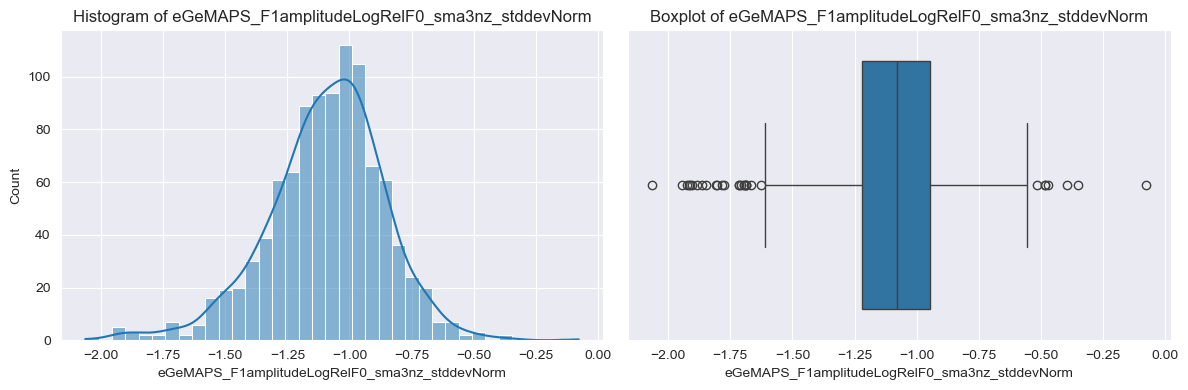

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm
34          120                                      -1.866060
51          141                                      -0.352598
68          165                                      -1.925102
102         211                                      -1.627170
178         315                                      -1.688589
186         327                                      -1.775257
195         339                                      -1.806839
237         389                                      -0.514894
298         469                                      -0.470188
301         472                                      -1.805443
316         491                                      -1.687707
327         502    

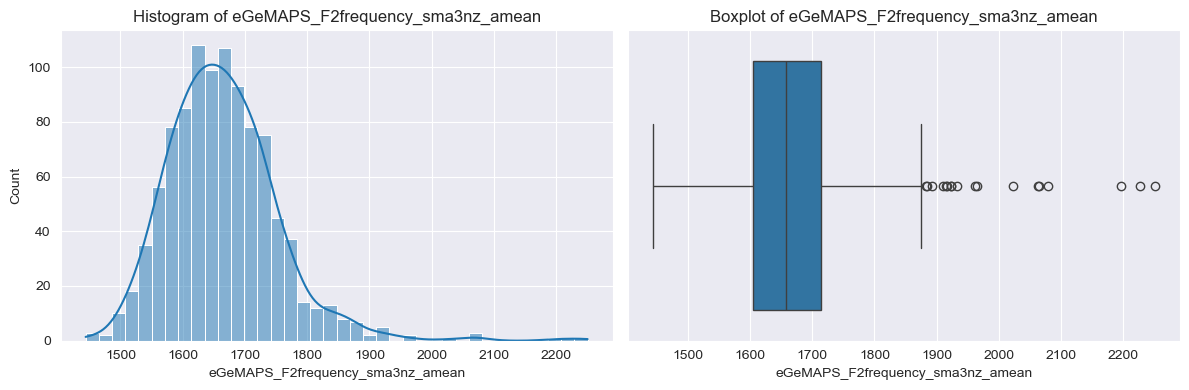

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2frequency_sma3nz_amean
26          105                       2195.989502
28          109                       2078.125244
185         326                       1917.206055
293         464                       2064.813232
338         516                       2250.544922
357         543                       1914.254761
420         623                       1891.642578
430         636                       2022.054443
453         663                       1910.508667
467         677                       1932.041260
516         741                       1961.524902
606         851                       1963.970215
684         953                       1884.479980
703         979                       2225.878906
731        1013                       1922.549072
7

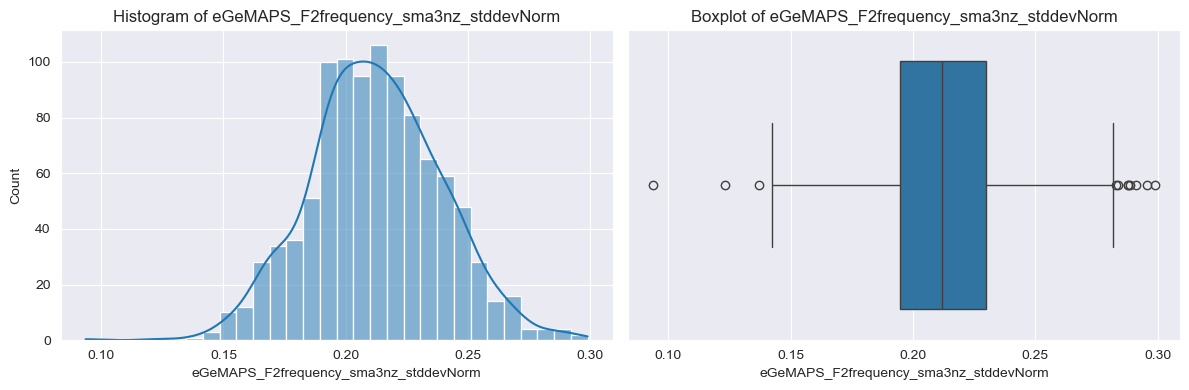

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2frequency_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2frequency_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2frequency_sma3nz_stddevNorm
79          184                               0.295738
92          201                               0.287793
104         213                               0.298920
116         228                               0.282835
338         516                               0.093633
465         675                               0.291017
500         720                               0.288886
750        1036                               0.123005
767        1055                               0.136944
804        1104                               0.283955
909        1245                               0.287871



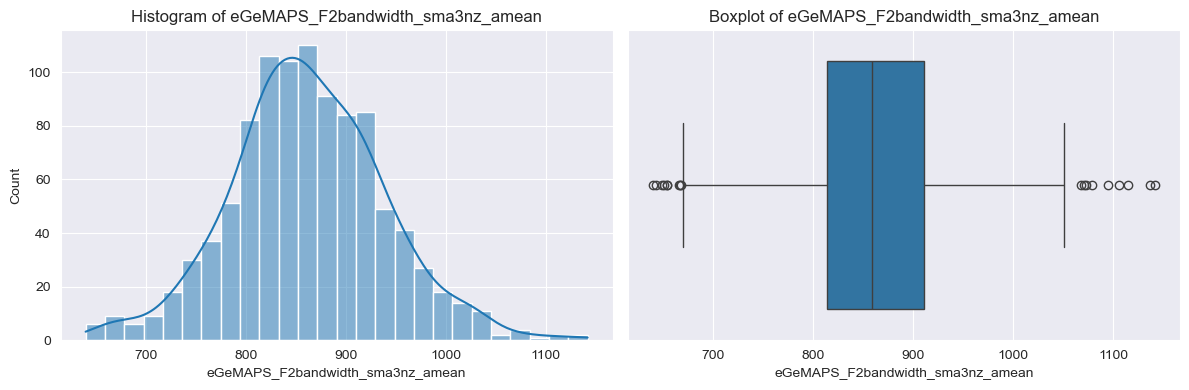

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2bandwidth_sma3nz_amean
12           85                        667.914612
27          107                        650.344421
43          133                       1141.806763
88          197                       1106.159912
130         249                        643.182800
178         315                       1078.595825
199         344                       1115.304932
293         464                        649.155884
445         653                       1070.582520
453         663                        653.804932
474         684                        653.726196
568         801                       1136.466064
612         857                        665.627258
649         909                        666.368530
922        1264                       1094.916626
9

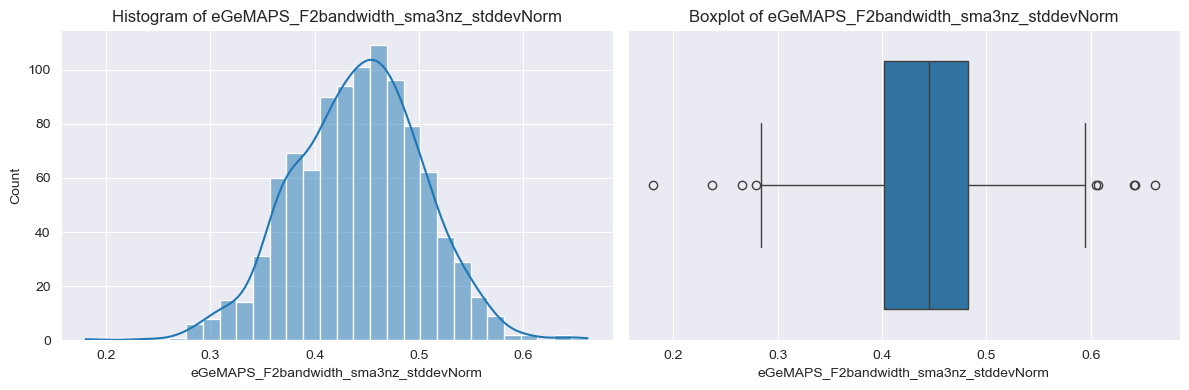

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2bandwidth_sma3nz_stddevNorm
88          197                               0.236862
207         356                               0.605529
241         394                               0.607366
338         516                               0.180327
351         536                               0.279458
453         663                               0.661615
544         773                               0.265760
703         979                               0.641146
975        1336                               0.642306



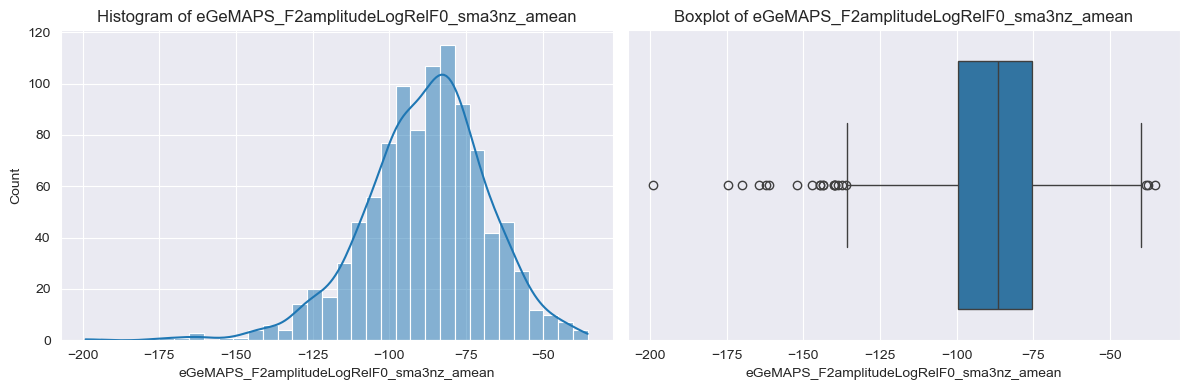

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean
51          141                               -170.128662
67          163                               -139.761322
102         211                                -38.323811
237         389                               -152.119049
298         469                               -161.169937
324         499                               -139.565430
326         501                               -143.648376
329         504                               -137.490265
332         507                               -139.858826
338         516                               -199.063492
620         868                                -37.648491
621         871                               -139.913147
637         893                

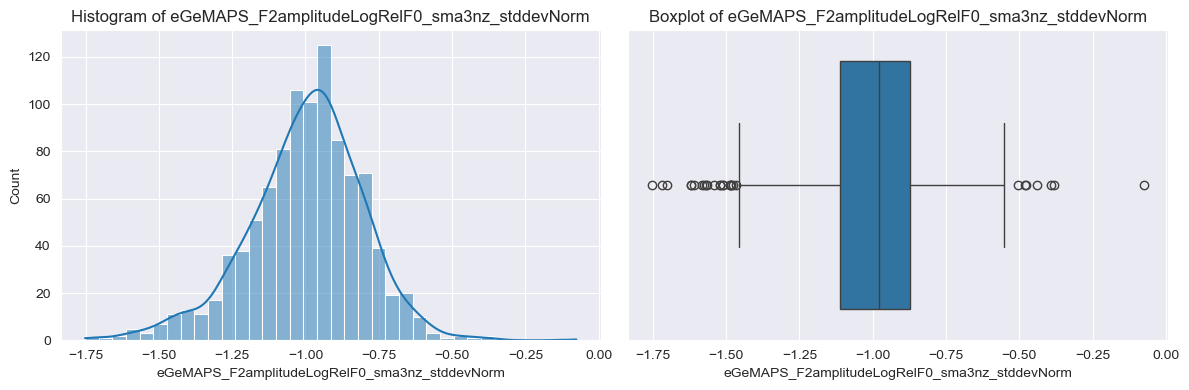

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm
24          103                                      -1.508923
34          120                                      -1.478025
38          127                                      -1.522325
51          141                                      -0.380327
68          165                                      -1.519331
105         214                                      -1.539707
186         327                                      -1.486410
237         389                                      -0.504487
281         446                                      -1.486506
293         464                                      -1.719382
298         469                                      -0.441334
301         472    

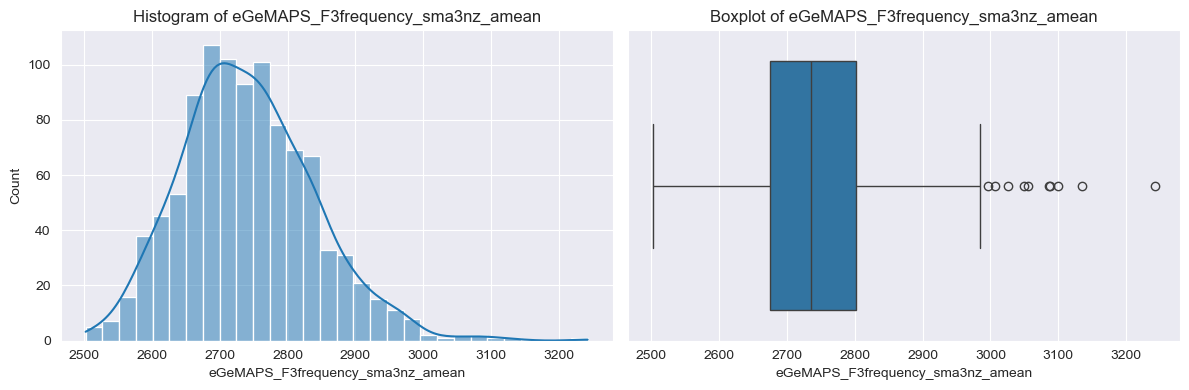

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3frequency_sma3nz_amean
26          105                       3134.587891
28          109                       3087.643799
174         306                       2996.905762
241         394                       3048.868164
293         464                       3099.000000
338         516                       3086.737305
357         543                       3006.136230
430         636                       3026.341553
703         979                       3242.627197
857        1180                       3054.880859



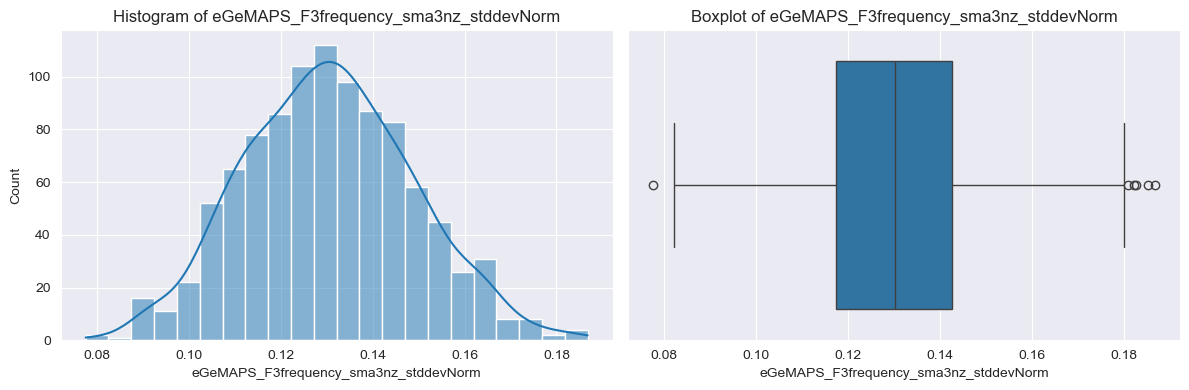

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3frequency_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3frequency_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3frequency_sma3nz_stddevNorm
18           92                               0.186783
329         504                               0.182333
434         641                               0.180943
629         884                               0.182777
846        1166                               0.185345
898        1232                               0.077588



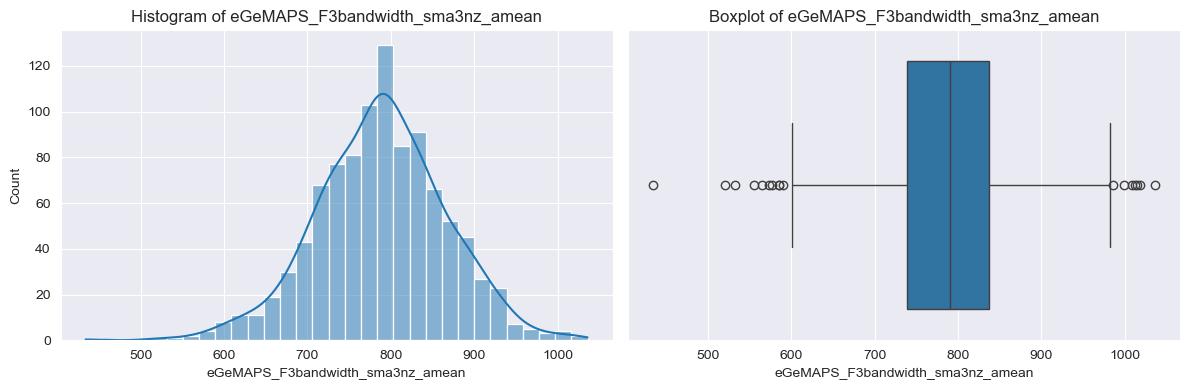

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3bandwidth_sma3nz_amean
43          133                       1017.829651
64          158                       1008.887451
72          173                        520.017151
88          197                       1035.949951
126         243                        585.844788
178         315                       1014.345398
220         369                        564.515381
277         441                        576.742676
318         493                        573.103333
332         507                       1012.404663
338         516                        434.125793
384         582                        555.630249
568         801                        998.423096
612         857                        532.224365
665         928                        590.431396
8

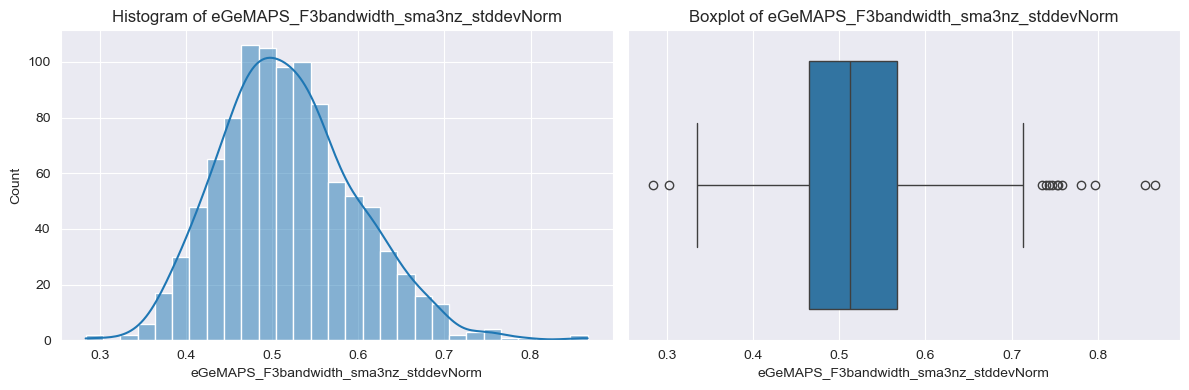

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3bandwidth_sma3nz_stddevNorm
0            41                               0.746682
6            54                               0.739567
13           86                               0.753685
72          173                               0.752789
88          197                               0.283649
101         210                               0.758615
207         356                               0.743346
215         364                               0.796254
338         516                               0.866299
384         582                               0.855373
621         871                               0.780227
763        1051                               0.735824
819        1125                               0.302387



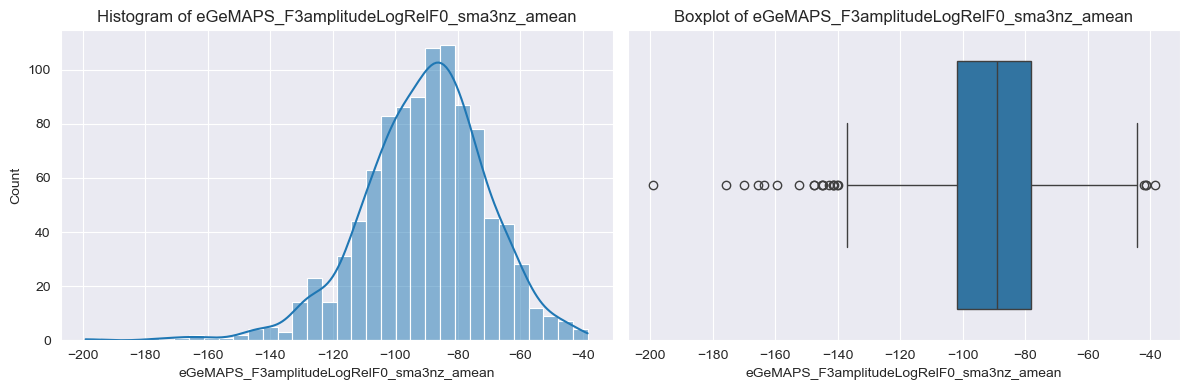

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean
51          141                               -169.953094
67          163                               -141.072922
102         211                                -41.426697
237         389                               -152.325851
293         464                                -38.507496
298         469                               -159.485123
324         499                               -139.956604
326         501                               -145.137268
329         504                               -141.536896
332         507                               -142.736099
338         516                               -199.078430
620         868                                -42.082684
621         871                

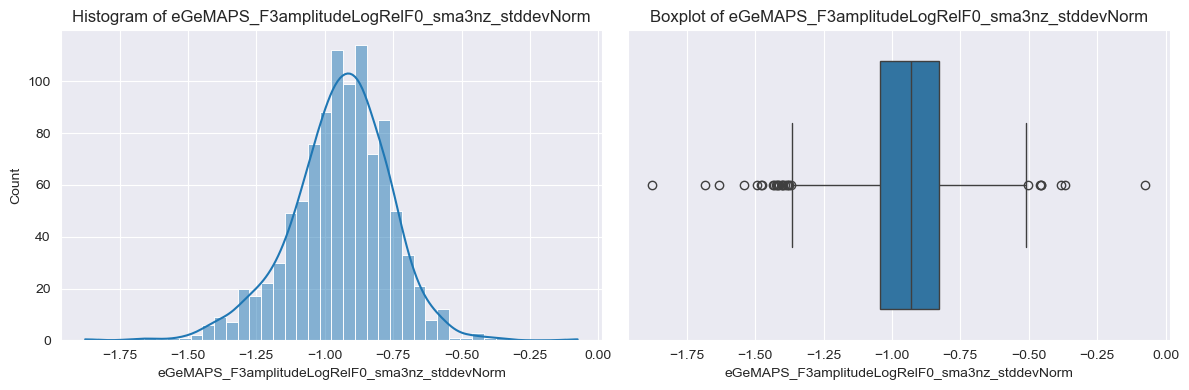

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm
24          103                                      -1.401405
38          127                                      -1.477542
51          141                                      -0.382061
68          165                                      -1.380141
92          201                                      -1.429981
105         214                                      -1.383453
186         327                                      -1.401827
237         389                                      -0.501423
293         464                                      -1.875676
298         469                                      -0.453902
338         516                                      -0.075278
344         526    

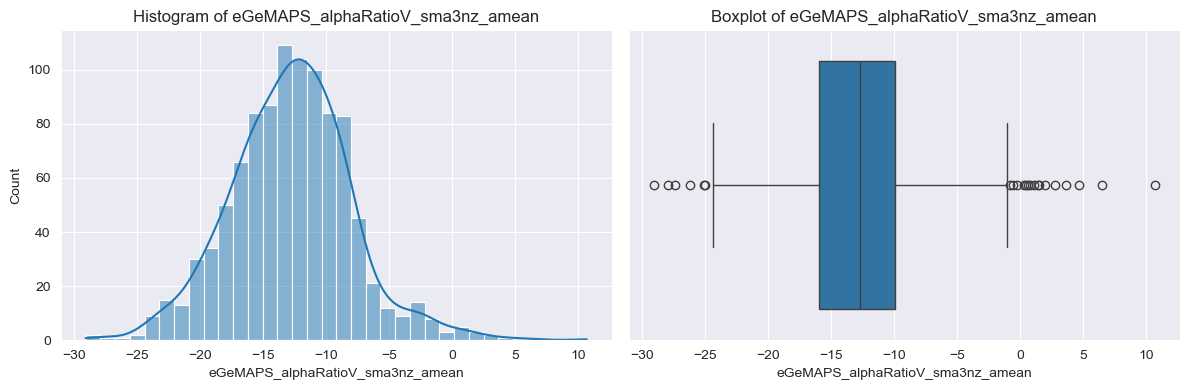

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_alphaRatioV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_alphaRatioV_sma3nz_amean': 
     Subject_ID  eGeMAPS_alphaRatioV_sma3nz_amean
26          105                          1.996983
28          109                          6.477788
64          158                        -27.378252
77          179                          0.279009
191         335                          0.509982
227         377                        -26.223782
274         437                        -29.072258
293         464                          4.654025
357         543                          3.674831
412         614                        -25.043879
416         619                         -0.542077
634         890                        -27.946081
703         979                         10.700480
718        1000                         -0.208648
742        1024                        -25.025724
7

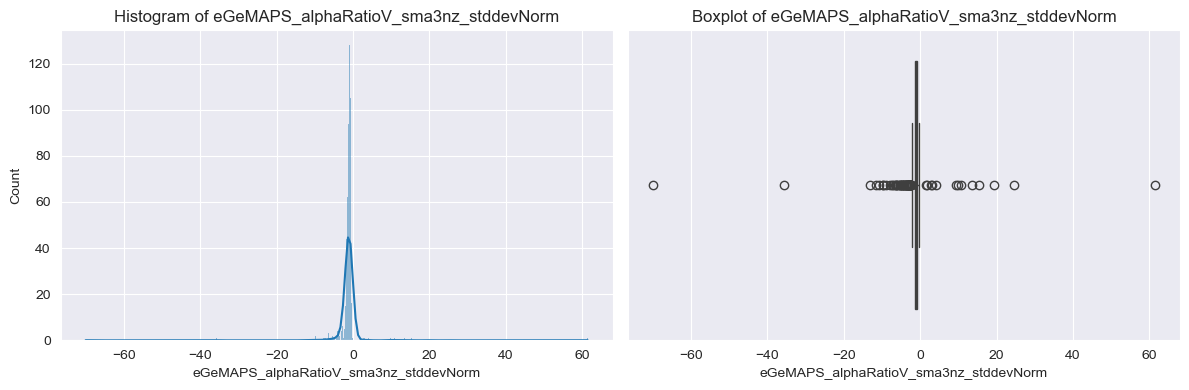

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_alphaRatioV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_alphaRatioV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_alphaRatioV_sma3nz_stddevNorm
5            50                              -2.397623
6            54                              -4.873344
12           85                              -3.822063
24          103                              -2.932946
26          105                               9.334468
..          ...                                    ...
960        1316                              -6.448507
963        1319                              15.395478
964        1320                              -6.101916
973        1332                               9.912547
996        1363                              -9.852831

[75 rows x 2 columns]



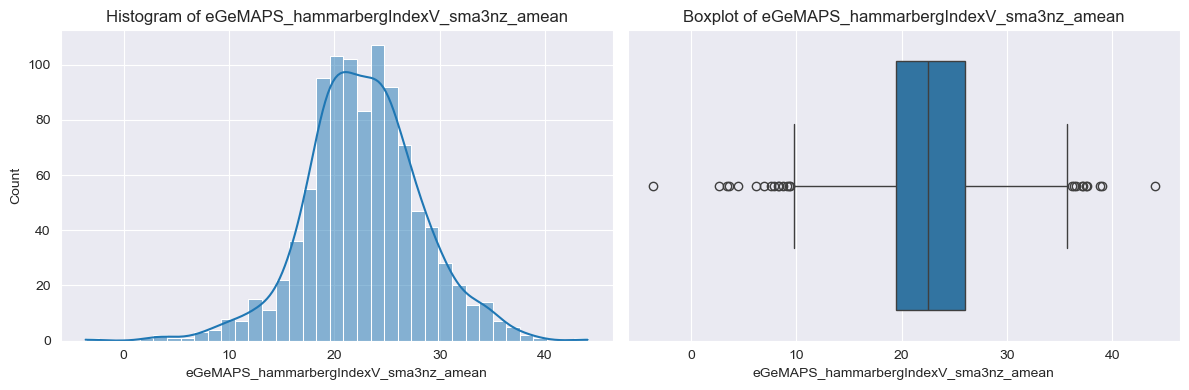

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_hammarbergIndexV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_hammarbergIndexV_sma3nz_amean': 
     Subject_ID  eGeMAPS_hammarbergIndexV_sma3nz_amean
26          105                               3.617530
28          109                               3.409713
64          158                              44.053730
78          183                               9.392189
160         289                              36.560074
174         306                              37.527683
274         437                              39.045971
293         464                               2.695961
338         516                               8.751919
357         543                               4.511493
453         663                               9.315035
634         890                              38.834679
639         895                              37.614281
668         932      

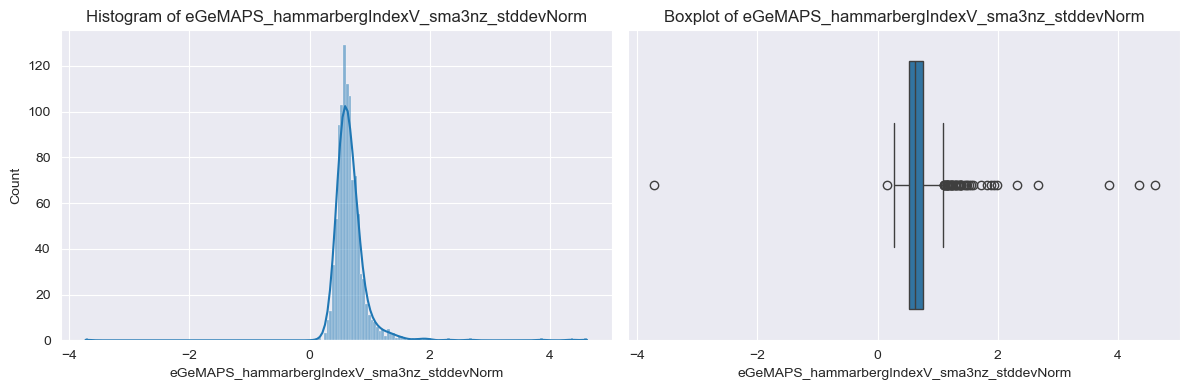

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm
6            54                                    1.108499
26          105                                    4.612053
28          109                                    3.850867
38          127                                    1.299799
77          179                                    1.547329
78          183                                    1.489120
79          184                                    1.242015
126         243                                    1.168858
185         326                                    1.259572
189         330                                    1.300562
191         335                                    1.294123
277         441                                    1.379423
2

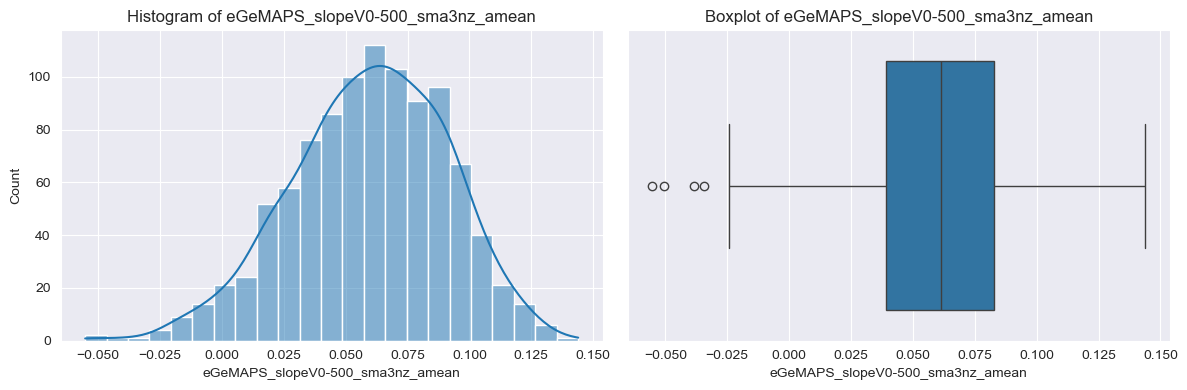

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeV0-500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeV0-500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeV0-500_sma3nz_amean
352         537                         -0.050441
422         625                         -0.038294
643         901                         -0.034276
742        1024                         -0.055191



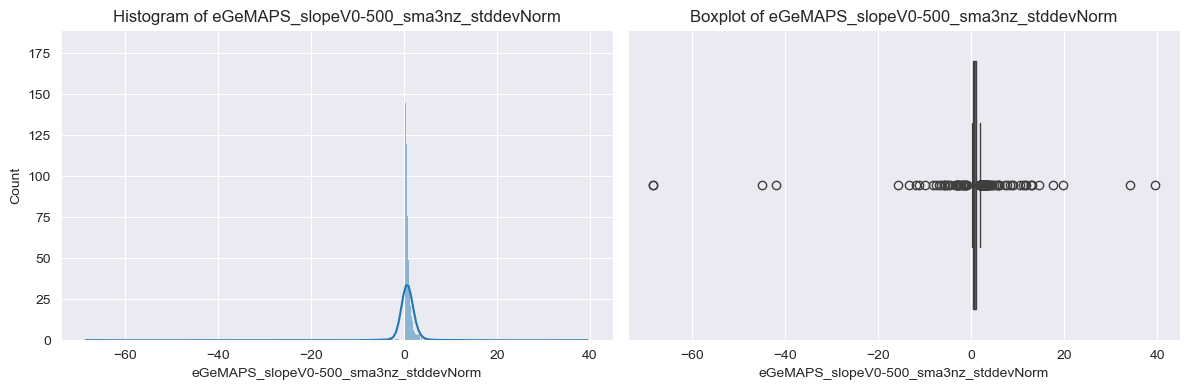

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeV0-500_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_slopeV0-500_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_slopeV0-500_sma3nz_stddevNorm
3            46                              -2.141430
15           89                               2.339507
17           91                             -13.378871
26          105                               2.601779
29          110                              -9.933482
..          ...                                    ...
975        1336                               2.108094
979        1344                              -1.549715
992        1359                               3.913718
993        1360                             -11.931932
998        1366                               1.901748

[132 rows x 2 columns]



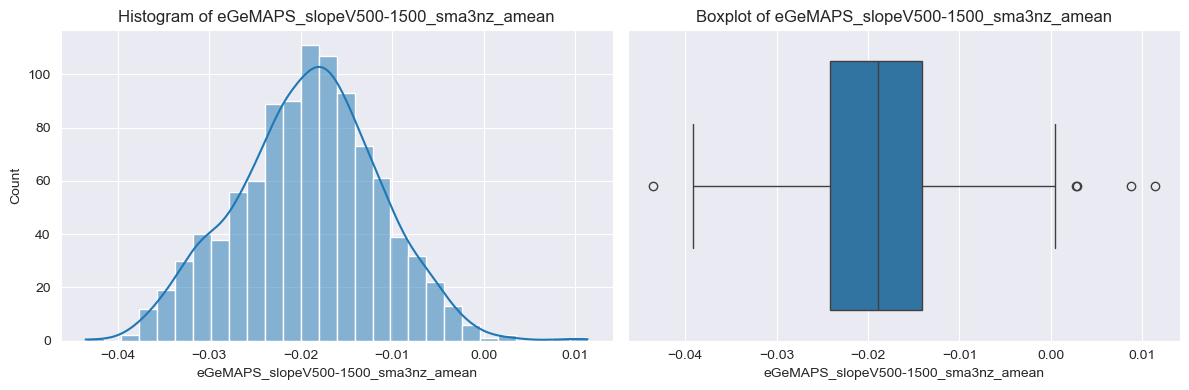

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeV500-1500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeV500-1500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeV500-1500_sma3nz_amean
28          109                             0.002807
338         516                             0.011373
624         874                             0.008741
634         890                            -0.043531
916        1252                             0.002757



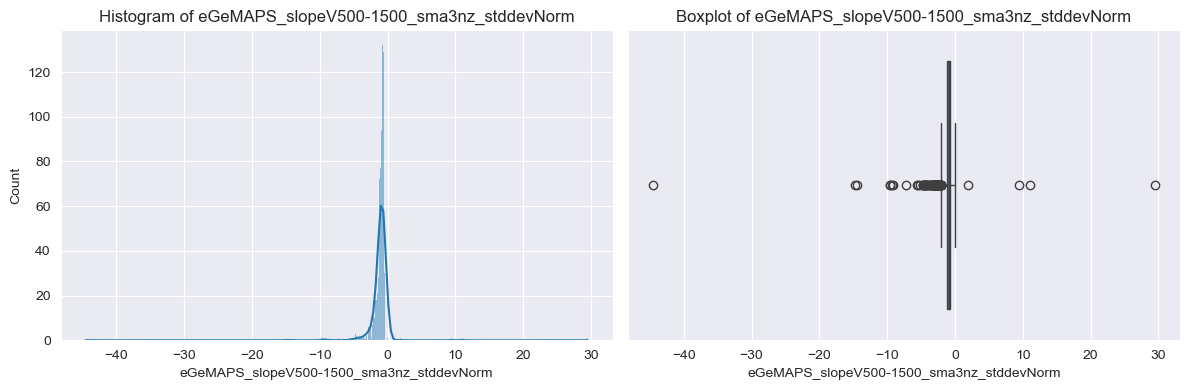

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeV500-1500_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_slopeV500-1500_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_slopeV500-1500_sma3nz_stddevNorm
24          103                                 -3.895334
26          105                                 -2.198160
28          109                                  9.401726
43          133                                 -5.440534
44          134                                 -2.815743
..          ...                                       ...
939        1288                                 -2.989198
941        1291                                 -4.023685
954        1310                                 -3.518848
963        1319                                 -2.176040
964        1320                                 -2.679745

[92 rows x 2 columns]



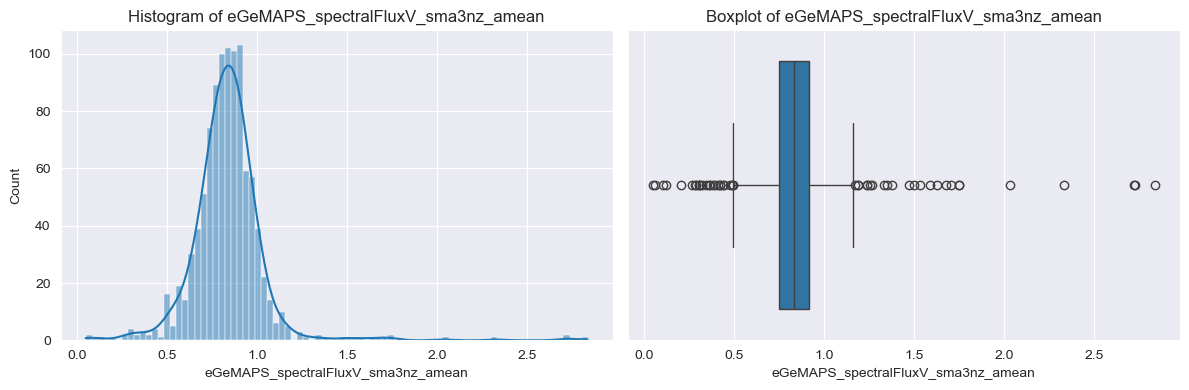

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_spectralFluxV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_spectralFluxV_sma3nz_amean': 
     Subject_ID  eGeMAPS_spectralFluxV_sma3nz_amean
16           90                            1.701583
32          115                            2.030330
48          138                            0.119386
63          157                            0.491436
102         211                            0.305608
113         224                            2.719340
142         264                            1.584921
217         366                            0.478087
252         407                            1.251509
260         420                            1.349606
270         432                            0.394018
275         438                            0.104018
278         443                            1.235555
288         455                            1.170141
298         469  

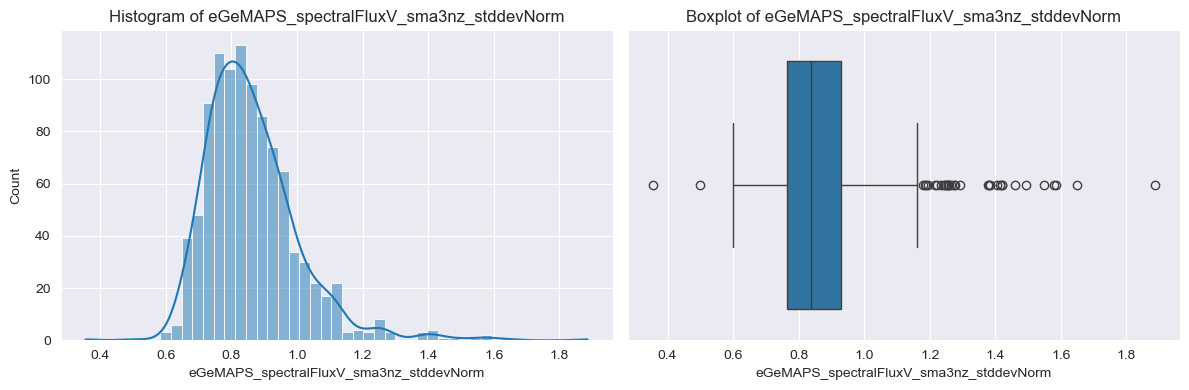

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_spectralFluxV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_spectralFluxV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_spectralFluxV_sma3nz_stddevNorm
64          158                                 1.256668
88          197                                 1.418787
102         211                                 1.578366
115         226                                 1.263662
213         362                                 1.184637
237         389                                 1.584310
278         443                                 1.494098
298         469                                 0.499425
299         470                                 1.292903
309         483                                 1.255626
317         492                                 1.221429
327         502                                 1.254410
329         504                               

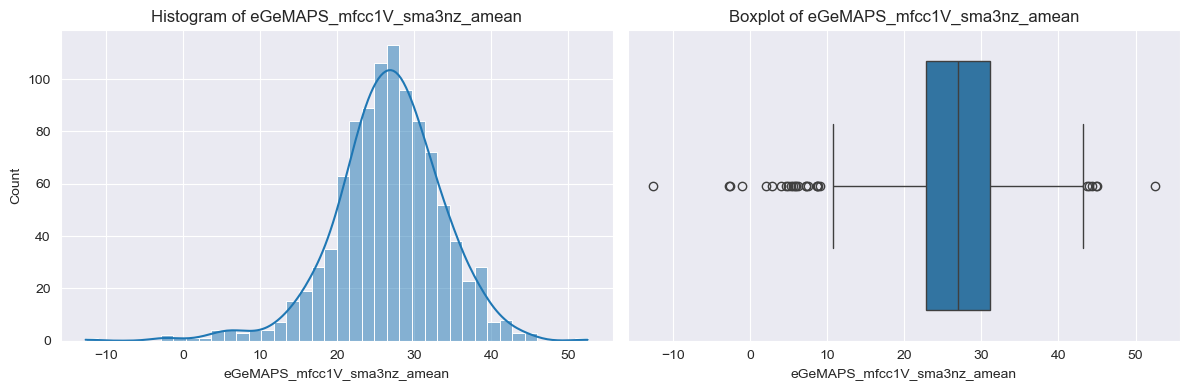

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc1V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc1V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc1V_sma3nz_amean
6            54                     8.748193
12           85                     8.715245
26          105                    -1.001209
27          107                     7.265928
28          109                    -2.583630
61          153                    43.661335
64          158                    44.924183
78          183                     5.816954
79          184                     6.275514
160         289                    43.963100
199         344                    52.511398
220         369                     9.120198
277         441                     4.029204
293         464                     2.017379
338         516                     4.621903
346         530                    44.411892
357         543                    -2.711477
4

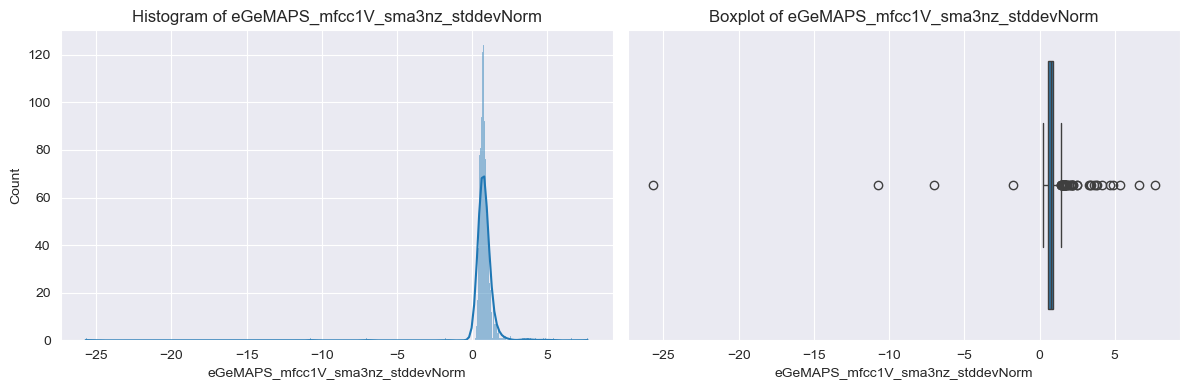

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc1V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc1V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc1V_sma3nz_stddevNorm
6            54                          2.227318
12           85                          2.510000
26          105                        -25.706940
27          107                          3.647984
28          109                        -10.728020
38          127                          1.558514
77          179                          1.945331
78          183                          3.736311
79          184                          3.847703
92          201                          1.700194
105         214                          1.515204
126         243                          2.155971
185         326                          1.587349
186         327                          1.447124
194         338                          1.487485
1

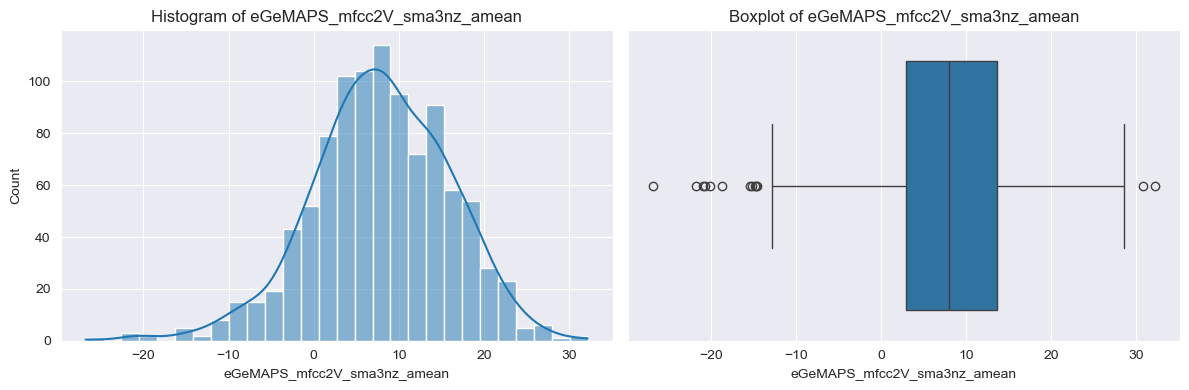

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc2V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc2V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc2V_sma3nz_amean
330         505                   -15.347667
366         557                   -21.773876
467         677                   -20.847221
623         873                   -18.626175
625         875                   -15.189499
659         920                   -14.691912
744        1026                    32.175331
770        1058                   -20.612112
801        1100                    30.759346
819        1125                   -14.824308
963        1319                   -26.782782
978        1341                   -20.071056
996        1363                   -14.540789



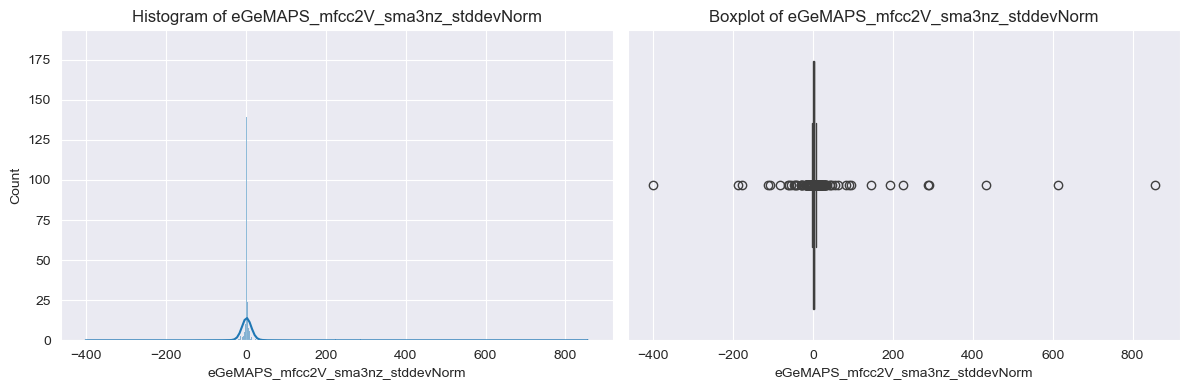

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc2V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc2V_sma3nz_stddevNorm': 
      Subject_ID  eGeMAPS_mfcc2V_sma3nz_stddevNorm
2             44                         -2.461489
5             50                        -54.563625
6             54                         15.186829
28           109                         -4.999396
32           115                         -6.800371
...          ...                               ...
973         1332                         83.382584
984         1350                        193.368286
987         1354                         -7.072809
995         1362                         10.583224
1001        1370                         -2.390635

[225 rows x 2 columns]



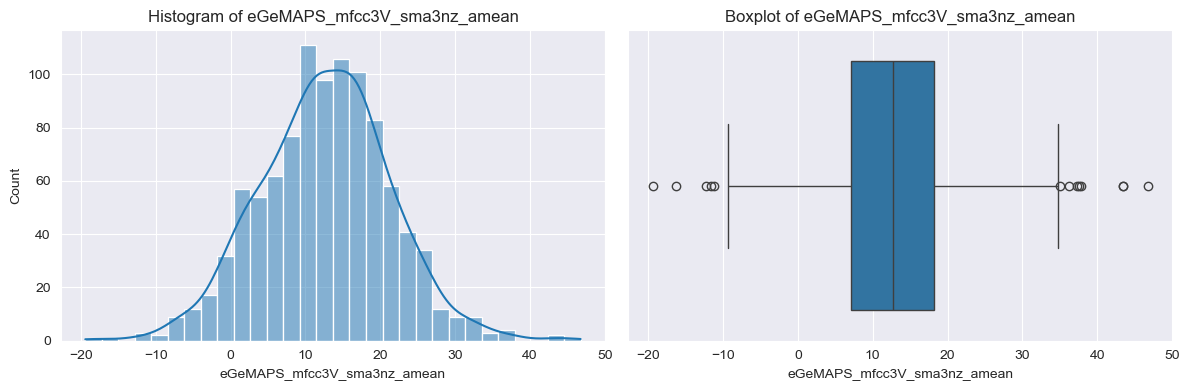

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc3V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc3V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc3V_sma3nz_amean
8            59                    37.324535
136         257                    43.381584
160         289                   -12.232505
212         361                   -16.318884
331         506                    36.162971
441         649                   -19.405558
453         663                    46.760551
494         710                   -11.157875
624         874                    43.414383
647         906                    34.988808
668         932                   -11.605890
685         954                    37.581047
965        1322                    37.836369



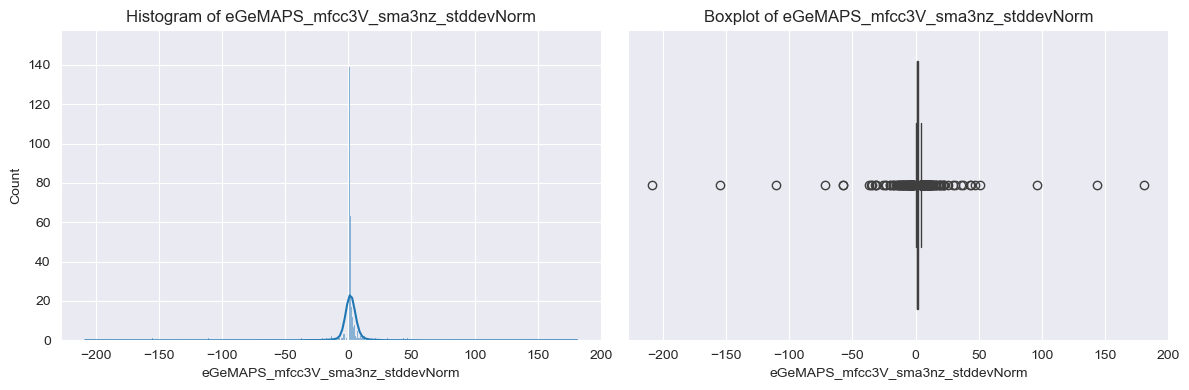

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc3V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc3V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc3V_sma3nz_stddevNorm
16           90                         -7.854179
25          104                          4.878626
32          115                          6.207032
34          120                        -57.330009
36          123                       -208.370056
..          ...                               ...
978        1341                         -8.136158
982        1348                         10.221090
983        1349                          5.217782
984        1350                         43.096577
996        1363                         -2.958244

[198 rows x 2 columns]



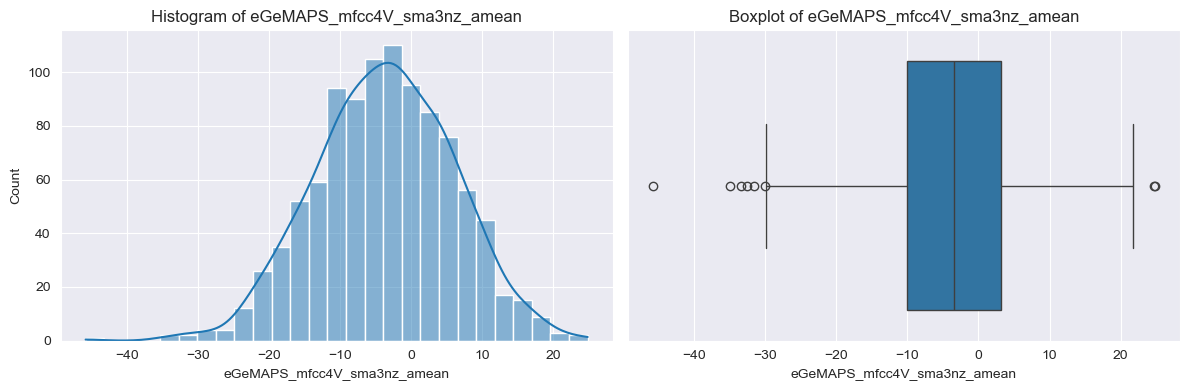

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc4V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc4V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc4V_sma3nz_amean
240         393                    24.755276
245         399                   -31.637409
595         838                   -32.613903
657         918                   -33.484970
731        1013                   -30.103855
820        1128                    24.828976
824        1133                   -45.816990
924        1267                   -34.911114



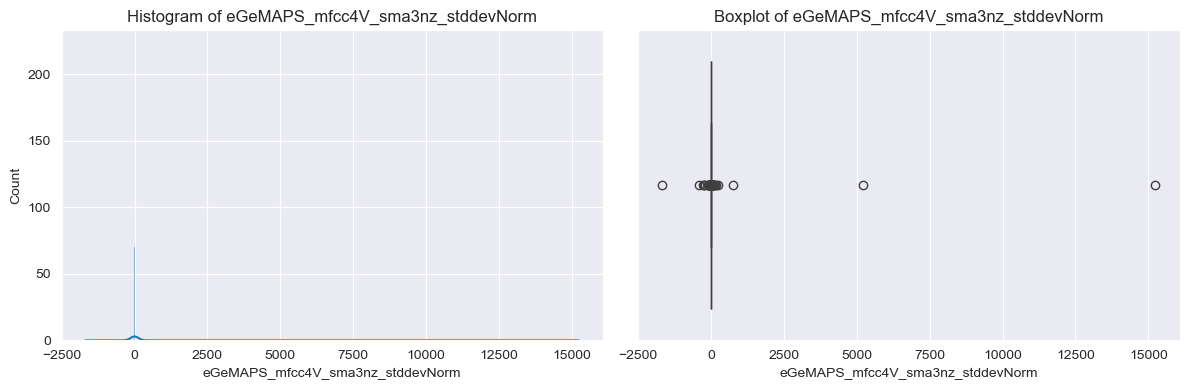

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_mfcc4V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc4V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc4V_sma3nz_stddevNorm
0            41                         11.198686
4            49                         36.323090
5            50                        -15.539344
21           99                         21.779169
22          101                         32.243565
..          ...                               ...
969        1327                        243.381424
977        1340                       -206.746719
992        1359                         12.269602
994        1361                        -15.309408
998        1366                       -427.927979

[123 rows x 2 columns]



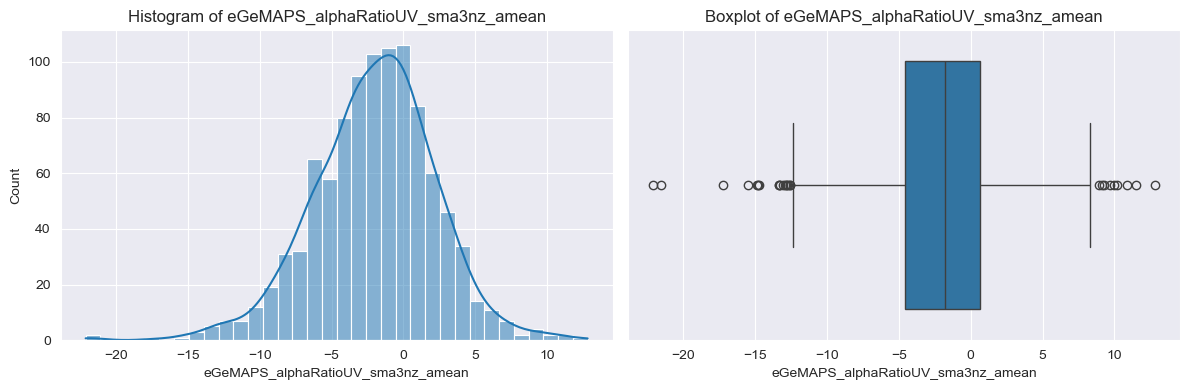

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_alphaRatioUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_alphaRatioUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_alphaRatioUV_sma3nz_amean
30          111                         -14.842572
68          165                           9.997338
97          206                         -12.541581
160         289                         -12.932938
170         301                         -12.531862
193         337                         -12.675281
230         381                         -14.692526
274         437                         -12.841283
278         443                         -14.807794
293         464                           8.958844
346         530                         -21.558834
352         537                         -15.494780
354         539                         -12.773773
357         543                          10.908802
482         696                   

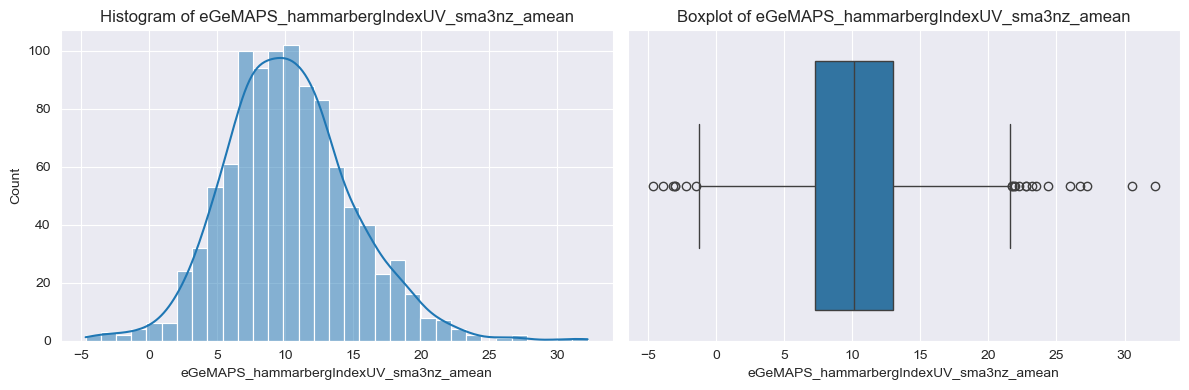

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_hammarbergIndexUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_hammarbergIndexUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_hammarbergIndexUV_sma3nz_amean
30          111                               26.699409
97          206                               24.342464
160         289                               22.723951
187         328                               22.738247
193         337                               22.215502
278         443                               25.962872
293         464                               -3.036023
327         502                               21.868704
346         530                               30.579258
352         537                               23.472767
354         539                               21.760349
357         543                               -3.015658
482         696                               27.206921
637  

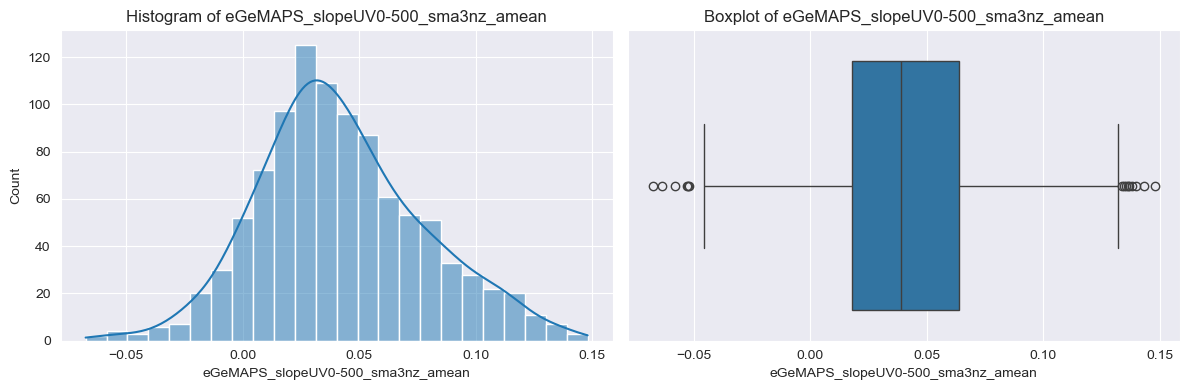

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeUV0-500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeUV0-500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeUV0-500_sma3nz_amean
277         441                          -0.052810
352         537                          -0.067482
396         594                           0.136778
442         650                           0.139952
497         714                           0.134706
583         823                          -0.052426
684         953                           0.138121
712         991                           0.133681
740        1022                           0.143198
742        1024                          -0.058148
774        1062                          -0.052164
898        1232                           0.136523
959        1315                           0.135758
970        1328                          -0.063585
983        1349                   

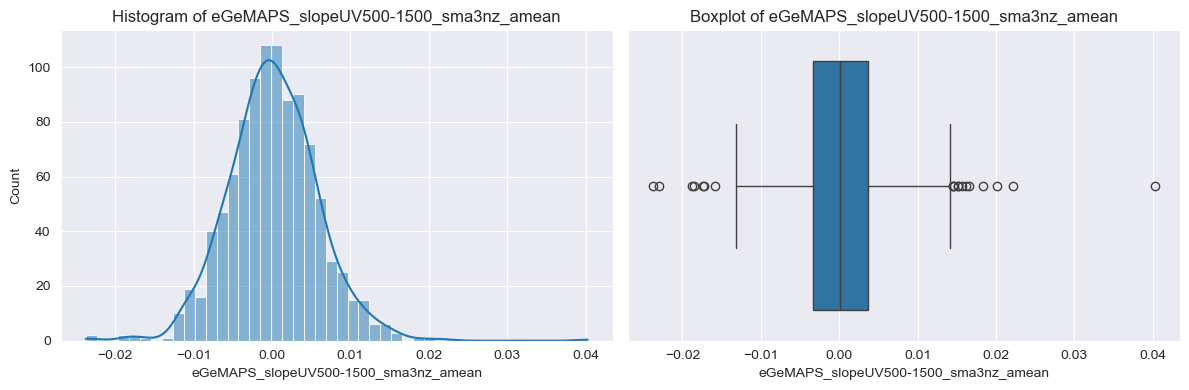

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_slopeUV500-1500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeUV500-1500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeUV500-1500_sma3nz_amean
123         239                              0.016125
230         381                             -0.023022
372         567                              0.014575
457         667                              0.016534
473         683                              0.018325
491         707                             -0.015877
533         762                              0.040268
624         874                              0.022181
634         890                             -0.018798
660         921                             -0.017311
696         968                             -0.017401
719        1001                             -0.023781
751        1037                              0.014474
810        1114                      

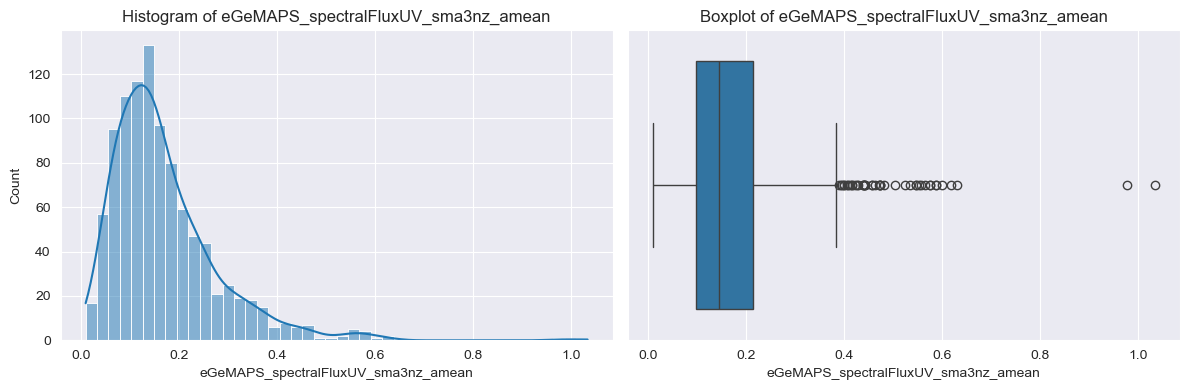

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_spectralFluxUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_spectralFluxUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_spectralFluxUV_sma3nz_amean
12           85                             0.438229
31          112                             0.456030
32          115                             0.412089
38          127                             0.473591
113         224                             0.422746
127         244                             0.390093
130         249                             0.471122
196         341                             0.425601
208         357                             0.598953
220         369                             0.630534
254         410                             0.406879
260         420                             0.441280
277         441                             0.547321
278         443                             0.504804


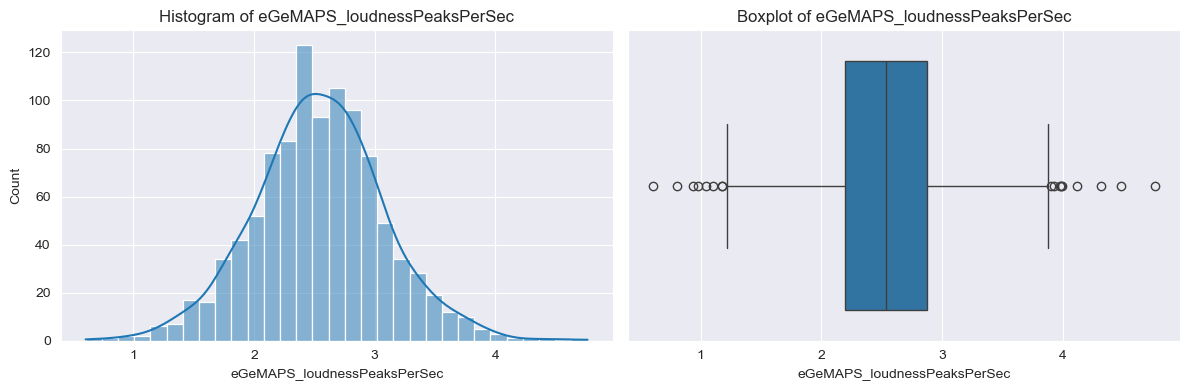

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_loudnessPeaksPerSec_distribution.png
outliers in 'eGeMAPS_loudnessPeaksPerSec': 
     Subject_ID  eGeMAPS_loudnessPeaksPerSec
51          141                     0.603809
133         252                     4.318444
237         389                     0.800949
250         404                     3.904840
265         427                     4.487864
369         560                     1.101792
633         889                     1.040833
644         902                     3.998745
661         922                     0.934579
684         953                     1.177961
702         975                     4.764786
708         985                     3.981672
858        1183                     4.118882
877        1205                     3.983931
896        1229                     3.927108
947        1298                     0.974026
952        1308                     1.179532



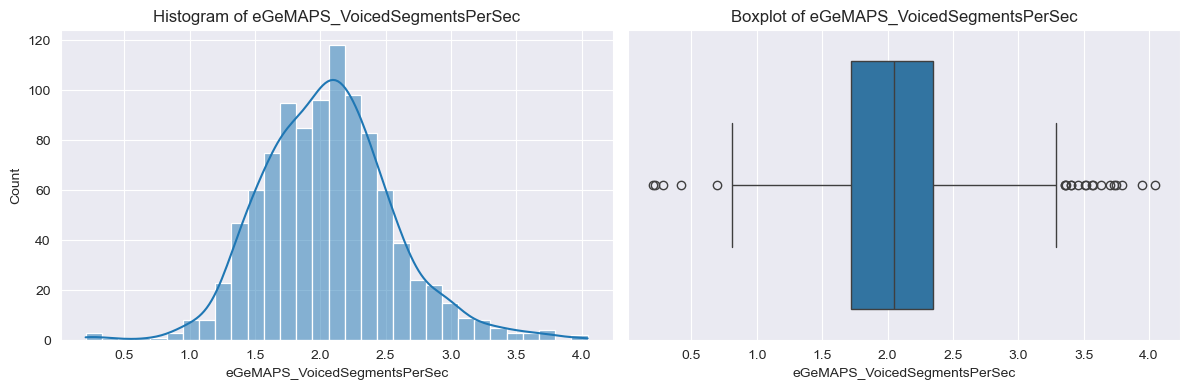

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_VoicedSegmentsPerSec_distribution.png
outliers in 'eGeMAPS_VoicedSegmentsPerSec': 
      Subject_ID  eGeMAPS_VoicedSegmentsPerSec
72           173                      3.400064
88           197                      3.794122
133          252                      3.514852
191          335                      4.045202
265          427                      3.407181
338          516                      0.219298
352          537                      3.697997
430          636                      3.947684
630          885                      3.514266
703          979                      3.568977
742         1024                      0.421121
745         1027                      3.732810
774         1062                      0.204745
775         1063                      3.630408
780         1071                      3.459687
782         1073                      3.358747
784       

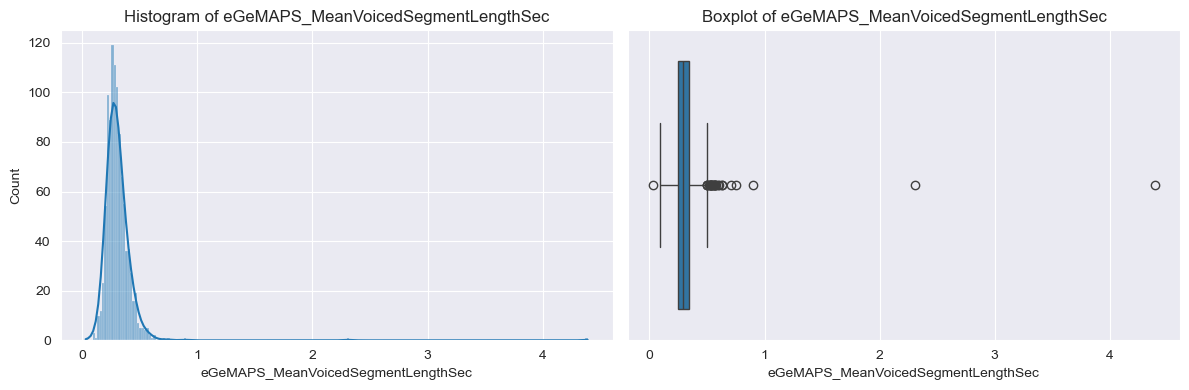

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_MeanVoicedSegmentLengthSec_distribution.png
outliers in 'eGeMAPS_MeanVoicedSegmentLengthSec': 
     Subject_ID  eGeMAPS_MeanVoicedSegmentLengthSec
20           97                            0.542143
34          120                            0.595319
89          198                            0.502619
102         211                            0.895672
169         300                            0.560159
174         306                            0.756111
187         328                            0.528026
197         342                            0.535543
209         358                            0.630167
218         367                            0.567778
230         381                            0.630800
281         446                            0.569238
305         478                            0.516400
331         506                            0.709375
338         516  

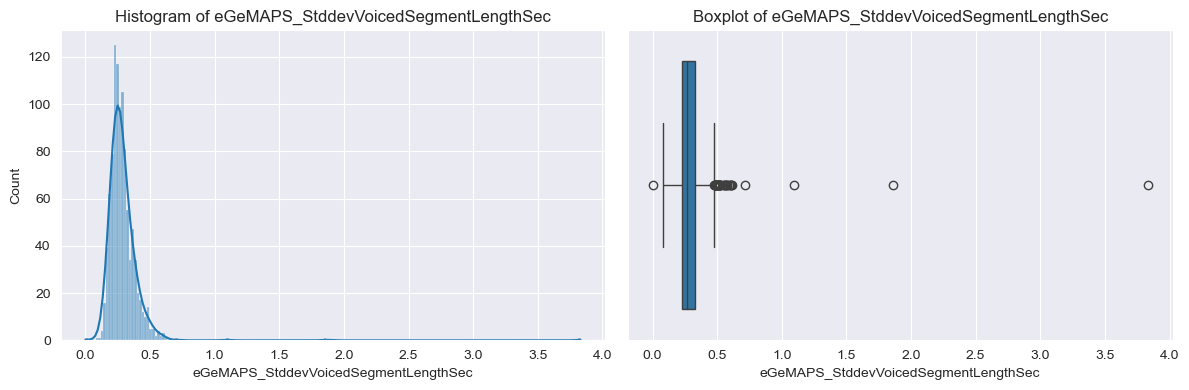

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_StddevVoicedSegmentLengthSec_distribution.png
outliers in 'eGeMAPS_StddevVoicedSegmentLengthSec': 
     Subject_ID  eGeMAPS_StddevVoicedSegmentLengthSec
16           90                              0.484357
34          120                              0.490652
89          198                              0.480793
96          205                              0.488281
102         211                              1.093221
174         306                              0.712246
178         315                              0.561172
187         328                              0.505897
197         342                              0.523486
209         358                              0.588304
218         367                              0.574096
279         444                              0.480685
281         446                              0.570175
309         483                      

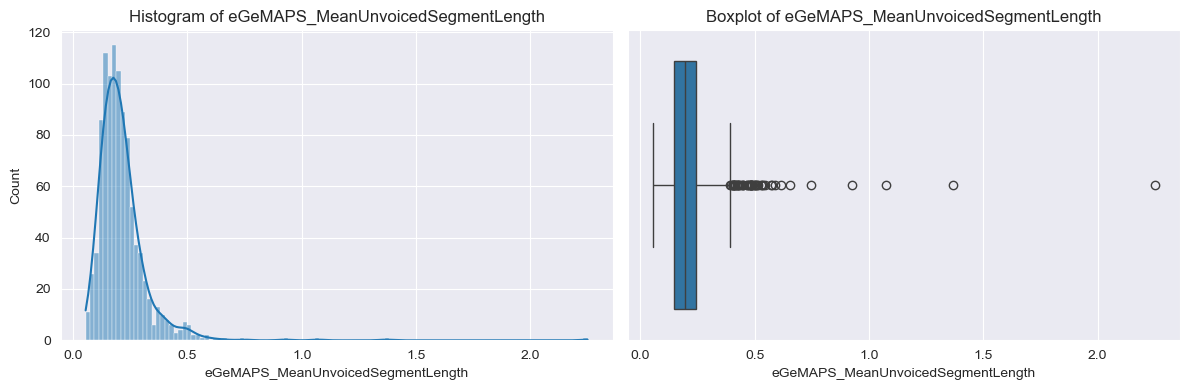

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_MeanUnvoicedSegmentLength_distribution.png
outliers in 'eGeMAPS_MeanUnvoicedSegmentLength': 
     Subject_ID  eGeMAPS_MeanUnvoicedSegmentLength
51          141                           0.513529
64          158                           0.405581
112         222                           0.406790
121         234                           0.613934
166         295                           0.413146
169         300                           0.500185
174         306                           0.483333
212         361                           0.485972
230         381                           0.474286
237         389                           0.428889
298         469                           0.590000
308         481                           0.430000
324         499                           0.398269
325         500                           0.526512
326         501                   

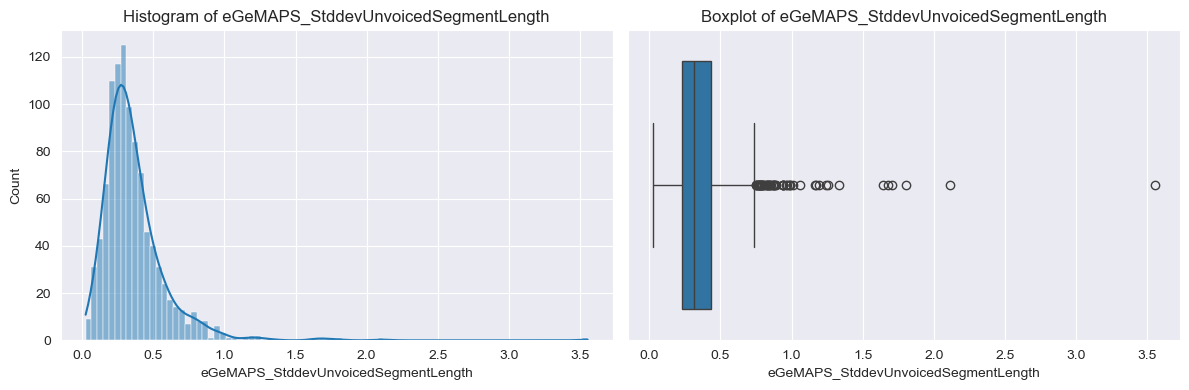

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_StddevUnvoicedSegmentLength_distribution.png
outliers in 'eGeMAPS_StddevUnvoicedSegmentLength': 
     Subject_ID  eGeMAPS_StddevUnvoicedSegmentLength
121         234                             0.831412
167         297                             0.794857
212         361                             0.874710
237         389                             0.828769
284         449                             0.764938
307         480                             0.776241
325         500                             0.892871
326         501                             1.252301
329         504                             1.012506
330         505                             0.805049
332         507                             1.675324
335         510                             0.769595
338         516                             2.110000
340         520                             0.773512


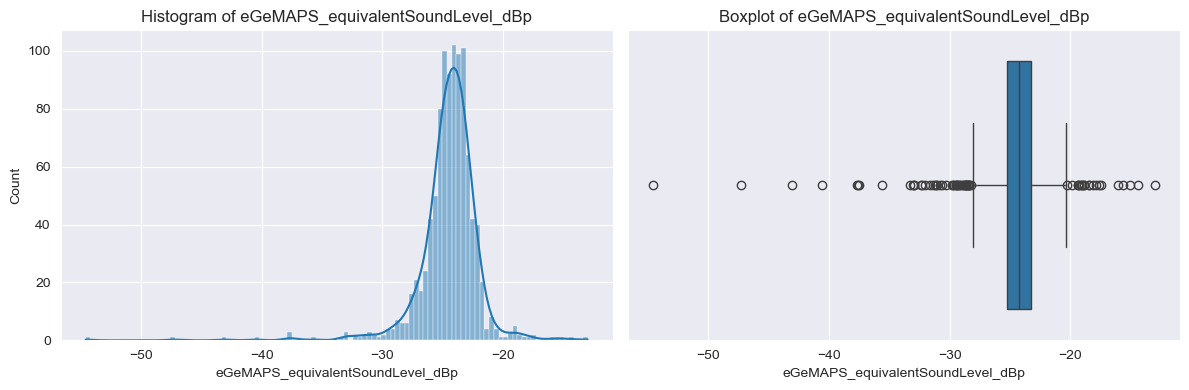

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/eGeMAPS_equivalentSoundLevel_dBp_distribution.png
outliers in 'eGeMAPS_equivalentSoundLevel_dBp': 
     Subject_ID  eGeMAPS_equivalentSoundLevel_dBp
16           90                        -18.878887
32          115                        -18.487698
48          138                        -40.542000
51          141                        -33.060467
77          179                        -30.669121
..          ...                               ...
929        1276                        -15.626300
947        1298                        -37.517712
952        1308                        -28.661531
975        1336                        -28.216850
996        1363                        -30.817959

[67 rows x 2 columns]



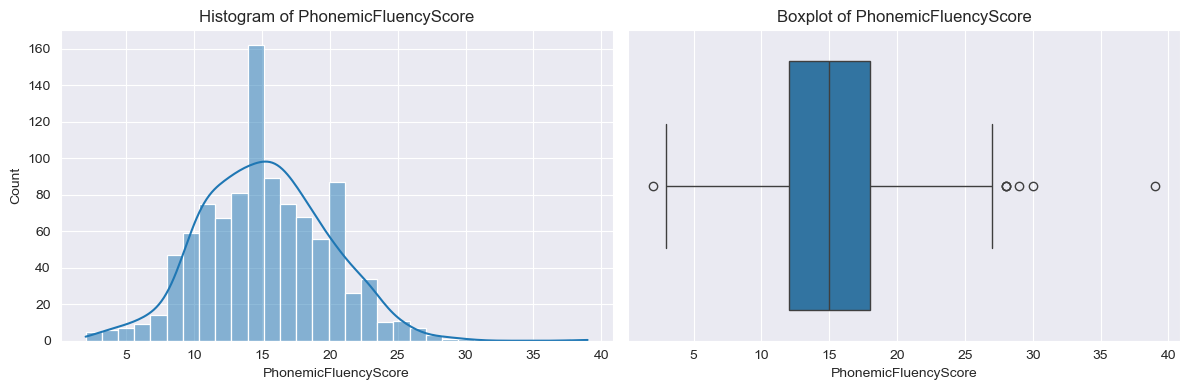

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PhonemicFluencyScore_distribution.png
outliers in 'PhonemicFluencyScore': 
     Subject_ID  PhonemicFluencyScore
29          110                  30.0
296         467                  29.0
370         562                  28.0
575         811                  39.0
581         821                   2.0
741        1023                  28.0
956        1312                  28.0



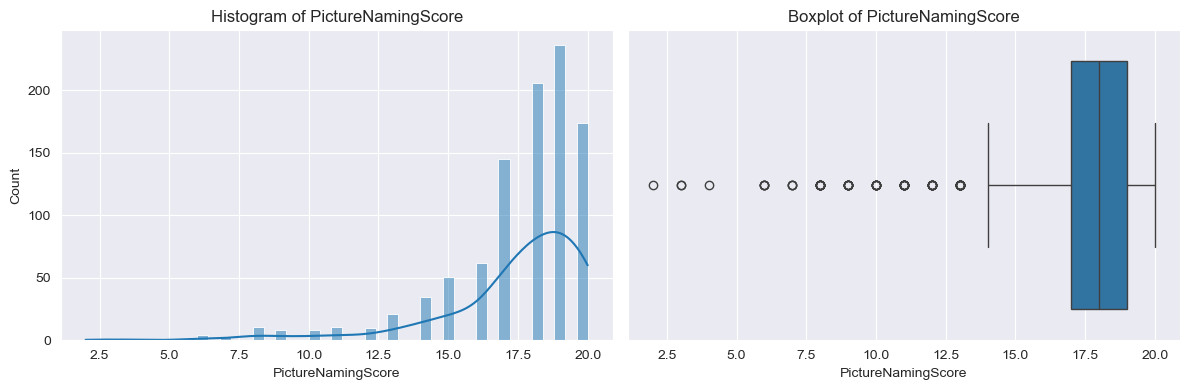

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/PictureNamingScore_distribution.png
outliers in 'PictureNamingScore': 
      Subject_ID  PictureNamingScore
51           141                11.0
52           142                10.0
54           145                11.0
62           154                13.0
64           158                 8.0
...          ...                 ...
960         1316                12.0
962         1318                 6.0
982         1348                 3.0
983         1349                13.0
1000        1369                12.0

[80 rows x 2 columns]



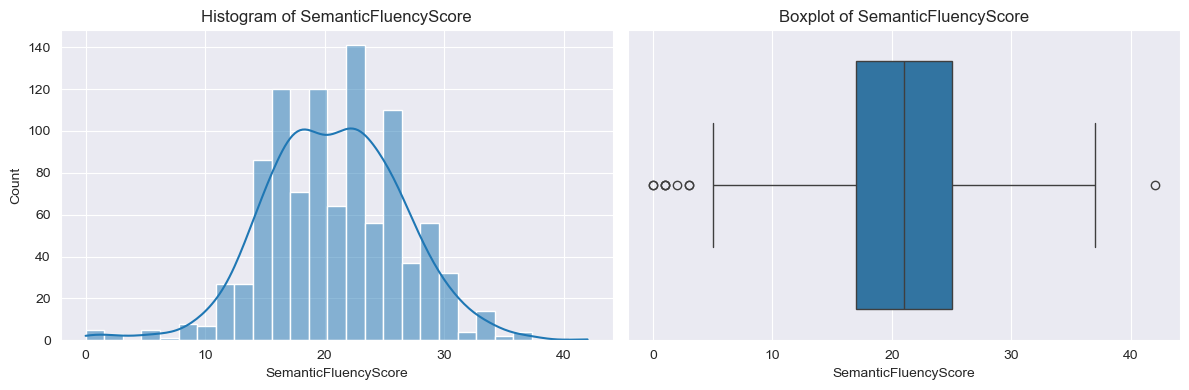

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/preprocessing/SemanticFluencyScore_distribution.png
outliers in 'SemanticFluencyScore': 
     Subject_ID  SemanticFluencyScore
40          129                   1.0
237         389                   0.0
370         562                  42.0
565         797                   1.0
681         950                   3.0
773        1061                   2.0
798        1097                   0.0
868        1195                   3.0
920        1257                   1.0



In [17]:
features_and_targets = [col for col in df.columns if col not in ["Subject_ID"]]
plot_distributions(df, features_and_targets)

In [21]:
def identify_outliers_iqr(df, feature_cols, id_column ="Subject_ID", iqr_multiplier = 1.5):
    subject_outlier_map = {}
    all_outlier_ids = set()

    for col in feature_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_ids = outliers[id_column].tolist()
        subject_outlier_map[col] = outlier_ids
        all_outlier_ids.update(outlier_ids)

        print(f"{col}: {len(outlier_ids)} subjects")

    print(f"\ntotal unique subjects to be removed: {len(all_outlier_ids)}")

    return list(all_outlier_ids), subject_outlier_map

In [25]:
id_column = "Subject_ID"
target_cols = ["SemanticFluencyScore", "PhonemicFluencyScore", "PictureNamingScore"]
feature_cols = [col for col in df.columns if col not in [id_column] + target_cols]

outlier_ids, per_feature_outliers = identify_outliers_iqr(df, feature_cols, id_column=id_column, iqr_multiplier=1.5)


n_words: 69 subjects
ttr: 41 subjects
mattr_10: 28 subjects
mattr_20: 25 subjects
mattr_30: 19 subjects
mattr_40: 17 subjects
mattr_50: 13 subjects
filler_word_ratio: 26 subjects
average_word_length: 18 subjects
brunets_index: 75 subjects
honores_statistic: 38 subjects
guirauds_statistic: 32 subjects
light_verb_ratio: 7 subjects
empty_word_ratio: 63 subjects
nid_ratio: 23 subjects
adjacent_repetitions: 57 subjects
aoa_content: 26 subjects
aoa_nouns: 13 subjects
aoa_verbs: 22 subjects
fam_content: 26 subjects
fam_nouns: 39 subjects
fam_verbs: 7 subjects
img_content: 13 subjects
img_nouns: 45 subjects
img_verbs: 47 subjects
freq_content: 16 subjects
freq_nouns: 56 subjects
freq_verbs: 13 subjects
concr_content: 15 subjects
concr_nouns: 22 subjects
concr_verbs: 14 subjects
um_ratio: 38 subjects
uh_ratio: 55 subjects
er_ratio: 0 subjects
ah_ratio: 4 subjects
ADJ: 12 subjects
ADP: 18 subjects
ADV: 14 subjects
AUX: 23 subjects
CCONJ: 12 subjects
DET: 18 subjects
INTJ: 27 subjects
NOUN: 13 su